In [81]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
import imageio
import glob
import shutil
import cv2

In [80]:
!pip install opencv-python


     |████████████████████████████████| 61.8 MB 332 kB/s eta 0:00:012


In [60]:
#path= '/home/rishabh/Data/animal10/animal10_cls/train'
#animals = os.listdir(path)


#for i in animals:
  #  os.mkdir('/home/rishabh/Data/animal10/discarded_raw_img/'+i)



In [7]:
data_dir = '/home/rishabh/Data/animal10/animal_10_small_cls/train'
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

train_image_datasets = datasets.ImageFolder(data_dir,
                                          data_transforms['train'])
                  
train_dataloader = torch.utils.data.DataLoader(train_image_datasets, batch_size=4,
                                             shuffle=True, num_workers=4)

In [3]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 10)

/home/rishabh/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rishabh/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
PATH = '/home/rishabh/Downloads/25epoch_model_5k.pt'
model_ft.load_state_dict(torch.load(PATH, map_location= torch.device('cpu')))
model_ft.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
count = 0
for (img, label, path) in train_dataloader:
    print(path)
    count+=1
    label = label.tolist()
    print(label)
    outputs = model_ft(img)
    #print('op', outputs)
    logit, pred = torch.max(outputs, 1)
    print(pred.tolist())
    print(logit.tolist())
    if count==2:
        break

('/home/rishabh/Data/animal10/animal_10_small_cls/train/gatto/243.jpeg', '/home/rishabh/Data/animal10/animal_10_small_cls/train/cane/OIP-6RUmganQyHjzEnr_M0p9nAHaEs.jpeg', '/home/rishabh/Data/animal10/animal_10_small_cls/train/mucca/OIP-2rJMguIV_3eMmh54yJNBiwHaLL.jpeg', '/home/rishabh/Data/animal10/animal_10_small_cls/train/elefante/OIP-SVFooTlKh9HMBKMEU-sRCAHaEK.jpeg')
[5, 0, 6, 2]
[0, 0, 6, 2]
[7.346247673034668, 13.854959487915039, 7.248833179473877, 13.759956359863281]
('/home/rishabh/Data/animal10/animal_10_small_cls/train/elefante/OIP-jij-D4652tLZbtR2CVbPTgHaE9.jpeg', '/home/rishabh/Data/animal10/animal_10_small_cls/train/gatto/696.jpeg', '/home/rishabh/Data/animal10/animal_10_small_cls/train/mucca/OIP-4TnYUz7R1Uu3l-MjC2HfUwHaEj.jpeg', '/home/rishabh/Data/animal10/animal_10_small_cls/train/mucca/OIP-23fps5xF_1X8Fs4YgPhEiwHaFQ.jpeg')
[2, 5, 6, 6]
[2, 5, 6, 6]
[7.666385650634766, 11.036609649658203, 9.762371063232422, 12.448841094970703]


In [5]:
import math
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

LABELS = []
PREDS = []
IMG_PATH = []
CONFIDENCE = []
with torch.no_grad():
    for d in train_dataloader:
        images, labels, path = d
        images = images.to(device)
        labels = labels.to(device)
        
        label = labels.tolist()
        outputs = model_ft(images)
        logit, pred = torch.max(outputs, 1)
        pred = pred.tolist()
        logit = logit.tolist()
        prob = [round(sigmoid(i),3) for i in logit]
        
        
        LABELS.extend(label)
        PREDS.extend(pred)
        CONFIDENCE.extend(prob)
        IMG_PATH.extend(path)

In [7]:
print(np.array(IMG_PATH).shape)

(5000,)


In [8]:
entry = {'Label': LABELS, 'Predicted': PREDS, 'Confidence': CONFIDENCE, 'Image Path': IMG_PATH}
df = pd.DataFrame(entry)
df.to_csv('/home/rishabh/animal_10cls/traindata_pred_info.csv', index = False)

In [20]:
lowconf_df = df[df['Confidence']<0.80]
print(len(lowconf_df))

6


In [21]:
lowconf_df

,Label,Predicted,Confidence,Image Path
1067,2,9,0.797,/home/rishabh/Data/animal10/animal_10_small_cl...
1372,0,9,0.758,/home/rishabh/Data/animal10/animal_10_small_cl...
2656,1,1,0.674,/home/rishabh/Data/animal10/animal_10_small_cl...
3649,8,9,0.792,/home/rishabh/Data/animal10/animal_10_small_cl...
4577,4,1,0.754,/home/rishabh/Data/animal10/animal_10_small_cl...
4999,0,5,0.797,/home/rishabh/Data/animal10/animal_10_small_cl...


In [16]:
#wrongly predicted images
wrong_df = df[df['Label']!= df['Predicted']]
len(wrong_df)
#plt.hist(wrong_df['Label'])

468

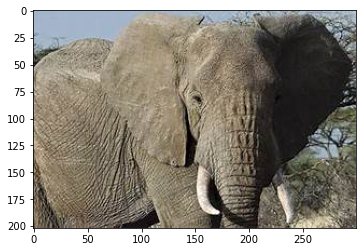

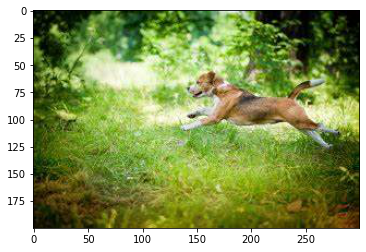

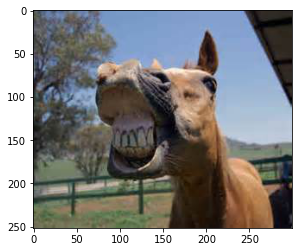

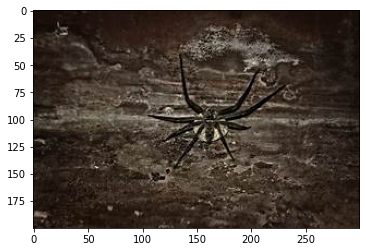

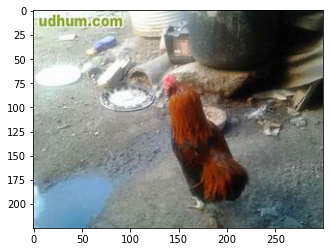

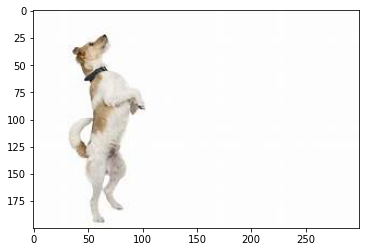

In [14]:
#images having low confidence
for i in lowconf_df['Image Path']:
    a = imageio.imread(i)
    plt.imshow(a)
    plt.show()

In [19]:
#for i in wrong_df['Image Path']:
#    subject = i.split('/')[-2]
#    shutil.move(i,'/home/rishabh/Data/animal10/animal_10_small_cls/discarded_train/'+subject)

In [16]:
#path = '/home/rishabh/Data/animal10/animal_10_small_cls/discarded_train/'
#subjects = os.listdir(path)
#for subject in subjects:
#    print(subject)
#    files = glob.glob(path+subject+'/*')
#    for file in files:
#        shutil.copy(file,'/home/rishabh/Data/animal10/animal_10_small_cls/train/'+subject)

In [11]:
df = pd.read_csv('/home/rishabh/animal_10cls/traindata_pred_info.csv')

wrong_df = df[df['Label']!= df['Predicted']]
print(len(wrong_df))
wrong_df.head(10)

468


,Label,Predicted,Confidence,Image Path
1,3,8,0.999,/home/rishabh/Data/animal10/animal_10_small_cl...
9,8,1,0.934,/home/rishabh/Data/animal10/animal_10_small_cl...
24,6,0,0.999,/home/rishabh/Data/animal10/animal_10_small_cl...
31,7,6,0.993,/home/rishabh/Data/animal10/animal_10_small_cl...
32,2,6,0.997,/home/rishabh/Data/animal10/animal_10_small_cl...
44,5,0,1.000,/home/rishabh/Data/animal10/animal_10_small_cl...
45,8,3,1.000,/home/rishabh/Data/animal10/animal_10_small_cl...
49,5,0,0.999,/home/rishabh/Data/animal10/animal_10_small_cl...
52,1,4,0.999,/home/rishabh/Data/animal10/animal_10_small_cl...
69,3,8,0.986,/home/rishabh/Data/animal10/animal_10_small_cl...


In [17]:
for idx, path in enumerate(wrong_df['Image Path'].tolist()):
    print(idx)
    label = wrong_df.iloc[idx]['Label']
    pred = wrong_df.iloc[idx]['Predicted']
    conf = round(wrong_df.iloc[idx]['Confidence'],2)
    a = imageio.imread(path)
    plt.imsave('/home/rishabh/animal_10cls/25epoch_train_wrong_pred/{}_{}_{}_{}.png'.format(idx,label,pred,conf),a)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [77]:
all_imgs = glob.glob('/home/rishabh/Data/animal10/raw-img/*/*')
print(len(all_imgs))

26179


In [64]:
all_imgs[1].split('/')[-2]

'farfalla'

In [28]:
a = imageio.imread(all_imgs[1])
print(a.shape[0])

426


In [74]:
length = []
width = []
for i in all_imgs:
    a = imageio.imread(i)
    length.append(a.shape[0])
    width.append(a.shape[1])

In [85]:
dim = []
for i in all_imgs:
    a = imageio.imread(i)
    dim.append((a.shape[0],a.shape[1]))

In [68]:
%matplotlib qt
plt.hist(length)
plt.show()

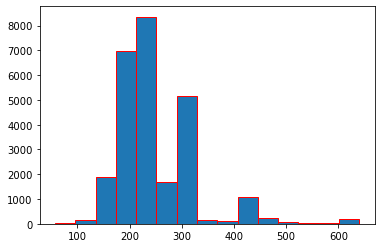

In [67]:
%matplotlib inline
len_350 = [i for i in length if i< 350 and i>150]
#plt.hist(len_350, edgecolor="red", bins=15)
#plt.show()

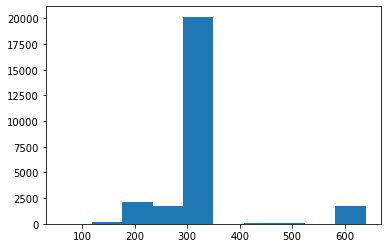

In [86]:
wid_800 = [i for i in width if i< 800 and i>50]
plt.hist(wid_800)
plt.show()

In [90]:
print(len([i for i in width if i< 400 and i>300]))

10


In [44]:
%matplotlib inline
def count_elements(seq) -> dict:
    hist = {}
    for i in seq:
        hist[i] = hist.get(i, 0) + 1
    return hist

counted = count_elements(sorted(length))
counted


{57: 5,
 64: 1,
 71: 1,
 75: 1,
 80: 1,
 86: 1,
 90: 5,
 92: 1,
 95: 1,
 96: 2,
 97: 2,
 99: 1,
 100: 6,
 101: 2,
 102: 1,
 104: 3,
 105: 3,
 106: 2,
 107: 4,
 108: 2,
 110: 2,
 111: 7,
 112: 1,
 113: 4,
 114: 7,
 115: 3,
 117: 2,
 118: 2,
 119: 18,
 120: 7,
 121: 5,
 122: 2,
 123: 1,
 124: 1,
 125: 2,
 126: 6,
 127: 1,
 128: 9,
 129: 5,
 130: 4,
 131: 4,
 132: 14,
 133: 5,
 134: 5,
 135: 6,
 136: 3,
 137: 7,
 138: 10,
 139: 7,
 140: 9,
 141: 10,
 142: 39,
 143: 5,
 144: 9,
 145: 15,
 146: 6,
 147: 12,
 148: 4,
 149: 17,
 150: 81,
 151: 4,
 152: 13,
 153: 8,
 154: 13,
 155: 12,
 156: 18,
 157: 82,
 158: 18,
 159: 26,
 160: 35,
 161: 21,
 162: 19,
 163: 20,
 164: 42,
 165: 32,
 166: 31,
 167: 19,
 168: 104,
 169: 1049,
 170: 17,
 171: 30,
 172: 10,
 173: 24,
 174: 11,
 175: 33,
 176: 33,
 177: 46,
 178: 36,
 179: 24,
 180: 105,
 181: 18,
 182: 36,
 183: 45,
 184: 33,
 185: 66,
 186: 27,
 187: 68,
 188: 395,
 189: 23,
 190: 77,
 191: 21,
 192: 64,
 193: 41,
 194: 190,
 195: 99,
 196: 52,

In [35]:
print(np.mean(length), np.std(length))

252.63016157989227 148.40046319337455


In [53]:
print(np.mean(width), np.std(width))

320.0388097329921 196.9315645684897


In [48]:
len([i for i in length if i< 104 or i>400])

1745

In [ ]:
len([(a,b) for a,b in length,width  ])

In [75]:
idxs = []
for idx,di in enumerate(dim):
    if di[0]<350 and di[0]>150 and di[1]<520 and di[1]>120:
        idxs.append(idx)

In [78]:
path_img = all_imgs[12347]
print(path_img)
a = imageio.imread(path_img)
print(a.shape)

/home/rishabh/Data/animal10/raw-img/gatto/anselmo-stevin-laksito-387930-unsplash.jpg
(3000, 4512, 3)


(250, 320, 3)


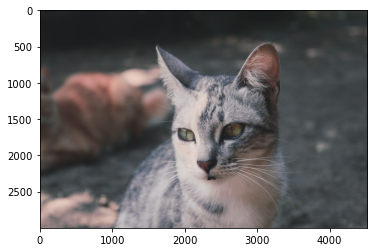

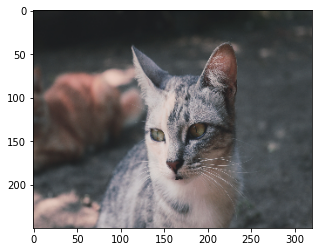

In [83]:
%matplotlib inline
a_resize = cv2.resize(a, (320,250))
print(a_resize.shape)
plt.imshow(a)
plt.show()

plt.imshow(a_resize)
plt.show()

In [76]:
print(len(idxs))
for i in idxs:
    print(all_imgs[i].split('/')[-2], all_imgs[i].split('/')[-1] ,imageio.imread(all_imgs[i]).shape)

23857
farfalla OIP-cnvPsgtydTyEZhcpIDcvHQHaJF.jpeg (300, 245, 3)
farfalla OIP-xIPjz5ot_1CP-_rI7qlOAgHaFj.jpeg (225, 300, 3)
farfalla OIP-G8nHpKpnXuCwm5Qq4zUoeQHaE_.jpeg (202, 300, 3)
farfalla OIP-oF6iZked6xLXJPVt_WO5EwHaE8.jpeg (200, 300, 3)
farfalla OIP-UkIN9B-LjiJjWSp_PFdbDwHaEo.jpeg (188, 300, 3)
farfalla OIP-b3fb1f4WoyPGGT3KIQwHXgHaKG.jpeg (300, 221, 3)
farfalla OIP-qdF5VfPhKoOOHhZo7j34vAHaE8.jpeg (200, 300, 3)
farfalla OIP-jkn9zxBnHh4Qy6KB4qq-igHaE7.jpeg (200, 300, 3)
farfalla OIP-vi0nmsOe-ToUBrCRoIJnXQHaFj.jpeg (225, 300, 3)
farfalla OIP-aHpK5UKhKLxGAN4ml9Bz6AHaE-.jpeg (202, 300, 3)
farfalla OIP-cpZUZba0RLh7l2d9ufyTewHaEh.jpeg (183, 300, 3)
farfalla OIP-fX1RvRYmG_HdYjrm81WSAQHaFj.jpeg (225, 300, 3)
farfalla OIP-t_V2TaJVoTOnVORyr6_tFgHaE-.jpeg (202, 300, 3)
farfalla OIP-SPteb6_nMdDTplOOIdW3HAHaFj.jpeg (225, 300, 3)
farfalla OIP-mYqSfMylXNSZPRzLC9dtgQHaHc.jpeg (300, 299, 3)
farfalla OIP-0qsT4Bt5npKBmWTFUppwxQHaE8.jpeg (200, 300, 3)
farfalla OIP-FXKAzi7l_NGwh6e9BB6VwgHaE7.jpeg (200,

farfalla OIP-sVUIb2rOGrmZHb8e8tqx1wHaJ2.jpeg (300, 226, 3)
farfalla OIP-k69YKx9zMvVxrET8ZajKfwHaHa.jpeg (300, 300, 3)
farfalla OIP-ENKrKagusX_gUYkAgQNcDwHaFj.jpeg (225, 300, 3)
farfalla OIP-KUO7sEPaR6usqUMe_bUewwHaEr.jpeg (190, 300, 3)
farfalla OIP-kwuUgwobQ7S6oiJFALRTlgHaE8.jpeg (200, 300, 3)
farfalla OIP-_KpWu9kxE30jovKeO6yMlwHaGP.jpeg (253, 300, 3)
farfalla OIP-lZ8o4Vs8SWkqE40ggQNZLAHaE5.jpeg (199, 300, 3)
farfalla OIP-9_KrHf6lYfPZ0pZqgX8JsQHaHa.jpeg (300, 300, 3)
farfalla OIP-BaLeSOIGawASi1KdS4iyGwHaJL.jpeg (300, 243, 3)
farfalla OIP-V2erYoJ51gU3o9ogGdflAwHaFj.jpeg (225, 300, 3)
farfalla OIP-IP0NNyIaAfq9gkicvedKLgAAAA.jpeg (300, 201, 3)
farfalla OIP-tDG-k__g_FcIC6QwJLOiWgHaFj.jpeg (225, 300, 3)
farfalla OIP-5qhtiWjljYKZCo8PvKiWCQHaFj.jpeg (225, 300, 3)
farfalla OIP-nlGilYQmBES8kHCike8xvAHaFj.jpeg (225, 300, 3)
farfalla OIP-ahE5TVyeDOd-nOQ30ZvEaQHaEo.jpeg (188, 300, 3)
farfalla OIP-7JbG1llhRUAdTtBnP31nngHaEo.jpeg (188, 300, 3)
farfalla OIP-6GAUZVLYVwf7o0pjhAopFwHaFs.jpeg (231, 300, 

farfalla OIP-wPOLVvntaEybQAoZQxro3AHaE8.jpeg (200, 300, 3)
farfalla OIP-8dggVcSxV72epWU5rTYIogHaEK.jpeg (169, 300, 3)
farfalla OIP-QB3rwq3td3DCIC_KxdqyiAHaHM.jpeg (292, 300, 3)
farfalla OIP-HMMdSekdsFaIEeJ1-iEFxgHaFj.jpeg (225, 300, 3)
farfalla OIP-C0-VKVp-9G26dneL7Kt1wQHaE9.jpeg (201, 300, 3)
farfalla OIP-7TTdpmZCR0R9YokwVO77XQHaFq.jpeg (230, 300, 3)
farfalla OIP-31NtOLMy3y3rHJnMeuW6uAHaFj.jpeg (225, 300, 3)
farfalla OIP-FfXrnzx1n9v3Kb0LH8hM0QHaEr.jpeg (190, 300, 3)
farfalla ea36b50721fc033ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.jpg (329, 640, 3)
farfalla OIP-6uLgXL7RfCVYDGsVGEV7iQAAAA.jpeg (300, 263, 3)
farfalla OIP-MepFo9C_jgEfoA_xVqhkCwHaE8.jpeg (200, 300, 3)
farfalla OIP-ga1Y3i7bEIxQZ9tG_pCXNgHaJ5.jpeg (300, 225, 3)
farfalla OIP-gEyyNDk-Nym-X4weAl7IsQHaFz.jpeg (235, 300, 3)
farfalla OIP-d6LVmH_gaFgm_jA47oFRtwHaF7.jpeg (240, 300, 3)
farfalla OIP-mAQO2_ehTT-dKpmkasD6WgHaD4.jpeg (157, 300, 3)
farfalla ea37b0082bf6083ed1584d05fb1d4e9fe777ead218ac104497f5c97faee9bdba_640.

farfalla OIP-5Vy-OyCv46rJlLoMj2qBNwHaF3.jpeg (238, 300, 3)
farfalla OIP-ewcKrYRnR4TzrOZVtVqnAwHaHa.jpeg (300, 300, 3)
farfalla OIP-mY9k6tLbM2yac2u7nioAFgHaEn.jpeg (187, 300, 3)
farfalla OIP-XOcZPfods9lZi396pTManwAAAA.jpeg (240, 300, 3)
farfalla OIP-JQidmdrybKE_dMlvWTYFQQHaFY.jpeg (218, 300, 3)
farfalla OIP-MzjEhRugSo9NTQLJYKH8hQHaE-.jpeg (202, 300, 3)
farfalla OIP-1TbiHq1KbZHiOafjeeavwgHaD-.jpeg (161, 300, 3)
farfalla OIP-_tTQDEB9PfeO9CQ5BaomxgHaFj.jpeg (225, 300, 3)
farfalla OIP-5PFwpG02YpotcjDovzoocwHaE6.jpeg (199, 300, 3)
farfalla OIP-FtgznxyvJBSFv5d9koFGQwHaEL.jpeg (169, 300, 3)
farfalla OIP-7_hPFnqtqLQDhHW9g9l_-wHaE6.jpeg (199, 300, 3)
farfalla OIP-UuW8DdmzZAJ3BuPdOGWdFAHaHj.jpeg (300, 295, 3)
farfalla OIP-H44u8SXh33OaL6z40MSFGgHaHa.jpeg (300, 300, 3)
farfalla OIP-XraQ7-bvFpRwSAcMXtv8_AHaLH.jpeg (300, 200, 3)
farfalla OIP-wqPZ_MXr8yj9Yw-4aOtRawHaIT.jpeg (300, 268, 3)
farfalla OIP-DzYmjShfZA-S60UIkbgaNAHaFA.jpeg (203, 300, 3)
farfalla OIP-GkBY9hiUQESS9Xi60-xYKAHaE7.jpeg (200, 300, 

farfalla OIP-mauVXso0NBzpTzaBwmzfLwHaJ4.jpeg (300, 225, 3)
farfalla OIP-4bTlTB0VIxQe3vbLpwJ92AHaHa.jpeg (300, 300, 3)
farfalla OIP-nOd5SwUyWFUWZCXLZsQJgAHaGL.jpeg (251, 300, 3)
farfalla OIP-Y3K0S6_5FG8w9LRcpNKv5QHaFj.jpeg (225, 300, 3)
farfalla OIP-0uDxYvQflWtWD6J2uOuHawHaFk.jpeg (226, 300, 3)
farfalla OIP-4Y4LFdTTd2MyFkVEFPgyaAHaFj.jpeg (225, 300, 3)
farfalla OIP-abiyOVLHjC73GaUbLZbq0AHaI8.jpeg (300, 249, 3)
farfalla OIP-AZy6WWtXWHsLrvUHxybAewHaGm.jpeg (268, 300, 3)
farfalla OIP-16XQG-F8cywgHOevhx8bFAHaE9.jpeg (201, 300, 3)
farfalla OIP-uctqseCp8mQcWxA7bsqHEgHaEo.jpeg (188, 300, 3)
farfalla OIP-VMYUiIBOqzjC_Z_LEHwmvwHaFc.jpeg (221, 300, 3)
farfalla OIP-1WJ7qocJkx9lKyqj7zPLZgHaFY.jpeg (218, 300, 3)
farfalla OIP-sqn2YAGoUw5v9JR2qtbCVgHaHa.jpeg (300, 300, 3)
farfalla OIP-K8yL5MxqyWaMEDpoVAz-5QHaFj.jpeg (225, 300, 3)
farfalla OIP-Gpa-3M-3IyJoYATOst0QHgHaHa.jpeg (300, 300, 3)
farfalla OIP-nMGjOGAvsx9JFmQD-TyT-wHaHK.jpeg (290, 300, 3)
farfalla OIP-6ntOS_3DQHb9ZFaq7yJCNwHaFj.jpeg (225, 300, 

farfalla OIP-UYuZO6zQz41OfCB1CV4KdAHaHa.jpeg (300, 300, 3)
farfalla OIP-bc5TdDQSLvt8MVci8p_UPwHaFx.jpeg (234, 300, 3)
farfalla OIP-YqyTpOZwWDVB9fjPmRCl2QHaFj.jpeg (225, 300, 3)
farfalla OIP-cVGCb5KgCSLlFcIlAX3OFAHaFj.jpeg (225, 300, 3)
farfalla OIP-AYlz-h0j48aGocifJ-5KsQHaFj.jpeg (225, 300, 3)
farfalla OIP-zlAXM5j1lboH0YjCncT7VQHaFH.jpeg (207, 300, 3)
farfalla OIP-wR0qPtFAZNAEK5yRr9uVXwAAAA.jpeg (225, 300, 3)
farfalla ea34b90d2cf1003ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg (316, 640, 3)
farfalla OIP-VWa4TKQI7pE1iqbXvUqpawHaF7.jpeg (240, 300, 3)
farfalla OIP-GU6W8E95BpF8vgkTu2YZ7AHaFj.jpeg (225, 300, 3)
farfalla OIP-OSdzPT_VPpAevRS1KZ1mDQHaHa.jpeg (300, 300, 3)
farfalla OIP-Fe73nq_sccXpiogxPQwRUgHaE9.jpeg (201, 300, 3)
farfalla OIP-aLTPvGQczOQUNg0upx54gwHaFi.jpeg (225, 300, 3)
farfalla OIP-TyGFimnL5gpnlB7HENy5UAHaFY.jpeg (218, 300, 3)
farfalla OIP-2wD3MVQok-xpDJ1USZpLkQHaEK.jpeg (169, 300, 3)
farfalla OIP-gBrsAf6ebCFQvE0CoNy1PgHaHa.jpeg (300, 300, 3)
farfalla OIP-qe9nGD

farfalla OIP-qjlt3yzv_YyF29BAVgFcIwHaFj.jpeg (225, 300, 3)
farfalla OIP-w2vbhDyL0WXNYP24bbJqUwHaFj.jpeg (225, 300, 3)
farfalla OIP-uy6Ttz6fENpyy3Qpm3TORQHaE-.jpeg (202, 300, 3)
farfalla OIP-g2OH87gfdLyKZ9yKXmv-CwHaFE.jpeg (206, 300, 3)
farfalla OIP-km0jgZH48r3k66wT7LtnlQHaFI.jpeg (208, 300, 3)
farfalla OIP-1D85l59j5z5r24EUIUKzzgHaFc.jpeg (221, 300, 3)
farfalla OIP-FcNfQsD3YjM_cyA-9h-qewHaEo.jpeg (188, 300, 3)
farfalla OIP-Ba-q3Zpikeo6zhd_gFMwNAHaEo.jpeg (188, 300, 3)
farfalla OIP-_if8hUJ-WjMTkXHsk0mpHQHaJ4.jpeg (300, 225, 3)
farfalla OIP-BmX_ajJSXdtE_ShQlGWRVQHaEo.jpeg (188, 300, 3)
farfalla OIP-pnzbvlXaG2RsVoVpJ0RhmwAAAA.jpeg (300, 300, 3)
farfalla OIP-Dvi78HHYEAEUYfNCzRy9vAHaHa.jpeg (300, 300, 3)
farfalla OIP-IyajAknJhWGAfVEQaXIOZgHaE6.jpeg (199, 300, 3)
farfalla OIP-xGHoslMYcJ5mFqkWeZrRxQHaD_.jpeg (162, 300, 3)
farfalla OIP-qANmHf-evfoyxXep_Da9DwHaEK.jpeg (169, 300, 3)
farfalla OIP-wilEcnz5oPVGzT9HTJ5ngwHaKe.jpeg (300, 213, 3)
farfalla OIP-iUY0rHUFmL0Qz2cizh7OdQHaHa.jpeg (300, 300, 

farfalla OIP-ouVIl-yexN51V-w4L_-PNwHaFe.jpeg (222, 300, 3)
farfalla ea34b90b29f7053ed1584d05fb1d4e9fe777ead218ac104497f5c97faee8b1b8_640.jpg (331, 640, 3)
farfalla OIP-dvUoIOMuocmKJ-TkSXSx3QHaEK.jpeg (169, 300, 3)
farfalla OIP-VMkxGkSstr8toA38_IM8ywHaFj.jpeg (225, 300, 3)
farfalla OIP-y7ONc_RIBeqYfcRFxNTi6QHaE9.jpeg (201, 300, 3)
farfalla OIP-Bs5ATHAnhM42ZYHJTgy79QHaNJ.jpeg (300, 170, 3)
farfalla OIP-iLoG-eIlsFTmo0cjIcb_KQHaH6.jpeg (300, 282, 3)
farfalla OIP-N-sTml1wjSTqnQ2LLpXCzAHaLH.jpeg (300, 200, 3)
farfalla OIP-h2kMaPMz18rJNgZ1LQfUKQHaE7.jpeg (200, 300, 3)
farfalla OIP-4XONYiuzS473uS499quM6gEsEp.jpeg (297, 300, 3)
farfalla OIP-SZpu0lbA0eCR68IveXKWNgHaFL.jpeg (210, 300, 3)
farfalla OIP-XtbFqK6O8aT4U1Cs8eVKHAHaHa.jpeg (300, 300, 3)
farfalla OIP-yrxQiEPNPJHfUL2_PUtZ4gHaFI.jpeg (208, 300, 3)
farfalla OIP-n3JENbEtXzFKsaGjS1JbKAHaFz.jpeg (235, 300, 3)
farfalla OIP-oj-j9VKR7NWWjBt4DhhSMgHaFd.jpeg (221, 300, 3)
farfalla OIP-6F1VwPOBmy-k20y10M3H4wHaGb.jpeg (261, 300, 3)
farfalla OIP-_7r6dJ

farfalla OIP-ohSYRMyf-TqRGCRcAUM39AHaE9.jpeg (201, 300, 3)
farfalla OIP-p9e0NQ72QRnO3zF7GsXdawHaGm.jpeg (268, 300, 3)
farfalla OIP-g6KKKfYiV7WSKdEWvKfhIAHaE7.jpeg (200, 300, 3)
farfalla OIP--BwCcfYAvrI0U8yYgWplXwHaF1.jpeg (237, 300, 3)
farfalla OIP-WTFhQqD88fBJqFbfVlHSEwHaFa.jpeg (219, 300, 3)
farfalla OIP--7K5JzW1ZEmrY2YRyVjFCQHaE7.jpeg (200, 300, 3)
farfalla OIP-sFUIzuoRpACt0rFfYzk2PQHaE7.jpeg (200, 300, 3)
farfalla OIP-hcwoSg-Zer6prSHJ2R6sOwHaFe.jpeg (222, 300, 3)
farfalla OIP-wLBrbpPmUf1DxDe8w_7LJQHaFj.jpeg (225, 300, 3)
farfalla OIP-Gu3gAOpdKlp8_yKs11EKkQHaFj.jpeg (225, 300, 3)
farfalla OIP-XhWDQgiElgZ0RUvLgceIvgHaFa.jpeg (219, 300, 3)
farfalla OIP-w1sZznXBXRD2TFAKLzTvZQHaGF.jpeg (247, 300, 3)
farfalla OIP-L2wgtdKG1S39l-ZvxOx2PwHaHa.jpeg (300, 300, 3)
farfalla OIP-CVTy_DNr7BZuzfImPQl_1AHaJ4.jpeg (300, 225, 3)
farfalla OIP-awuzCspaW0gSzgMUGTeP2wHaEo.jpeg (188, 300, 3)
farfalla OIP-6-N4Hc_X2nRvkh4uaAtq2wHaFi.jpeg (225, 300, 3)
farfalla OIP-TXKjsmVemHqbENoyP08BuQAAAA.jpeg (194, 269, 

farfalla OIP-R84OW8jnDth6uiX8sW9VtwHaE8.jpeg (200, 300, 3)
farfalla OIP-wRdwoyWQ-b9RIhBaNl10aAHaFn.jpeg (228, 300, 3)
farfalla OIP-bmmyoO324JRTBOwm_FXNfQHaFj.jpeg (225, 300, 3)
farfalla OIP-dpKvuGF9APZ6Yhpu7cebuAHaKH.jpeg (300, 220, 3)
farfalla OIP-Yug5cUteWfrpkPeb-hbsxgHaFb.jpeg (220, 300, 3)
farfalla OIP-Uy7-kHnw_W3B9tf63AqZwQHaFd.jpeg (221, 300, 3)
farfalla OIP-uqfYdktHW2u_pdHysaqpsgHaFm.jpeg (227, 300, 3)
farfalla OIP-gcLAKvGox7L5Z0pnFbRd0AHaHa.jpeg (300, 300, 3)
farfalla OIP-JHRV6umuLfMb7vPJNtoMcAHaE9.jpeg (201, 300, 3)
farfalla OIP-n7GqdmqSSR2u8Vh-n-X_kAHaEo.jpeg (188, 300, 3)
farfalla OIP-_KkkBrCkBaeMPkavE4af-gHaFc.jpeg (221, 300, 3)
farfalla OIP-DyfPqcZtqRiynBxy2-dgNQHaFj.jpeg (225, 300, 3)
farfalla OIP-V_8M0tqnPh9-GmnIMqvtOAHaFG.jpeg (207, 300, 3)
farfalla OIP-93BfRYv37ndRZKnIVOggXgAAAA.jpeg (212, 300, 3)
farfalla OIP-BKDxDlhuGBip5_uBLkvb4wHaGL.jpeg (251, 300, 3)
farfalla OIP-0J4n0Xih1oytcvXbu5Qk-AAAAA.jpeg (225, 300, 3)
farfalla OIP-ahHxCkPxpGPej6AbInw8HwAAAA.jpeg (300, 300, 

mucca OIP-yS_ywRYTivJRcPa4Niu4QAHaFV.jpeg (216, 300, 3)
mucca OIP-O8MEDDkATMHnD845LexNlAHaFJ.jpeg (209, 300, 3)
mucca OIP-WyxhZvWDczsf4gCDhexq4QHaEK.jpeg (169, 300, 3)
mucca OIP-19T_GbfY0rTuMJG5HDEIbQHaFj.jpeg (225, 300, 3)
mucca OIP-dU_0Z7ZmMFTbwM6vHqmm7AHaFj.jpeg (225, 300, 3)
mucca OIP-Nv0U71HT75_9AwMM2gnIWAHaE_.jpeg (202, 300, 3)
mucca OIP-plxzuABYk3Dl_0gi96y4LwHaFj.jpeg (225, 300, 3)
mucca OIP-GpPpLSGFsW6kJu_cY9SAygHaEL.jpeg (169, 300, 3)
mucca OIP-lQ0p5UBy8YmVmXdriSA70QHaFR.jpeg (214, 300, 3)
mucca OIP-ayZ7En3tBRQh7CsCmhxUhwHaE8.jpeg (200, 300, 3)
mucca OIP-YwhTXfa9RcIO2G-e0OWT3QHaFc.jpeg (221, 300, 3)
mucca OIP-dRERA5A64_bRckArovBE3wHaFj.jpeg (225, 300, 3)
mucca OIP-418q7Fuf_9Xlm_pHchnCYQHaFw.jpeg (233, 300, 3)
mucca OIP-7UAq7jilIiY_9Q81GFQUawHaFt.jpeg (232, 300, 3)
mucca OIP-njTmtnHexUikgCMgeoiZNQHaIj.jpeg (300, 260, 3)
mucca OIP-qKRfIz4z6lOaebXN29qqqwHaE8.jpeg (200, 300, 3)
mucca OIP-UuIygPpGdoz-LgkvIVZe5gHaEK.jpeg (169, 300, 3)
mucca OIP-GKh-o2SBntFKr35yiRGy9AHaE8.jpeg (200, 

mucca OIP-F3hHqXLvJC2ZYfzAzY2NrQHaEn.jpeg (187, 300, 3)
mucca OIP-rp3lhaiomNstxHUCj1PKbwHaE7.jpeg (200, 300, 3)
mucca OIP-O8FRLqDGCWrkfXhSmXj-qgHaFo.jpeg (228, 300, 3)
mucca OIP-VPFDJ0MwQCWCE3RMdPse0AHaE9.jpeg (201, 300, 3)
mucca OIP-9q3ArgfjoAwQ5Zk8NQvgiAHaE_.jpeg (202, 300, 3)
mucca OIP-8c8WPlrRwMQb65CHeys5qgHaFj.jpeg (225, 300, 3)
mucca OIP-rgRVFP3__h-n_E6YHhVUhwAAAA.jpeg (204, 250, 3)
mucca OIP-MVcY0-eiWRK7313tK3InmwHaFj.jpeg (225, 300, 3)
mucca OIP-B9M0n3MTKyDi166yIJYJPgAAAA.jpeg (158, 300, 3)
mucca OIP-mKXLmq6TtX_7snz4QNnvRAAAAA.jpeg (192, 300, 3)
mucca OIP-Zdz2kHuhib2X5F1606WoxQHaFj.jpeg (225, 300, 3)
mucca OIP-HiwJJ0aE0yIg2i5S0OR9eQHaFG.jpeg (207, 300, 3)
mucca OIP-3MCjhGspOZu-LjgHXwtJjQHaEK.jpeg (169, 300, 3)
mucca OIP-o-IvD5q-sleaEZRbxtgAswAAAA.jpeg (188, 300, 3)
mucca OIP-c38P0q72J9QaqvWrsLXM5QHaE7.jpeg (200, 300, 3)
mucca OIP-0SwWnZTgIxQGLEKAqkSrdwHaFc.jpeg (221, 300, 3)
mucca OIP-QCiTY2HsVvh0icPM_CQYXAHaFj.jpeg (225, 300, 3)
mucca OIP-XIq3UpLpB49VGtmmj6J8dQHaFd.jpeg (221, 

mucca OIP-TsyM75KcxbCcXeAH2KK2iAHaEv.jpeg (192, 300, 3)
mucca OIP-wSBa6snuX9C6BBcrBDXmVwHaFe.jpeg (222, 300, 3)
mucca OIP-T5cqpi4f6MIpVYZUiQYYogHaFj.jpeg (225, 300, 3)
mucca OIP-0d2QLvkmE5B7jysD1eqn2wHaE7.jpeg (200, 300, 3)
mucca OIP-46RO05GnDIPTfpct5INsbAHaF1.jpeg (237, 300, 3)
mucca OIP-t3kg3wj9TgUXQA83nrS5PAHaFF.jpeg (206, 300, 3)
mucca OIP-PCf00eCTpYW8a2tIL6gn_AHaE7.jpeg (200, 300, 3)
mucca OIP-cj289opM53eTi1BrZjEfiAHaFL.jpeg (210, 300, 3)
mucca OIP-qGuyYzG52QpEgd2KrUZDswHaEy.jpeg (194, 300, 3)
mucca OIP-HqJWFyuU2ph4habfp1QX-QHaE7.jpeg (200, 300, 3)
mucca OIP-PJWEwIw8wxaktjg4fgxmmAHaFP.jpeg (213, 300, 3)
mucca OIP-_-tg9T0bzHlxyBhXL8Z46AHaFj.jpeg (225, 300, 3)
mucca OIP-YDimJuA_Vp5jQAxIz2Nc5gHaE7.jpeg (200, 300, 3)
mucca OIP-pBpo_9uRCpeTXcpDT2ZNwAHaLI.jpeg (300, 200, 3)
mucca OIP-vq0SlJWU3hJzKZ7wYOr1LAHaE7.jpeg (200, 300, 3)
mucca OIP-cUlSNQgcu_QlcZYoKHLwOAAAAA.jpeg (200, 300, 3)
mucca OIP-W-jQsb1yx5qpQxzUgRb9pwHaEK.jpeg (169, 300, 3)
mucca OIP-F9YkJZX94TufU8Oqo_mi4gHaFj.jpeg (225, 

mucca OIP-BCW30_Gk4tB21BjqC1FnQgAAAA.jpeg (194, 270, 3)
mucca OIP-f5e6YjuKMC7qhSEhmAYfxQHaFj.jpeg (225, 300, 3)
mucca OIP-TwC3ZXBYUigrC-cNId-eZwHaGW.jpeg (257, 300, 3)
mucca OIP-kuThA3MMOuDOQkTjsij2SwHaEc.jpeg (180, 300, 3)
mucca OIP-KKem0-W8pkBQlQgm-3wimwHaE8.jpeg (200, 300, 3)
mucca OIP-FzmRScQ_TP32gBXZqXlMxAHaEo.jpeg (188, 300, 3)
mucca OIP-WEPWWUBy7Ei6D9yuqZD0YgHaFL.jpeg (210, 300, 3)
mucca OIP-5GqjXDbko5Ko2rQOUZCvYAHaE8.jpeg (200, 300, 3)
mucca OIP-mORNYRvCq3vwY5qdIfiFtQAAAA.jpeg (300, 200, 3)
mucca OIP-2m0N5Sp1KaHVJfrCr5RrRAHaFc.jpeg (221, 300, 3)
mucca OIP-f0TI4TL2DwemDSImY-JEQgHaE6.jpeg (199, 300, 3)
mucca OIP-7vpStw3rU2tEQSYbTX9rNQAAAA.jpeg (236, 300, 3)
mucca OIP-hcLyUUJi_4ABa8fBCANF9AHaFQ.jpeg (213, 300, 3)
mucca OIP-jcNsbiAgQG889ITIkLizKgHaHa.jpeg (300, 300, 3)
mucca OIP-z96Q795eEgbc1g0YOnIZIwAAAA.jpeg (250, 250, 3)
mucca OIP-I6zZ6pMJIX3THKnlBUGCsgHaE8.jpeg (200, 300, 3)
mucca OIP--OHe3g7Mp_Gkr7nCer7fpAHaEy.jpeg (194, 300, 3)
mucca OIP-U9a_1CMQ-R_ux_XQIwgztQHaEu.jpeg (192, 

mucca OIP-NTRi54FSmwJ7MEQ56F-q7wAAAA.jpeg (225, 300, 3)
mucca OIP-Tg7fC5kVmYRCcM_vx6lBrgHaHa.jpeg (300, 300, 3)
mucca OIP-KQtx7G81BdWFgrOl37KOmAHaFj.jpeg (225, 300, 3)
mucca OIP-1hSIgzGdBweAlnjTuQVZ6AHaKG.jpeg (300, 221, 3)
mucca OIP-SIT9Uw67dTF6wuDal0MKswHaFj.jpeg (225, 300, 3)
mucca OIP-2KOoIjACnd5Zd8O-K-5CSwHaE6.jpeg (199, 300, 3)
mucca OIP-xrK5gKTve--jrCDu5fedgAHaGD.jpeg (245, 300, 3)
mucca OIP-MNTJybbmAWrOKkRsJGHM7gHaFb.jpeg (220, 300, 3)
mucca OIP-b7-TQvKmz-I8ygBJGL2spwHaFj.jpeg (225, 300, 3)
mucca OIP-f1R9xCcC4M_hYpc8L7MghAHaFj.jpeg (225, 300, 3)
mucca OIP-L5beub6y_9EvT8AZ2LRxBgHaF7.jpeg (240, 300, 3)
mucca OIP-uIlpxvarnQL_Ejp3HYFc6gHaEK.jpeg (169, 300, 3)
mucca OIP-1FbU_lujEg5exq1cPCmSmAHaFV.jpeg (216, 300, 3)
mucca OIP-GUSQxq8w4Jg4kfnZApAMWwHaFc.jpeg (221, 300, 3)
mucca OIP-B0mPayI55q6f3V5mpMq_sAHaFj.jpeg (225, 300, 3)
mucca OIP-cqElmkek2Tr6iRJVsVbzlgHaHa.jpeg (300, 300, 3)
mucca OIP-8V9_3VNi56xXqzAk2OBS2gHaE-.jpeg (202, 300, 3)
mucca OIP-r7YsRNHaOkEEH39LWFNUZwHaFj.jpeg (225, 

mucca OIP-9dD9Fn8Xe0wkzX-APVmqBQHaFe.jpeg (222, 300, 3)
mucca OIP-fghrlZBPhAZZWn7H4RRXkgHaLm.jpeg (300, 192, 3)
mucca OIP-clQlJfemDk9MNmfahUGAfgHaEg.jpeg (183, 300, 3)
mucca OIP-tDTlhDgN1nhzejF8Bq8vWAHaJW.jpeg (300, 238, 3)
mucca OIP-Z_sTu0S2KU4_wVLFRZfu_QHaE7.jpeg (200, 300, 3)
mucca OIP-Z5iFmuSQcqpyh-LtYS_hsQHaE-.jpeg (202, 300, 3)
mucca OIP-TvGimz5SHt-lrrOcu49hhgHaI7.jpeg (300, 250, 3)
mucca OIP-ORmYlvHr2lfM8Ah7fZFpPAHaFc.jpeg (221, 300, 3)
mucca OIP-xrMeTcvV1a41NPxoQcQFiAHaE9.jpeg (201, 300, 3)
mucca OIP-GQ5uYUFIs6mi9CnnoTD2cgHaFl.jpeg (226, 300, 3)
mucca OIP-6D6Ni7tqWWLEQ74g9hi8EQHaFJ.jpeg (209, 300, 3)
mucca OIP-jwSTh7eLK_AWxx7cy3dFswHaFe.jpeg (222, 300, 3)
mucca OIP-4KgL3Sc6rMBl0XBcoNx0MQHaFj.jpeg (225, 300, 3)
mucca OIP-7RZuqZ17uMHeAuZdl0NSrAHaFa.jpeg (219, 300, 3)
mucca OIP-5m3MtWCVCZGpwddwkDa-PwHaEq.jpeg (189, 300, 3)
mucca OIP-JEaRFKPhIcqVYPbXoBjtVQHaHa.jpeg (300, 300, 3)
mucca OIP-lg06gAExMbKuoLrV41YW4wHaE7.jpeg (200, 300, 3)
mucca OIP-Pw_MMo00PW4sMFcN4wAPegHaE-.jpeg (202, 

mucca OIP-GoSGa13f023fm6csvCVIZwHaE8.jpeg (200, 300, 3)
mucca OIP-Yqit4fRjcrPNUUBTCdefGgHaEK.jpeg (169, 300, 3)
mucca OIP-FFSq4YfkvXiNnvV_x8VzJAHaE7.jpeg (200, 300, 3)
mucca OIP-H3ldqjZCnBdA3CC3hOGfNwHaE8.jpeg (200, 300, 3)
mucca OIP-1qRPzXH-kcEidmUI_wbdaAAAAA.jpeg (200, 300, 3)
mucca OIP-6aYIM6CLU6nNIe_YFeKFCgHaFo.jpeg (228, 300, 3)
mucca OIP-vcXcbQMT6R3RxpGPE1nSlAAAAA.jpeg (230, 300, 3)
mucca OIP-aBXTX-lOzfaNnpfsRI5ZbAHaFT.jpeg (215, 300, 3)
mucca OIP-aqQstRq9P_-Pdv3GOUPtogHaE8.jpeg (200, 300, 3)
mucca OIP-TGK7Hz88VJA-76COa0xINAHaED.jpeg (164, 300, 3)
mucca OIP-19O92vdo2ERUmmExlgkG0AHaE7.jpeg (200, 300, 3)
mucca OIP-zNuTGA5UlMGm-i_m6PHfNQHaE7.jpeg (200, 300, 3)
mucca OIP-Szce9VIvU6U0Rwuos2VlaAHaFj.jpeg (225, 300, 3)
mucca OIP-Pxhft4VDDCkyU0kmo6mygwAAAA.jpeg (200, 300, 3)
mucca OIP-dNJgK5IB3FoNiJREMn16rQHaE8.jpeg (200, 300, 3)
mucca OIP-_EvN_312zIDxisMl_CA17AHaJh.jpeg (300, 234, 3)
mucca OIP-ARQY-861-_z1uTCXPHRDlwHaEm.jpeg (187, 300, 3)
mucca OIP-DTKWRh3qP0NhCRRm6iuAqAHaFK.jpeg (209, 

mucca OIP-V8W-UWzsIkin1VIRfUTCsgHaFj.jpeg (225, 300, 3)
mucca OIP-dr3kN4Z8cpibwQqVWXhpRQHaGX.jpeg (258, 300, 3)
mucca OIP-Upki2jsN0w7FE6fATNZNdwHaFj.jpeg (225, 300, 3)
mucca OIP-kbTiZGjlxW7YBCpfNaFJ1gHaFS.jpeg (214, 300, 3)
mucca OIP-6AbyUGQyx02003GG9mY8UwHaEA.jpeg (163, 300, 3)
mucca OIP-8DqMv2no8y3olPSSvjUiWAHaE6.jpeg (199, 300, 3)
mucca OIP-ofl7dyRCRyCFhd1aOQERBAHaFj.jpeg (225, 300, 3)
mucca OIP-NzxLhiWzTbTqpBWOw2gn-wHaFY.jpeg (218, 300, 3)
mucca OIP-S5MqPN8adBG7eIPq7atthAHaE9.jpeg (201, 300, 3)
mucca OIP-D8_WRZ1UfCia8rfX5TpbwQHaE8.jpeg (200, 300, 3)
mucca OIP-FwOb-v1xOwlsgis8fAx4_QHaFc.jpeg (221, 300, 3)
mucca OIP-7GgywfiXt-8fOZBhXZa-pQHaE1.jpeg (196, 300, 3)
mucca OIP-m9SI2GM_myt_JPzNo_aVIQHaFj.jpeg (225, 300, 3)
mucca OIP-1Xxs7JCbEPDa6D14EblULAAAAA.jpeg (300, 225, 3)
mucca OIP-mUbWrALG-MUpEa6YPbYpWgAAAA.jpeg (300, 198, 3)
mucca OIP-rEnPTRH-mAHCoWt51GZWhwHaE9.jpeg (201, 300, 3)
mucca OIP-t5_Sqmb-UkT4R_wnC2biEAAAAA.jpeg (236, 300, 3)
mucca OIP-BsdDCh_yup0dHbP8zk-EXgHaE7.jpeg (200, 

mucca OIP-Ujb7HVHN1dc2MrNifrlXUAHaF7.jpeg (240, 300, 3)
mucca OIP-N3eLshd9G-P02rC4tzjfkAHaE6.jpeg (199, 300, 3)
mucca OIP-OMKBcIGY7h9TJoTdoOC9LwHaJt.jpeg (300, 229, 3)
mucca OIP-eUb0do8w6cqyF2uXGl-UPQHaFj.jpeg (225, 300, 3)
mucca OIP-C61c3rt3tanru4DvaJVQngHaFj.jpeg (225, 300, 3)
mucca OIP-ccYzlD_ho1QiaWApJJunmgHaFj.jpeg (225, 300, 3)
mucca OIP-xFSaRShrPlLI4Ey-UbLRAAHaFi.jpeg (225, 300, 3)
mucca OIP--8_E2EnxrYh7eym5nYRTJQHaE7.jpeg (200, 300, 3)
mucca OIP-iv4Sn0aPnPwtI9tgyDjRvgHaFj.jpeg (225, 300, 3)
mucca OIP-lnoUvgf-OTyihyHAOarRuAHaEh.jpeg (183, 300, 3)
mucca OIP-dMqgKdcpE_sPyravYVx6bwHaE8.jpeg (200, 300, 3)
mucca OIP-zu-QvjBpFzJMO0WilQesGwHaE6.jpeg (199, 300, 3)
mucca OIP-Ot0lxm8xFqdN4kQ6tm99pQHaFS.jpeg (214, 300, 3)
mucca OIP-of1QCN0wBRcIfC1f8LIHswHaHa.jpeg (300, 300, 3)
mucca OIP-K25yN0_EQ0oLAnjvewnW2AHaFj.jpeg (225, 300, 3)
mucca OIP-zRGCv6qPri_kKAdY4xmK_AHaEW.jpeg (176, 300, 3)
mucca OIP-bHCZAOWOFdCHQ-naWHmiQQHaE7.jpeg (200, 300, 3)
mucca OIP-lZgn79g977RAGfHehAulDwHaE8.jpeg (200, 

mucca OIP-Clk22EfdRb623jSiUv3E6wHaEc.jpeg (180, 300, 3)
mucca OIP-0lYA1iCnaqSWG2Gte5BMQwHaEo.jpeg (188, 300, 3)
mucca OIP-y_IEn1hyT9gCfIoJNLV0MgHaFj.jpeg (225, 300, 3)
mucca OIP-7WJOevP91trED7RxBu9VvQAAAA.jpeg (194, 271, 3)
mucca OIP-dXRxpGxy7BqIFs-6FFu6mwHaFX.jpeg (218, 300, 3)
mucca OIP-NTWcY9YIIcE6FxGxwXM8AAHaE6.jpeg (199, 300, 3)
mucca OIP-kqFf6xUGjy2BProol-noUQHaFS.jpeg (214, 300, 3)
mucca OIP-7gC6-ZvfN731CTnOnjwligHaE8.jpeg (200, 300, 3)
mucca OIP-n9ug8qy2lkeBgF6FiOAs-QEsCp.jpeg (169, 300, 3)
mucca OIP-J_Y0pG3Nq06xzJ1rPZr3hQHaFT.jpeg (215, 300, 3)
mucca OIP-DAa9rSOnDqQGuCR8_cKRewHaFU.jpeg (216, 300, 3)
mucca OIP-PrQc3Nz9r04N4FO1uOjBaAHaE5.jpeg (199, 300, 3)
mucca OIP-DkTYi8C0gG2dUCLQGKHBpgHaEK.jpeg (169, 300, 3)
mucca OIP-yG180dmfG_jSg2K_6iei9AHaFj.jpeg (225, 300, 3)
mucca OIP-rucHdaKcXRmOard82tOt6QHaEt.jpeg (191, 300, 3)
mucca OIP-J3kzALEaGPkG2dqg-VhCsQHaIE.jpeg (300, 276, 3)
mucca OIP-cnNC3AO2xWBAu3R9kPBYQwEsDd.jpeg (221, 300, 3)
mucca OIP-aC0UDcF5bWBWkawlQsQ5hAHaJP.jpeg (300, 

mucca OIP-RRn7M4sRzlRCJv3IH1V0oAHaFj.jpeg (225, 300, 3)
mucca OIP--J8aDBnHgAk9zNrk2AqySQHaE5.jpeg (199, 300, 3)
mucca OIP-AUBG_CJ44mNij5za-0E_3wHaE8.jpeg (200, 300, 3)
mucca OIP-fBSWAhQajcG7tqDbKs0JnQHaFF.jpeg (206, 300, 3)
mucca OIP-W67iHUZGCmu-rVBHrCvF-gHaFj.jpeg (225, 300, 3)
mucca OIP-WiTrqgoILyoJxi8rdpAUCQHaFj.jpeg (225, 300, 3)
mucca OIP-octqy8aOmeqMUldeqQk4pgHaE5.jpeg (199, 300, 3)
mucca OIP-RzBw5UlYLPGaO3okcB5wcwHaFj.jpeg (225, 300, 3)
mucca OIP-Jy1jbDqy8-AjaeEkOSSmjQHaFj.jpeg (225, 300, 3)
mucca OIP-cDmklzPpjVfja3q0HV3vygHaFX.jpeg (218, 300, 3)
mucca OIP-1W2VYqBUs_SlHpNbYXrLnQHaFj.jpeg (225, 300, 3)
mucca OIP-o_IMlTtWBEUaKjK-N5FGOgAAAA.jpeg (248, 300, 3)
mucca OIP-RkzHrmDSWB6saJnL45gRpgHaFA.jpeg (203, 300, 3)
mucca OIP-dlEojPypIkt--w3ukDrOFgHaKe.jpeg (300, 213, 3)
mucca OIP-RT6no221m8wWxeJPgBhv2QHaFL.jpeg (210, 300, 3)
mucca OIP-qSSi-QP7gifcyXriXIfZYQHaE4.jpeg (198, 300, 3)
mucca OIP-MYEheQN2eUiihHpX5KJ_HgHaE7.jpeg (200, 300, 3)
mucca OIP-1xfYXo9pVq3WF7QqHmolWAHaG3.jpeg (278, 

mucca OIP-cwsK_ilyUoKlgQLyv7z20AHaE7.jpeg (200, 300, 3)
mucca OIP-jd1cmbNmJvUc7NeiLKmCMwHaFO.jpeg (212, 300, 3)
mucca OIP-NpY_Ellie_tj8tXe18c8UgHaEK.jpeg (169, 300, 3)
mucca OIP-ozHNch6cvvdRY3UECPTukgHaFj.jpeg (225, 300, 3)
mucca OIP-BWtuPPg-o0ZL-dLeUWKVMAHaE6.jpeg (199, 300, 3)
mucca OIP-Sxib1kN2J8gmTApOtD5hAAHaE9.jpeg (201, 300, 3)
mucca OIP-XN5hXnWlM4xU3WyXgBBoLwAAAA.jpeg (158, 300, 3)
mucca OIP-5dX_bfIezTduGHHOcRJh1gHaFj.jpeg (225, 300, 3)
mucca OIP-T81oVnrNGAGiO1JIIqSn8wHaFc.jpeg (221, 300, 3)
mucca OIP-Er9X_0Rwb2pEtJgbtZSj6QHaGE.jpeg (246, 300, 3)
mucca OIP-ndqWNpxYc7LqYb9HFvfiqgHaE8.jpeg (200, 300, 3)
mucca OIP-4pXjOYXzFJbQ35nHD4Xz-AHaE_.jpeg (202, 300, 3)
mucca OIP-2XuZ7u6C34dAVw6ze3fhVwHaFi.jpeg (225, 300, 3)
mucca OIP-6cCWJuv2X0MHitZ1pCF7ZAAAAA.jpeg (225, 300, 3)
mucca OIP-XSgK2cC6R3gqp4zOAQn25QAAAA.jpeg (158, 300, 3)
mucca OIP-GvZy22TmgYpVImiK6VK0KAHaFn.jpeg (228, 300, 3)
mucca OIP-PsyerNB2JD_Y4keuymFTigHaFj.jpeg (225, 300, 3)
mucca OIP-nueIMKu1VYk1y-3DotZEmQHaFj.jpeg (225, 

cane OIP-QJzSW7xgq4U0xVbJkudsbgHaHj.jpeg (300, 295, 3)
cane OIP-DLOqiyGcaqcbjoisNQwCGwHaFE.jpeg (206, 300, 3)
cane OIP-rFyxtoWYc3OFCDoHYLdBugHaE7.jpeg (200, 300, 3)
cane OIP-by0S8UM7bzrbIe6s_YJf4gHaE9.jpeg (201, 300, 3)
cane OIP-UTZh58HZESV0TgiXwsO04QHaE7.jpeg (200, 300, 3)
cane OIP-rfAjWzBikMe0iFU1BAFMywHaJ4.jpeg (300, 225, 3)
cane OIP-f4Nwzfgmxzji9Sn97J_q2wHaFk.jpeg (226, 300, 3)
cane OIP-utKSMJwquJsQqjREROaxSwHaE7.jpeg (200, 300, 3)
cane OIP-5sCA6gLGlItmv8v3QyKiXQHaHK.jpeg (290, 300, 3)
cane OIP-QRyJWs2JWXiBqASTzrbTKwHaEe.jpeg (182, 300, 3)
cane OIP-F1Nrt3aPA4oLi2aMvtFSnwHaMs.jpeg (300, 176, 3)
cane OIP-MP-CQZ1FBAwqLw_BMISgagHaFj.jpeg (225, 300, 3)
cane OIP-ue-DlsitayfpFJtnfWEcIgHaHX.jpeg (299, 300, 3)
cane OIP-WYtTfe5-MuaoaNmJ-c5PCwHaFo.jpeg (228, 300, 3)
cane OIP-4Q_NBrufBO2nZrEqRb4xaQHaGC.jpeg (245, 300, 3)
cane OIP-7rwYg4MvH6_EJkUqg0ZB6QHaG2.jpeg (278, 300, 3)
cane OIP-rArAZ1KseGLFLMJiyPv2jAHaHa.jpeg (300, 300, 3)
cane OIP-wTq7S0kCdwliX9ElEZ-ilgHaFj.jpeg (225, 300, 3)
cane OIP-L

cane OIP-lxdbeexOWdLe2LWc-tS1EAHaFp.jpeg (229, 300, 3)
cane OIP-KgVoYGUNHiX6px07-L2QRAHaFd.jpeg (221, 300, 3)
cane OIP-RRprxY6URKEujziZevBccwHaJu.jpeg (300, 229, 3)
cane OIP-Lx9ipaXxvjsFo6OORZB5qQAAAA.jpeg (200, 300, 3)
cane OIP-t3_EnR3Wvqeh8BdEaRTuvgHaE8.jpeg (200, 300, 3)
cane OIP-eXkl3wu2uTQUW2gw9KqG2wHaE8.jpeg (200, 300, 3)
cane OIP-NArW7ve9bJ-smoXsr6K6ywHaFj.jpeg (225, 300, 3)
cane OIP-4pyv82oHmBIKOsYrIMHcNwHaFj.jpeg (225, 300, 3)
cane OIP-Qc-O-X4twJ-KYpJhewSa3wHaL0.jpeg (300, 189, 3)
cane OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg (300, 251, 3)
cane OIP-8aaNX6ooUNRAs9gPDUoIjQHaEQ.jpeg (173, 300, 3)
cane OIP-DSB_aqrsckO2t-GTZhQlOwHaEi.jpeg (184, 300, 3)
cane OIP-TYB8sdQihJCEXEvxe8R0ygHaEK.jpeg (169, 300, 3)
cane OIP-84NsdFYsWNImLBVJLEzX8QHaE6.jpeg (199, 300, 3)
cane OIP-9skduquj8XmLfkwHwJEy0QHaFj.jpeg (225, 300, 3)
cane OIP-s-j5JJuUMz2HJeyRKccMBQHaFD.jpeg (205, 300, 3)
cane OIP-oARgP-TgNTnfZ6YC6YwZSAHaFj.jpeg (225, 300, 3)
cane OIP-F11D8CU9n7NANkLny6hLMwHaE7.jpeg (200, 300, 3)
cane OIP-t

cane OIP-X8Niaon1kFWpYdCfS5ZFCAHaFj.jpeg (225, 300, 3)
cane OIP-o68_5yEfgDs2Udgw8B6qQQHaFj.jpeg (225, 300, 3)
cane OIP-LcvHVyV7wcTRHuHPJspR6wHaFJ.jpeg (209, 300, 3)
cane OIP-tsRqzLBVeOPi0SDp-cmq7AHaGt.jpeg (272, 300, 3)
cane OIP-67GweDzKmtnol2Mbe1bkwwHaE3.jpeg (197, 300, 3)
cane OIP-xHj3tr5Y5nv29Y94EkZaBQHaHw.jpeg (300, 287, 3)
cane OIP-XPBL6RecJjKyPFoCkb7GPAHaGo.jpeg (269, 300, 3)
cane OIP-6meYM0YU4jPYzQb6N-wgIQHaFh.jpeg (224, 300, 3)
cane OIP-HpsEKO5jodUAhhjsiPaBnAHaFj.jpeg (225, 300, 3)
cane OIP-zT5mClILKpkxSsnVkJXMRwHaE6.jpeg (199, 300, 3)
cane OIP-8QnItI38_TwZd7UAj2tj0gHaFb.jpeg (220, 300, 3)
cane OIP-JOviTaL4REtTUgvVWOVC1QHaF-.jpeg (242, 300, 3)
cane OIP-HMOg6CaCJYKCE5eexlw-ggHaE8.jpeg (200, 300, 3)
cane OIP-hQ1lodHpZ_FGE3Ypnl_u3wHaFM.jpeg (211, 300, 3)
cane OIP-Ikbvx6npraMKfuKcTnG9aAHaG7.jpeg (241, 258, 3)
cane OIP-YTaI33wWraLDeGCCUVRMvQHaHV.jpeg (297, 300, 3)
cane OIP-1xEPMi6CCw-cA0loI_sPQQHaEK.jpeg (169, 300, 3)
cane OIP-UiqbT6GroJaeVpBN4royrQHaFj.jpeg (225, 300, 3)
cane OIP-n

cane OIP-9ql0qfcS7MqghrUIMwuoQwHaFy.jpeg (235, 300, 3)
cane OIP-u8v9gMh9aRNnGEi0GZQEDAHaFj.jpeg (225, 300, 3)
cane OIP-A_wNz5Ev7HSAALbWeXPtZgHaJ3.jpeg (300, 226, 3)
cane OIP-yVrt8b9H133dZtyxCyjOFwHaFj.jpeg (225, 300, 3)
cane OIP-I9lXviGg6VmKwHocE7lVhgHaEn.jpeg (187, 300, 3)
cane OIP-YnpmR1tuD84ujm6GDl-t5AHaFi.jpeg (225, 300, 3)
cane OIP-Kaxl7aq2sDNND-HMXTO1DAHaD3.jpeg (157, 300, 3)
cane OIP-esxSw4Vbe5uLhMUFgmUp_wHaHF.jpeg (287, 300, 3)
cane OIP-azMleGkxMsT8sDwRRmmAsAHaGd.jpeg (262, 300, 3)
cane OIP-z3mHSGr2rSD8oA7mbNaewAHaE7.jpeg (200, 300, 3)
cane OIP-bRTTUygEkwj4ETB4cbNN7wHaE6.jpeg (199, 300, 3)
cane OIP-vAr_bQe6wS75l2wE-9mp0QHaJG.jpeg (300, 245, 3)
cane OIP-7WFDzYjoLvw607XfD2sZOQHaE8.jpeg (200, 300, 3)
cane OIP-fypwgb7cT_8MCvVNxpQ7kwHaE8.jpeg (200, 300, 3)
cane OIP-hQh1XPYHZQ1o7UoJPSBKiAHaFj.jpeg (225, 300, 3)
cane OIP-kUoCYpDaPmEK7jnELjVOHwHaEK.jpeg (169, 300, 3)
cane OIP-TGK6l0nmucs20FeKd3eB3wHaHD.jpeg (286, 300, 3)
cane OIP-s5SrupYVjjuZZxdY7wmF-wHaIV.jpeg (300, 267, 3)
cane OIP-0

cane OIP-yP--Rnl7fF601Kc_UBOqoQHaGV.jpeg (257, 300, 3)
cane OIP-uB6Kuukn7XmPK5meOkAoXQHaFk.jpeg (226, 300, 3)
cane OIP-e3IeTjI2yAbumzzUAy3LCAHaF8.jpeg (241, 300, 3)
cane OIP-So8q1Rxxc6Md6Gfn_oqgugHaJ4.jpeg (300, 225, 3)
cane OIP-xhJgAZA0cru3YetCuS1UgwHaIm.jpeg (300, 259, 3)
cane OIP-GEFsSI7-FR1mvRn84Xg6GwHaFj.jpeg (225, 300, 3)
cane OIP-zvidHA4-It5fSZ3J0MLcNQHaGZ.jpeg (259, 300, 3)
cane OIP-_D3-N3Sj3HgppjvytfskkgHaE8.jpeg (200, 300, 3)
cane OIP-4CcJd0QHqhmhh_lbXvn_VAHaE_.jpeg (202, 300, 3)
cane OIP-mSrZJOE9gwJiR6dtGZ3yGQHaJ0.jpeg (300, 227, 3)
cane OIP-tiTHRUEEf2MGD9aKljMhJQHaE8.jpeg (200, 300, 3)
cane OIP-XQIMZnKXhphiGNPR4Va3kAHaJ3.jpeg (300, 226, 3)
cane OIP-2TqvvojsLgxQC06Tla2saAHaEo.jpeg (188, 300, 3)
cane OIP-hvHKqaJII1dk0yQG7sur1AHaHa.jpeg (300, 300, 3)
cane OIP-L8sE0i1kKISofpP_lFAyygHaFj.jpeg (225, 300, 3)
cane OIP-xU5dK02_CLVjBNwXpiTu-AHaE8.jpeg (200, 300, 3)
cane OIP-nz3DxyfEYRtsOHdZnJpn5gHaLa.jpeg (300, 195, 3)
cane OIP-Ho-TEFJ6eqVHwfujEfloyQHaE8.jpeg (200, 300, 3)
cane OIP-s

cane OIP-aNfn6alq4vrRSsTlo3DQdwHaFj.jpeg (225, 300, 3)
cane OIP-DcxwA6xPOhSUvKICwjbnvwHaEI.jpeg (168, 300, 3)
cane OIP-sfUlzrlH17y_BkoUFaycyQHaJ4.jpeg (300, 225, 3)
cane OIP-8OyFw2RNcyztx1rLyHjboQHaEJ.jpeg (168, 300, 3)
cane OIP-NJc-9Yh4sJv4kl0daZ6InQHaE6.jpeg (199, 300, 3)
cane OIP-6dq-7yOIcdeQ5MbZWrl2iwHaFj.jpeg (225, 300, 3)
cane OIP-2T6E46WqvhgVRztKt4iMAAHaFj.jpeg (225, 300, 3)
cane OIP-V4LQk0n9tzlt3CfLi0nc0QHaFj.jpeg (225, 300, 3)
cane OIP-ZW_Vhs50E3ui5FBvxtcf0QHaF1.jpeg (237, 300, 3)
cane OIP-LzZ-QfiQyvHYlHbmymqhgQHaHa.jpeg (300, 300, 3)
cane OIP-e1BLhIVxKkW7uTpKI7mHWQHaFh.jpeg (224, 300, 3)
cane OIP-p48Ty-JvXa2IBRs9pDznCAHaHa.jpeg (300, 300, 3)
cane OIP-_kNU8jfJrt24QCgRcapmQwHaH4.jpeg (300, 283, 3)
cane OIP-fUB4o4VwpYi686vKuVT7FgHaFj.jpeg (225, 300, 3)
cane OIP-IIY8zTsMuf1gBCXtbqOY5gHaFj.jpeg (225, 300, 3)
cane OIP-vIbd44g4WUy8AE16BZlh_AHaE8.jpeg (200, 300, 3)
cane OIP-Leaqmziyg_pY64TkKjY-7wHaE8.jpeg (200, 300, 3)
cane OIP-rBo_-NZ9ECM6YsJmok_vkgHaGY.jpeg (259, 300, 3)
cane OIP-N

cane OIP-6BEZZ3FDmohklahzNmaVbgHaEK.jpeg (169, 300, 3)
cane OIP-mL_8D2wsk6rfYRgSvk0rUAAAAA.jpeg (300, 252, 3)
cane OIP-PgOOMwgl4Urk9YAdiMU4SQHaLD.jpeg (300, 202, 3)
cane OIP-flMDZyqFaErmvt79Np2rCAHaJv.jpeg (300, 229, 3)
cane OIP-neAn4kg5cwn_qPag-NrPSQHaEK.jpeg (169, 300, 3)
cane OIP-hpOBb52Uq5TfirqXLYtnQQHaEY.jpeg (178, 300, 3)
cane OIP-lshxrfW0ByIMYTYyRn0j6gHaEK.jpeg (169, 300, 3)
cane OIP-80n45BIJFJ3egbwA5JWb7AHaEK.jpeg (169, 300, 3)
cane OIP-PccK4IsQWfgehq-hLOqx5AAAAA.jpeg (200, 300, 3)
cane OIP-YCmhFGcH9z79g1mosQC7mwHaJ4.jpeg (300, 225, 3)
cane OIP-VZ_HERC0DY8DgzRyMdpF2QHaHS.jpeg (295, 300, 3)
cane OIP-50Dn8-P05QnZKxqgVBbnaQHaFA.jpeg (203, 300, 3)
cane OIP-AEcxy4QwIOHyrBOOLkJqTgHaHd.jpeg (300, 299, 3)
cane OIP-8EsyXIiIquh5c7ID9yzOuwHaF1.jpeg (237, 300, 3)
cane OIP-InvuhrSjoiQgVw4IpTRnVgHaEK.jpeg (169, 300, 3)
cane OIP-5JTssu0fd402KLZ9Go2vEwHaLJ.jpeg (300, 200, 3)
cane OIP-Z1osYjDXBcmia1smPit9TQHaF7.jpeg (240, 300, 3)
cane OIP-uUvRtT_UTjmvmWTroerrvAHaE7.jpeg (200, 300, 3)
cane OIP-Y

cane OIP-YJ0Ozk75-nkF2S4YCn48hgHaE8.jpeg (200, 300, 3)
cane OIP-B3QhjdoOgHRQD5glbeAJaQHaFd.jpeg (221, 300, 3)
cane OIP-fq1_6I8VEkpVf1ev-8AF8gHaEr.jpeg (190, 300, 3)
cane OIP-xrSxcDBCYNeVw71Aq1vCJQHaFW.jpeg (217, 300, 3)
cane OIP-K1TTUyhDdr09hUguG_h-SwHaFj.jpeg (225, 300, 3)
cane OIP-mbFV2HD5QAYTQZcthqTQ6wHaLE.jpeg (300, 201, 3)
cane OIP-5NzWlhGwgHJB4FFez059FwHaEl.jpeg (186, 300, 3)
cane OIP-yR0qOT2mrMxJ46dgjKSXcgHaHc.jpeg (300, 299, 3)
cane OIP-K9apV3tOy9mPTNdQn_lxnwHaHx.jpeg (300, 287, 3)
cane OIP--YOIKWP2AP0VVgYTomJcCQAAAA.jpeg (300, 300, 3)
cane OIP-eYax0TWIujDzbEWZAEU-dgHaFj.jpeg (225, 300, 3)
cane OIP-oQcXqt7mKqAUZgktr3sq8QHaFj.jpeg (225, 300, 3)
cane OIP-kH2EV7hkazCifeTdSexRMAHaE7.jpeg (200, 300, 3)
cane OIP-wugDSDO8WeX1n_biW-gyHAHaF7.jpeg (240, 300, 3)
cane OIP-byYT66SsNa4FLGFypjKRkwHaGm.jpeg (268, 300, 3)
cane OIP-Bcvsl4A8VcejwqzJfykEbQHaE8.jpeg (200, 300, 3)
cane OIP-Xk_CPJhWflyTymfyBZQ3agHaFz.jpeg (235, 300, 3)
cane OIP-EZP6ip8VXPRBOagZdzAjJwHaEK.jpeg (169, 300, 3)
cane OIP-U

cane OIP-fbOiwzDQsm5CJG8ywVqYYAHaE7.jpeg (200, 300, 3)
cane OIP-UectaHAaCVsbtf9HfkrpdQHaFj.jpeg (225, 300, 3)
cane OIP-BkECgnr5v-hLbk-H8tZd4AHaGR.jpeg (254, 300, 3)
cane OIP-XL6WzDFX2KEKlGYsadSzGgHaE7.jpeg (200, 300, 3)
cane OIP-IxpbCx_2e1bTEhFShEaQJQHaFj.jpeg (225, 300, 3)
cane OIP-LVd12T-MOSpY1atA5Px83AHaHa.jpeg (300, 300, 3)
cane OIP-dhUtdVkGYDRTs7ypawO9-QHaG3.jpeg (278, 300, 3)
cane OIP-kR4cu8ZSXwxS51_yl4WJCAHaJ6.jpeg (300, 225, 3)
cane OIP-bWbd9QyCW6Yp7Qspbd3blgHaFi.jpeg (225, 300, 3)
cane OIP-4mbwSxNgGzbq6kuXNrxySQHaE7.jpeg (200, 300, 3)
cane OIP-PBiQSTzv9pJYavEWjliXMwHaHa.jpeg (300, 300, 3)
cane OIP-P_StFxcLGYGXnNUaBBxo-gEsDh.jpeg (225, 300, 3)
cane OIP-x8F4iEAgWHTwovvRCcehzwHaHT.jpeg (296, 300, 3)
cane OIP-uIzQqf4IchFXtL_PHsCl2wHaFj.jpeg (225, 300, 3)
cane OIP-eRFSW1VASlwEeOwGsL2d4QHaFj.jpeg (225, 300, 3)
cane OIP-6hbIg-9MpmaGnNJ6ZjbL5gHaIY.jpeg (300, 266, 3)
cane OIP-6yH-6dMvxq6V9P0KLuj4sgHaJw.jpeg (300, 228, 3)
cane OIP-Yj_dK3lLumjCC1BlCqhLegHaI0.jpeg (300, 253, 3)
cane OIP-B

cane OIP-0Rsy7qeIHwybwdB-hh-0uAHaHF.jpeg (287, 300, 3)
cane OIP-WtbN-_xqCUEcs1qRowALYgHaLH.jpeg (300, 200, 3)
cane OIP-wwRbJxMdNHtgvFG7_f7tNwHaFC.jpeg (204, 300, 3)
cane OIP-NISeiZQbo4uwcohIOaqQsAHaJ4.jpeg (300, 225, 3)
cane OIP-XC86OfGsFlKyRzQJLBLVCgHaLS.jpeg (300, 197, 3)
cane OIP-aG1w0OIhwT_rtvmo9NNb_QHaFj.jpeg (225, 300, 3)
cane OIP-RnCvpk_CpVnnAIlN38W2VAHaFj.jpeg (225, 300, 3)
cane OIP-2CPiKK78v_sI2ZeZFamCGgHaEK.jpeg (169, 300, 3)
cane OIP-GR4NN8RA2bFzNQarCC9BRgHaGs.jpeg (271, 300, 3)
cane OIP-9_Uo_t2dEcP7pra6VM_04QHaJA.jpeg (300, 247, 3)
cane OIP-D0RHjyHHilr2Z1R1ShqmiQHaIc.jpeg (300, 264, 3)
cane OIP-hPGktZA7OXRJVM77pALo8AHaEW.jpeg (176, 300, 3)
cane OIP-y1urE3pUZ870x5mEWO8K-gHaEo.jpeg (188, 300, 3)
cane OIP-HZ6itliLJftpX8kPAKslVQHaJ4.jpeg (300, 225, 3)
cane OIP-BOCF4tZ7UCmBaAZvE5MwgwHaE6.jpeg (199, 300, 3)
cane OIP-aSxAEck8YEEOsa0DIBRrlwHaFL.jpeg (210, 300, 3)
cane OIP-4rPAIFx0zpiMrovgDrmqLgHaF6.jpeg (240, 300, 3)
cane OIP-pCmeTBtEIBVyGF5ae767gAHaFt.jpeg (232, 300, 3)
cane OIP-z

cane OIP-nWJDT67buO_L4bIvIkxXtAHaJ4.jpeg (300, 225, 3)
cane OIP-xq6HLyxyjJo5OXWSBqCrHQHaF7.jpeg (240, 300, 3)
cane OIP-tJ0BiAa0APOi3GNhtEYA_wHaE7.jpeg (200, 300, 3)
cane OIP-7BneI8I2SijnsfoHynsvmwHaHa.jpeg (300, 300, 3)
cane OIP-9MVYrsSBV713uuFkO7yxXQHaI6.jpeg (300, 250, 3)
cane OIP-lw6mdWsonmi4kw0xRgBmFgHaHl.jpeg (300, 294, 3)
cane OIP-RC1URM-REtOo_pqlAPjJUwHaKS.jpeg (300, 217, 3)
cane OIP-j7bJZGXEkRW7bxmAkz9kjwHaHQ.jpeg (294, 300, 3)
cane OIP-Kf3jNWJ2Lu3XTsGXFgMweQHaJ4.jpeg (300, 225, 3)
cane OIP-7sfxDwou3-uVAXLTb-nITgHaFR.jpeg (214, 300, 3)
cane OIP-P1ogNRZiEUZqmXgUr2EibQHaNK.jpeg (300, 169, 3)
cane OIP-rSH5wZJKK_7Mva60_zksdAHaFl.jpeg (226, 300, 3)
cane OIP-6XHZA1lcg1ssgbM0chcDRQHaEK.jpeg (169, 300, 3)
cane OIP-O2PtQs16EknA4SsDAC55mwHaE7.jpeg (200, 300, 3)
cane OIP-PLI0_qtEX1tS6XfgkldplQHaNd.jpeg (300, 166, 3)
cane OIP-B82u81DjWvBdZb-s14jUrQHaEL.jpeg (169, 300, 3)
cane OIP-XdyNLcngOq4jXUGEf1QQLAHaE8.jpeg (200, 300, 3)
cane OIP-DfK99-HiY8XAVKYKLTuvQwAAAA.jpeg (300, 300, 3)
cane OIP-n

cane OIP-SB2oNcy1j0XAhlmzEYKpNwHaHa.jpeg (300, 300, 3)
cane OIP-fUoYXvxGN9HzHbD5MG3G1gHaEo.jpeg (188, 300, 3)
cane OIP-Wvo3KlAsuiDH108QKeg5nwHaFj.jpeg (225, 300, 3)
cane OIP-S0CvelM1hT5xr_NsOXsz7gHaEL.jpeg (169, 300, 3)
cane OIP-FMEknUHLSGcpIw81QwLdvwHaE7.jpeg (200, 300, 3)
cane OIP-BoeagP5QX2T4UoX50I3V8QHaHa.jpeg (300, 300, 3)
cane OIP--Vd4TYq5XdX4Flb0D3yBNAHaGg.jpeg (264, 300, 3)
cane OIP-eI9XqPkhg6O20hg1H0BKugHaIi.jpeg (300, 261, 3)
cane OIP-QhHd05O89rDYMi3-joSwAwHaEK.jpeg (169, 300, 3)
cane OIP-USHjQ_BuF4USLmTr-DrsLgHaFL.jpeg (210, 300, 3)
cane OIP-tAQMGn7PrOlkC9khpi-RQwHaFj.jpeg (225, 300, 3)
cane OIP-KTjjOAWBTjeQSiweR6fbEwHaMW.jpeg (300, 180, 3)
cane OIP-U9GGzYtCxfzNBIUoKCuofwHaFj.jpeg (225, 300, 3)
cane OIP-cCMDGuowbbrp_ClT1lvzxAHaGh.jpeg (264, 300, 3)
cane OIP-KApr_2jq_aaDi2MEiUPYTQHaJ0.jpeg (300, 227, 3)
cane OIP-2om11-lJ_b9KzK03gf02TQHaGR.jpeg (254, 300, 3)
cane OIP-AJdHqEzjplm0Hfzj1Y4bvAHaEm.jpeg (187, 300, 3)
cane OIP-nSHPlw21rriDlEtSKdbspgHaFR.jpeg (214, 300, 3)
cane OIP-h

cane OIP-Vl0YzOuUHd_0VVsmJ_1kBAHaEj.jpeg (185, 300, 3)
cane OIP-XAfdgPHWadQqELLXSGQ08gHaE8.jpeg (200, 300, 3)
cane OIP-cfXsPxcuLXy9nw6BpUdNPwHaHa.jpeg (300, 300, 3)
cane OIP-shnFV3jV7PAh7nJI_4JUJQHaF1.jpeg (237, 300, 3)
cane OIP-o4DDKlx10QnWkBc4yy4ZRQHaFj.jpeg (225, 300, 3)
cane OIP-4Kw3txSGAlJS8QvtaaihvAHaFj.jpeg (225, 300, 3)
cane OIP-xeczKa5df0lAwrWgmz9VuwHaIW.jpeg (300, 267, 3)
cane OIP-EKPc-TJjRWlbD7LgrY4c-wHaE7.jpeg (200, 300, 3)
cane OIP-zQjbD8dhmeeDUj3q0c5sOwHaGA.jpeg (244, 300, 3)
cane OIP-vvpi9JctrwCxamBbadZTAgHaJv.jpeg (300, 229, 3)
cane OIP-uLN3H6n2sgmePSYk2vNm0wHaHz.jpeg (300, 285, 3)
cane OIP-ptbNerp2gqLz8VhhEtIOzgHaHa.jpeg (300, 300, 3)
cane OIP-WaKgIILTZzE1U4rhooZA6gHaEb.jpeg (180, 300, 3)
cane OIP-tBasVkUNGTdrN0g2cH6QgAHaLJ.jpeg (300, 200, 3)
cane OIP-ED32KxHQltNBlPlby2rpjgHaFE.jpeg (206, 300, 3)
cane OIP-ex9mxGSUrWFIzvBtiQBKCgHaD-.jpeg (161, 300, 3)
cane OIP-sr60AH3BJkLQ-ED9Q7VdFQHaET.jpeg (175, 300, 3)
cane OIP-7VFfOw4iL_ksVgdtvp4mEwHaLL.jpeg (300, 199, 3)
cane OIP-n

cane OIP-zD-_aQQKah2aQ140r6MDPAHaE8.jpeg (200, 300, 3)
cane OIP-0s9Ku6vZ9treIFugcBdYDQHaIQ.jpeg (300, 270, 3)
cane OIP-mffrW864IzLEl9cqQnbzrAHaE7.jpeg (200, 300, 3)
cane OIP-XNbG3FAas6bgwVIYuvp1BgHaE8.jpeg (200, 300, 3)
cane OIP--7xBAVJkrjDLNCknR2fuKgHaHa.jpeg (300, 300, 3)
cane OIP-GFRKy9ZK5NjRvJCWK0bPMgHaJP.jpeg (300, 241, 3)
cane OIP-vuduJX3sKBG5EGsJL65-wwAAAA.jpeg (200, 300, 3)
cane OIP-wjmPExUlVvKzO0XBTCNrkgHaH0.jpeg (300, 285, 3)
cane OIP-ks6BHiPMMxoz7BugDaCXygHaFj.jpeg (225, 300, 3)
cane OIP-lYSKPWJZfrNF2AHy1uNJrwHaLH.jpeg (300, 200, 3)
cane OIP-V2ctoduXumqH-w6gViuCZgHaFj.jpeg (225, 300, 3)
cane OIP-7zZ4zCUyt2021hPuhZ1jhAHaFj.jpeg (225, 300, 3)
cane OIP-3x7drzN-SiW1BYFHg2pElwHaIq.jpeg (300, 257, 3)
cane OIP-GRwcL0Hteht2MPYHdoUn2gHaHa.jpeg (300, 300, 3)
cane OIP-nUBnBgYpAUmciAmjvhznAQHaF9.jpeg (242, 300, 3)
cane OIP-ZrIsvFlFHBxLA_Ng9l-0DQHaJ4.jpeg (300, 225, 3)
cane OIP-tYYHNtfEzdyMNboNmYeD3wHaD4.jpeg (157, 300, 3)
cane OIP-rXCrhc2LTpXBu4q0TQuH-QHaHa.jpeg (300, 300, 3)
cane OIP-h

cane OIP-b_-WAxn65WrzdR2Z8lCTSQHaEK.jpeg (169, 300, 3)
cane OIP-M1q-5wYTb9U3QjqKzENJAwHaEF.jpeg (166, 300, 3)
cane OIP-NECs68u019slRrDLZosHjwHaE6.jpeg (199, 300, 3)
cane OIP-Zo1nfsyQHDFYpfk9Je_GsQHaGn.jpeg (268, 300, 3)
cane OIP-t4FiSkHI0ixY6FHYhORy9gHaFT.jpeg (215, 300, 3)
cane OIP-Dzr-TY9ahpMWmfXMBmzlVgHaHV.jpeg (297, 300, 3)
cane OIP-3LmyOGa9jiTyZGFGlISA1wHaGI.jpeg (249, 300, 3)
cane OIP-R1eNjPCpk-ib-_EZF669GQHaLG.jpeg (300, 201, 3)
cane OIP-UpYRG6pZ422Vn8kU0bi7jAHaNL.jpeg (300, 169, 3)
cane OIP-EHAxcD8ywgCMF5xhF6LvUwHaEo.jpeg (188, 300, 3)
cane OIP-2EvaXk6PG-nKvAfygNts0gHaFK.jpeg (209, 300, 3)
cane OIP-IrJxNiJfEGEo_ASXgA663wHaH-.jpeg (300, 279, 3)
cane OIP-3m7fP2UskZh3ek2uMfcB2AHaHM.jpeg (292, 300, 3)
cane OIP-MFBO5ZcswaNLJDpfBK1ahgHaFc.jpeg (221, 300, 3)
cane OIP-UAzzKnuuCfU65caoBfYvxQHaIK.jpeg (300, 273, 3)
cane OIP-EU8OxLHLt3HqlstdtITcUQHaE7.jpeg (200, 300, 3)
cane OIP-8cm3s5HkieBBXwwcCDvolgHaHa.jpeg (300, 300, 3)
cane OIP-Td6MAJ4KYI29MSCQECtTVgHaHa.jpeg (300, 300, 3)
cane OIP-Q

cane OIP-XDbw6gwM39vGqXTujHy4_QHaF7.jpeg (240, 300, 3)
cane OIP-mmdol6TtRA2Adgk_75XWewHaEK.jpeg (169, 300, 3)
cane OIP-PV_DU-aVuYGdwkTLUspUUAHaHN.jpeg (292, 300, 3)
cane OIP-32pBrfurXN1UovbhqFmRIQHaE7.jpeg (200, 300, 3)
cane OIP-2blBR9VXGyR_GNy3yzR1TAHaEK.jpeg (169, 300, 3)
cane OIP-yMyA_v04q3yh4rKJ7VNFcAHaE8.jpeg (200, 300, 3)
cane OIP-OfHO33UBfgfUZ2523YytzwHaEK.jpeg (169, 300, 3)
cane OIP-sM9ScyIR9AVNpzk4by7YHgHaEG.jpeg (166, 300, 3)
cane OIP-kalUWXroUI5iH3K4-BnNGgHaGx.jpeg (275, 300, 3)
cane OIP-p0Z8cbKSRjfLtZuVQ6GBGAHaHa.jpeg (300, 300, 3)
cane OIP-_MCd8TBNEv9o4vwFWCYbiwHaFK.jpeg (209, 300, 3)
cane OIP-tgxYsNR2TxCRFu5pekGTHQHaE7.jpeg (200, 300, 3)
cane OIP-JOj8Gyq9Bs3xHNT3skicNQHaE7.jpeg (200, 300, 3)
cane OIP-QtdivANG3wH8_0_ZLjq5EQHaFj.jpeg (225, 300, 3)
cane OIP-TiX_ItcIg1xU4xyE3WFmbgHaHa.jpeg (300, 300, 3)
cane OIP-0WqEJ-JHaZfzAfFcW_u9JgHaFj.jpeg (225, 300, 3)
cane OIP-P4EmaIm8aVb1oxm7XHc7TAHaE-.jpeg (202, 300, 3)
cane OIP-ALj6cKrGib81bF3CjqdBsAHaE8.jpeg (200, 300, 3)
cane OIP-I

cane OIP-owXiDLuh_Lit8zKZRyxRxwHaJ4.jpeg (300, 225, 3)
cane OIP-daackH5oYfaM-HK331ov_wHaE7.jpeg (200, 300, 3)
cane OIP-vfhVC_7AJy3naBkRJhjMgwHaFO.jpeg (212, 300, 3)
cane OIP-beWL6170F-IYc9WliKmnigAAAA.jpeg (300, 201, 3)
cane OIP-sOXObf_S7_ykz9omZI9E7AHaIy.jpeg (300, 254, 3)
cane OIP--iVoSrHMWX0IG2rxuA5CsgHaFj.jpeg (225, 300, 3)
cane OIP-6oNkRLKyppoupJ_fgHl8uQHaE8.jpeg (200, 300, 3)
cane OIP-44sufwzGD3KTq6L0bwwMbQAAAA.jpeg (209, 300, 3)
cane OIP-x6RElHPuDxtEHl_xRxGrXgHaJ4.jpeg (300, 225, 3)
cane OIP-UaWRYkuXfFuXHaX7eiEqSwHaE8.jpeg (200, 300, 3)
cane OIP-fbM3STVdwgkAfjAZUdI5ewHaFj.jpeg (225, 300, 3)
cane OIP-rfPIKEawdM5Jv6tpYTLDvgHaE9.jpeg (201, 300, 3)
cane OIP-LEeep37xk30g6vgWxHZmQwHaE8.jpeg (200, 300, 3)
cane OIP-m49C65CItumaFNIYeYN2-QHaEc.jpeg (180, 300, 3)
cane OIP-9vtHj0yOs71qYuLA9RkqkgHaF7.jpeg (240, 300, 3)
cane OIP-7xFFch7BCVXLf1Q6bGZ9pQHaHv.jpeg (300, 288, 3)
cane OIP-HofNw_P5mn1mTmjTNquLjQHaHm.jpeg (300, 293, 3)
cane OIP-ByUWwUtDHlfAI9zmMCMKrgHaGv.jpeg (273, 300, 3)
cane OIP-v

cane OIP-9RIQrGuMAC3Z_8siZGdTGAHaHa.jpeg (300, 300, 3)
cane OIP-c7GQ5CUHx7uFPPpFWcKy1AHaFj.jpeg (225, 300, 3)
cane OIP-qwrqHC1MWHW4mgDV7_LbSgHaFj.jpeg (225, 300, 3)
cane OIP-NvHvghu-xeP4NcQ5tKeegQHaFj.jpeg (225, 300, 3)
cane OIP-ODQuuuTKTsX7evGRvx23pgHaFj.jpeg (225, 300, 3)
cane OIP-8Zx-z1kxtvU5fNFq0zFUUAHaFj.jpeg (225, 300, 3)
cane OIP-a7FzPkRGDGH1JI9V_N-8pQHaHa.jpeg (300, 300, 3)
cane OIP-uJGwXkeRx3zEOFXAYk8i9AHaEL.jpeg (169, 300, 3)
cane OIP-pu12ywD-avPvaMz_jtleNQHaLI.jpeg (300, 200, 3)
cane OIP-mwrCt0fwWG7LZ_0fQBEVpgHaGU.jpeg (256, 300, 3)
cane OIP-_UAONiG9Xdvf5_3STkKzdwHaFK.jpeg (209, 300, 3)
cane OIP-ni5mYfUoNo0KVaOj2tjqugHaJ4.jpeg (300, 225, 3)
cane OIP-iGbFNHD1MRtdqJpOaM-UWgHaEL.jpeg (169, 300, 3)
cane OIP-N7f4oCLli4Tr-_VP8sIzcQHaFj.jpeg (225, 300, 3)
cane OIP-czxbXhWkzmdkfRToRi-MzgHaFC.jpeg (204, 300, 3)
cane OIP-tyMKZOSKHzMMYvuw2XwfOgHaFj.jpeg (225, 300, 3)
cane OIP-H-OveaPRwy1W8TDk0CcHpgHaHa.jpeg (300, 300, 3)
cane OIP-u6lqPFS4QqqKCwy0Lv0v-gHaE_.jpeg (202, 300, 3)
cane OIP-b

cane OIP-ePBo6rX84vh8QAb78a4xTQHaFK.jpeg (209, 300, 3)
cane OIP-9STZOtK1rq5XltY6yK0KRgHaFj.jpeg (225, 300, 3)
cane OIP-XARSde5vRx4md3MicumNgAHaH2.jpeg (300, 284, 3)
cane OIP-p3ChL10dr9zc0QmRebEzXgHaKm.jpeg (300, 210, 3)
cane OIP-ZDAfCKWidjnNNZNdQsXLwAHaGq.jpeg (270, 300, 3)
cane OIP-LB4grxW5dTsSEfrgKDl96wAAAA.jpeg (296, 300, 3)
cane OIP-7438S2Nl-MrNsGT0nWJJeQHaFZ.jpeg (219, 300, 3)
cane OIP-pO9mZB5zO5GpSQVYJPGNxQHaFj.jpeg (225, 300, 3)
cane OIP-2DXm3H_0HI0v_ZhQ_aeIJAHaHb.jpeg (300, 300, 3)
cane OIP-Hv7Nl64hmx3zODkTzwZEcgHaGj.jpeg (266, 300, 3)
cane OIP-m9rgVNc27XYQGMvckZOhUAHaE6.jpeg (199, 300, 3)
cane OIP-q9TBh9q_DXi3QVn5pQg79gHaEK.jpeg (169, 300, 3)
cane OIP-_xHuCe5RnNy-e8mOMoml_wHaJ4.jpeg (300, 225, 3)
cane OIP-m8yE2OKhIgj7RPLW1jVPWwHaEK.jpeg (169, 300, 3)
cane OIP-uOsSRoChXejAWwaK7mLn5QHaFj.jpeg (225, 300, 3)
cane OIP-5ExVj1Mi0wVFgyg8Hx-IdAHaHm.jpeg (300, 293, 3)
cane OIP-FqPYKnBXzNYC4qHCNKUxpAHaED.jpeg (164, 300, 3)
cane OIP-6_KqqsnAG8UQxXkUtwqKUwHaEK.jpeg (169, 300, 3)
cane OIP-R

cane OIP-5uGBHVFfs0cqAuUjjgfJwgHaFx.jpeg (234, 300, 3)
cane OIP-E1Cz-grWMhm8evvrzWQujQHaFj.jpeg (225, 300, 3)
cane OIP-u9OkdEiYx8ONjUNHrvPKywHaFj.jpeg (225, 300, 3)
cane OIP-gxgPPeV_zRN5LSgoCFo_jQHaFj.jpeg (225, 300, 3)
cane OIP-egfvgyzLritcoe4p5yBDBwHaEK.jpeg (169, 300, 3)
cane OIP-P7zyzmsH9aYbB9A8O1ZeFwHaE7.jpeg (200, 300, 3)
cane OIP-llRqSN0bQbt6Sak1X8wXhQHaFj.jpeg (225, 300, 3)
cane OIP-BPT5C2bZK014HPZk0ZqanAHaFI.jpeg (208, 300, 3)
cane OIP-eKsGhSiEHfkbPT_dC47X3wHaE5.jpeg (199, 300, 3)
cane OIP-dQTmUHm0w45qe7il9JhGeQHaFT.jpeg (215, 300, 3)
cane OIP-xA7nhnFzcWBR9Bx2BgRVCgHaFX.jpeg (218, 300, 3)
cane OIP-lt7eO2wcJpL3LZMQsEMW4AHaE7.jpeg (200, 300, 3)
cane OIP-cw4f4zf6wGapUR6Fj0RnzQHaFj.jpeg (225, 300, 3)
cane OIP-dMYQaIjupfo-orGZy8sXcAHaE8.jpeg (200, 300, 3)
cane OIP-zjsxSqserzUHohq09LsPXQHaH4.jpeg (300, 283, 3)
cane OIP-2JCHRqKve3bRpIHN33ySPwAAAA.jpeg (300, 225, 3)
cane OIP-TGNmkvDrokFKLd2DV7Gr0QHaFj.jpeg (225, 300, 3)
cane OIP-4GpvuvTkkG3M6u-MJBsqbAHaE4.jpeg (198, 300, 3)
cane OIP-h

cane OIP-on-n0GduBRdIvtly0b68zAHaFj.jpeg (225, 300, 3)
cane OIP-rrbiu6z0X4Iowd3jD6nlYQHaFw.jpeg (233, 300, 3)
cane OIP-QjIMzzLbT2f7lkpFKYM7cQHaEo.jpeg (188, 300, 3)
cane OIP-Fynxi9mLMZ-KgB-2qiFaTwHaJQ.jpeg (300, 241, 3)
cane OIP-eLF0l2c9ooZimEqQMcu8wAHaEm.jpeg (187, 300, 3)
cane OIP-H042bC5Zgghdep1UUpaUTQHaFR.jpeg (214, 300, 3)
cane OIP-ro-FUIoyhXShbpzblIWcFAHaEH.jpeg (167, 300, 3)
cane OIP-eWHaJyNYLQTIMYCizcZcZQHaGm.jpeg (268, 300, 3)
cane OIP-AofYw7fg4GNVaS3Tbqg93QHaF7.jpeg (240, 300, 3)
cane OIP-YoVY2RIlr9E8uCxaYRU0YQHaE6.jpeg (199, 300, 3)
cane OIP-N-nOijILdaoGOH36oiHrtwHaE0.jpeg (195, 300, 3)
cane OIP-xJx9XtLBNi8clvOtVFUNqwHaGO.jpeg (252, 300, 3)
cane OIP-4t4U7LOzS-GByUxY_8ylMwHaFf.jpeg (223, 300, 3)
cane OIP-IxakZd6aWQpg5U9Z75tj9AHaFj.jpeg (225, 300, 3)
cane OIP-sDVNHisycRjhNbfekNYtXgHaFj.jpeg (225, 300, 3)
cane OIP-YRb_rnyhYLQsiVPqRCTnZgHaF2.jpeg (237, 300, 3)
cane OIP-Yu2kx2hDn36E7q4K4zRhSQHaFt.jpeg (232, 300, 3)
cane OIP-BpkY5Bfup8-ndUY-wkQytQHaFh.jpeg (224, 300, 3)
cane OIP-r

cane OIP-aHyHD9XrtbUVeY0pZaWT3gHaFj.jpeg (225, 300, 3)
cane OIP-4Ig3Ipxf0VY5j807xdqFJgHaE8.jpeg (200, 300, 3)
cane OIP-wEpxpLVZkTTfCvej4nV7vgHaHa.jpeg (300, 300, 3)
cane OIP-KmdddtAGbMwvCIp4nyb4PAHaFF.jpeg (206, 300, 3)
cane OIP-wMfc_WCP5VU-tlrFx2_SrQHaFj.jpeg (225, 300, 3)
cane OIP-yk0X7agqk7b--fOVDE5uyAHaFu.jpeg (232, 300, 3)
cane OIP-CwE2q_F7t7jL01UoOPXDlQHaE9.jpeg (201, 300, 3)
cane OIP-8e_TvYGF4xh5LSENuDD8dwHaFj.jpeg (225, 300, 3)
cane OIP-si_lJqwjk3p93VozlV24EwHaHa.jpeg (300, 300, 3)
cane OIP-_9Lxo00CMS4A24iGLCkqbwHaFe.jpeg (222, 300, 3)
cane OIP-mQ0DdhBtjKTfiAXJ1E6__AHaE7.jpeg (200, 300, 3)
cane OIP-kTaSlcQF1fQAyV-pYNcdtgHaFj.jpeg (225, 300, 3)
cane OIP-wYua6BInbuca9Jr0eWZrkAHaFj.jpeg (225, 300, 3)
cane OIP-plA9Vk6lqfNhsXjv9erNmgHaFv.jpeg (233, 300, 3)
cane OIP-OOkiyo0OIc8K_3IpthjI7QHaEK.jpeg (169, 300, 3)
cane OIP-trqX0C2hw15pM6NlK0ypngHaEo.jpeg (188, 300, 3)
cane OIP-mv_CSd91UrAD6EljvUr0fwHaFZ.jpeg (219, 300, 3)
cane OIP-aOq2VWJcHaFQONlnuL9-_gAAAA.jpeg (300, 255, 3)
cane OIP-p

cane OIP-VqaKxsLkl3IyDwvkPNXjHwHaE7.jpeg (200, 300, 3)
cane OIP-6jjvOZ1vqA7TZbz1s-wglAHaL2.jpeg (300, 188, 3)
cane OIP-jjeOe_pyxpFS3ZU13M3yMQDMEy.jpeg (300, 200, 3)
cane OIP-sQJorp2h5QFBrnOR0FoROgHaFj.jpeg (225, 300, 3)
cane OIP-TwsmrLqP7VPagz4tIS__kgHaHi.jpeg (300, 296, 3)
cane OIP-sWcAzbFbHqTeT28Ylvg5SgHaFj.jpeg (225, 300, 3)
cane OIP-q_d11cti_y3GxM4BoO5QVwHaE2.jpeg (197, 300, 3)
cane OIP-arJwzx_yO0mBpvaaGnu1GwHaEX.jpeg (177, 300, 3)
cane OIP-yJhU-1x5zoyJ4RR5dLb-ZQHaIy.jpeg (300, 254, 3)
cane OIP-M3eJMC2IRQM_Ehf-pfyGUAHaFj.jpeg (225, 300, 3)
cane OIP-b32jBepYLK00Heb2HqbFeQHaDz.jpeg (154, 300, 3)
cane OIP-kVaW35yL4rfVvjA02AwVSgHaJ4.jpeg (300, 225, 3)
cane OIP-hoLpenkL_9Fe-M1jetYbyQHaIM.jpeg (300, 272, 3)
cane OIP-GwGaemlBFf7INqd1nIw-xQHaHH.jpeg (288, 300, 3)
cane OIP-NJxSxNlfH0bByNqcqt02LAHaHa.jpeg (300, 300, 3)
cane OIP-969vk79DHhyBA_tDdyJllAHaEz.jpeg (195, 300, 3)
cane OIP-JVwJmcP0D3AyDZRIBBIlrAHaEK.jpeg (169, 300, 3)
cane OIP-mNVLd_owUZFWlipc4AjtVAHaJD.jpeg (300, 246, 3)
cane OIP-l

cane OIP-E5R0NbkGSjEHbAQ8Fns75wHaFj.jpeg (225, 300, 3)
cane OIP-6TwfLimv2ipLBoh5krKi6QHaHx.jpeg (300, 287, 3)
cane OIP-bhnp8T-ChpFEjQfLbrYGswAAAA.jpeg (300, 284, 3)
cane OIP-Xt28_a2yRdZuYXRIGRVkzgHaIk.jpeg (300, 260, 3)
cane OIP-VfoYXp3VIqVQ2sBlqG148wHaG6.jpeg (280, 300, 3)
cane OIP-JARFRPQT_kT32y55PdCAUAHaE8.jpeg (200, 300, 3)
cane OIP--Zih5aJ_hAwXfs91iq3dZAHaJH.jpeg (300, 244, 3)
cane OIP-5hiO3yuzh3KkM0FlflicSAHaFK.jpeg (209, 300, 3)
cane OIP-NTYIDppfg0oIfZgb2mWDngHaIC.jpeg (300, 277, 3)
cane OIP-PfOMUP_ejimQcttvv2_EJAHaEA.jpeg (163, 300, 3)
cane OIP-dFmqCAnJkFCrmkNZekL-DAHaHa.jpeg (300, 300, 3)
cane OIP-wjqzNfBzze1ZkokVFy11dQHaFj.jpeg (225, 300, 3)
cane OIP-Fr7IjIqEPDwVNQE-dp0ZfgHaE8.jpeg (200, 300, 3)
cane OIP-z5eJ-86peALwFXzGHMNJSAHaFj.jpeg (225, 300, 3)
cane OIP-f-eCnzlHoP28KrEe3G6HcwHaEl.jpeg (186, 300, 3)
cane OIP-hCvtJxl-AabvSQuaKfwPUQHaHa.jpeg (300, 300, 3)
cane OIP-_JSASsAoNCi8Yi31z3u7SgHaJ4.jpeg (300, 225, 3)
cane OIP-LblW-kj_Lj5MPHtws8DfOwHaJ4.jpeg (300, 225, 3)
cane OIP-q

cane OIP-c-gsCeZeEVMDDiz-ZfH1lQHaFj.jpeg (225, 300, 3)
cane OIP-av6-qR_PiJQU3Y3s6ge7TgHaE3.jpeg (197, 300, 3)
cane OIP-V9ipJqSCiDWNE2gCgNMuggHaEo.jpeg (188, 300, 3)
cane OIP-KaqQ-djjl2a9tF3eZldfYgHaI2.jpeg (300, 252, 3)
cane OIP-40EAtoofr23XjV-AO1F53gHaFO.jpeg (212, 300, 3)
cane OIP-MI-HDND0NNM0AAfr47o4FgHaHa.jpeg (300, 300, 3)
cane OIP-5vHQ_Nvi_Bv-xE4iyHmyOAHaJ4.jpeg (300, 225, 3)
cane OIP--BUglHhzleeaUXxOXNbgRQHaEK.jpeg (169, 300, 3)
cane OIP-wjgv12b8HQblcgnB306dGgHaFj.jpeg (225, 300, 3)
cane OIP-YNA6QlMvAv5Sgkdd0cdRuAHaEK.jpeg (169, 300, 3)
cane OIP-SlMYhr9y5AnBnJQs1J2klwHaE9.jpeg (201, 300, 3)
cane OIP-_u_ci-bat8x0qkW5rNlZDgHaFc.jpeg (221, 300, 3)
cane OIP-v1zoAzA3_DkE1PnoaSznngAAAA.jpeg (168, 300, 3)
cane OIP-SXlhizemF1yf8YEnDEld4AHaFj.jpeg (225, 300, 3)
cane OIP-qto-_CxnYfBkPtjCsplCTgHaEW.jpeg (176, 300, 3)
cane OIP-8RLRHEa3fECZmevPnlrqtQHaFd.jpeg (214, 291, 3)
cane OIP-4-x-LwdM6EAHUbXH1Xzl9wHaLj.jpeg (300, 193, 3)
cane OIP-_JbOHq8F3lyhZVGJbR93OwHaFj.jpeg (225, 300, 3)
cane OIP-p

cane OIP-BDtldHUuMEVTUKAwGKBdWQHaFo.jpeg (228, 300, 3)
cane OIP-gtSHEYq5G7Iw3T_X_Jn1EQHaHa.jpeg (300, 300, 3)
cane OIP-qSH70TfS9WyfmbHwB-mTkAHaJJ.jpeg (300, 244, 3)
cane OIP-g_XcapdxkJeM77Uo2zZ6twHaEK.jpeg (169, 300, 3)
cane OIP-NaJzHWxC75KRvrLRonNs6gHaFj.jpeg (225, 300, 3)
cane OIP-dcQQwUGsOLzX5Ehz2aseHwHaJ4.jpeg (300, 225, 3)
cane OIP-DU8oP5HWLQpETU4hP_VmYQHaEK.jpeg (169, 300, 3)
cane OIP-XoARhzu6qXLSgfkXPIRhywHaEA.jpeg (163, 300, 3)
cane OIP-R4VfMNi4GETQniIp7SvnqQHaFj.jpeg (225, 300, 3)
cane OIP-ChAxqmthSVPq4alB0DX8uAHaFj.jpeg (225, 300, 3)
cane OIP-y_xAZ9t26VqfNW0rKV-azAHaH4.jpeg (300, 283, 3)
cane OIP-717csQK0Vvh7D7sZj20kHQHaHa.jpeg (300, 300, 3)
cane OIP-dYoiyaJE7MAZ25N-XgPOIwHaHa.jpeg (300, 300, 3)
cane OIP-tJtKtQ_V9be_8bPTx_7PuAHaFj.jpeg (225, 300, 3)
cane OIP-w1jzQ5eqlJzg87XpVyCoBAHaFj.jpeg (225, 300, 3)
cane OIP-AoU1qyeYW-ttHrZc4W0rjgHaG7.jpeg (281, 300, 3)
cane OIP-6F_n8kJDFBlVE0Qch5hfqwHaHL.jpeg (291, 300, 3)
cane OIP-mQZ_kJuT8tsVsMSqXaRIOwHaHa.jpeg (300, 300, 3)
cane OIP-c

cane OIP-s10117sPncX94C34n5iXbgHaGO.jpeg (252, 300, 3)
cane OIP-06txpJjbByyhAlbGkpSimAHaE8.jpeg (200, 300, 3)
cane OIP-oJoeI32DzUKM0K4jASy3WAHaHZ.jpeg (300, 300, 3)
cane OIP-sFFjGS6Y3h_dt1g3p1_i-gHaFj.jpeg (225, 300, 3)
cane OIP-6L9hIDuE3SrfNw2Jya7SXQHaFT.jpeg (215, 300, 3)
cane OIP-2VkqmwNEtaTx53pgls4ybgHaFi.jpeg (225, 300, 3)
cane OIP-GygfnG9Y5XccP4d209UVigHaHa.jpeg (300, 300, 3)
cane OIP-FpGcu0gSRkOpvqkKtUpHnwHaE8.jpeg (200, 300, 3)
cane OIP-yPzJ4vhOeFkEDm8em0aNrgHaES.jpeg (174, 300, 3)
cane OIP-oc_3GsdwStg6HPIeBi15lQHaFj.jpeg (225, 300, 3)
cane OIP-vgc0UKQTbTbSu4cYB-3asAHaFj.jpeg (225, 300, 3)
cane OIP-jk7ImIKwz_w3iLtTjMmbQAHaE8.jpeg (200, 300, 3)
cane OIP-oYENFJLU_1jMshgE1gpa_QHaFc.jpeg (221, 300, 3)
cane OIP-oPYSktsMIF71rCqqLRhRHgHaF-.jpeg (242, 300, 3)
cane OIP-9TV32i726ngRkhqlpLWeRwHaEK.jpeg (169, 300, 3)
cane OIP-dUcwZOw1YkPSPKIHe6FxtwHaEK.jpeg (169, 300, 3)
cane OIP-v8ub_2AIS7O21ECsXyCFuwHaE7.jpeg (200, 300, 3)
cane OIP-pWupyNfsnNla2l_VrNTaEAHaG3.jpeg (278, 300, 3)
cane OIP-Y

cane OIP-VPI4x4xRfQlS3UgmkhCewAHaFk.jpeg (226, 300, 3)
cane OIP-2KOy2hmC0cAe1-Ubcr2pfwHaHa.jpeg (300, 300, 3)
cane OIP-dS29jX9G3RP1OOHGAS1XOQHaEK.jpeg (169, 300, 3)
cane OIP-GZ89F_t0bc-CdzrxK7jH5wAAAA.jpeg (300, 205, 3)
cane OIP-nKEISblGTv9ud4V8K_L56wHaF8.jpeg (241, 300, 3)
cane OIP-w0ozoL7FPLlxYdLOOZJ2OAHaGU.jpeg (256, 300, 3)
cane OIP-IhfgfJFMZo7u3eABZmmlRwHaHL.jpeg (291, 300, 3)
cane OIP-l8Bv5FP_AwlJpq_jJS498gHaFj.jpeg (225, 300, 3)
cane OIP-BV2Z7IBZvaZXvpaSKn_33gHaJJ.jpeg (300, 244, 3)
cane OIP-iePMUJtv2CTr0t7iuQijyAHaEK.jpeg (169, 300, 3)
cane OIP-2XrAVXGsrgEe0r_qLn8efwHaE7.jpeg (200, 300, 3)
cane OIP-NyRfjWeRkfgvVQvhVomoagHaFj.jpeg (225, 300, 3)
cane OIP-b5qvnLnivfOO5Tm9C76dhAHaGh.jpeg (264, 300, 3)
cane OIP-C9rsOIYOaEDraoen8ydxeAHaFj.jpeg (225, 300, 3)
cane OIP-bbrbpOooN4evkeGzl5Tw1QHaE2.jpeg (197, 300, 3)
cane OIP-S6guRdw14s0cTyGxRnxtGQHaHa.jpeg (300, 300, 3)
cane OIP-kvXs-SjZG1iLR0wsQ1x2HAHaJ4.jpeg (300, 225, 3)
cane OIP-MPBKYQhmeZAvUDtyLFDttQHaFU.jpeg (216, 300, 3)
cane OIP-O

scoiattolo OIP-NY40_M6QFF7Z0TtkWp1YhwHaE8.jpeg (200, 300, 3)
scoiattolo OIP-rIPS_qLqNgQ9cZde-qP6uwHaG1.jpeg (277, 300, 3)
scoiattolo OIP-5F450oeIrWqLpbhpjJIpggHaE7.jpeg (200, 300, 3)
scoiattolo OIP-7d0n3Yba6eCedmKHm65VYgHaE8.jpeg (200, 300, 3)
scoiattolo OIP-1Lfus_MN4kLo85GAPeKDQAHaE8.jpeg (200, 300, 3)
scoiattolo OIP-M3To_f6CjJxtvOVDQaUGqwHaEK.jpeg (169, 300, 3)
scoiattolo OIP-c59uu8rMJbW35YbbR6F3TQHaEr.jpeg (190, 300, 3)
scoiattolo OIP-fgHcD0d1Yf5uSLybTTeurAHaEK.jpeg (169, 300, 3)
scoiattolo OIP-nny4d7sLEyJiiigo2Gx_RQHaEK.jpeg (169, 300, 3)
scoiattolo OIP-Iso-nFbLHfJEtvVQ9izECQAAAA.jpeg (200, 200, 3)
scoiattolo OIP-c6JVwxJ5hDjkSxJEbIjomwHaFj.jpeg (225, 300, 3)
scoiattolo OIP-JzACv7JLNkoDY5AH0gBZEAHaHa.jpeg (300, 300, 3)
scoiattolo OIP-l35c-pG7MZPq74CC1F2flAHaE8.jpeg (200, 300, 3)
scoiattolo OIP-t7MKUgNHHvOuAhF1pEb3MQHaE8.jpeg (200, 300, 3)
scoiattolo OIP-PcODEiMR1PIUG5Oub2XsPQHaFj.jpeg (225, 300, 3)
scoiattolo OIP-vlt7IwhS9Zy78_3S4Gl_ZgHaFp.jpeg (229, 300, 3)
scoiattolo OIP-E0jKCOIvA

scoiattolo OIP-dQ6hX_bYLx4wuhvRR9QbeQHaD_.jpeg (162, 300, 3)
scoiattolo OIP-qnT14Do5nVYI0jFDrmzTPAHaGb.jpeg (261, 300, 3)
scoiattolo OIP-mg2QGDxGfQk6XH1TGuLJrwAAAA.jpeg (230, 300, 3)
scoiattolo OIP-PFDiUKaLypvj6GXcZlT2kAHaE7.jpeg (200, 300, 3)
scoiattolo OIP-VExemZo33TNSt_jt5IwaPAHaE7.jpeg (200, 300, 3)
scoiattolo OIP-1dV_OhJz22TDNYfUI8Z1TAHaEf.jpeg (182, 300, 3)
scoiattolo OIP-S9Ivn8L8u6C2S5_MVPS17QHaIe.jpeg (300, 263, 3)
scoiattolo OIP-0Tb91v0XYZ_AvWG5zA3wkgHaE7.jpeg (200, 300, 3)
scoiattolo OIP-CBmRVQJX_6kUet8NsqHlVQHaFk.jpeg (226, 300, 3)
scoiattolo OIP--pFcKl97fq9hV1v3VuOIgwHaE6.jpeg (199, 300, 3)
scoiattolo OIP-YLBNzdH1VeVPLNLUI-r3BQHaE0.jpeg (195, 300, 3)
scoiattolo OIP-6yNDY4C5nr7Su9Yrjmvj2AHaE8.jpeg (200, 300, 3)
scoiattolo OIP-ZDyLe7SCh6JWyZ9Aq4v_PwHaFE.jpeg (206, 300, 3)
scoiattolo OIP-hNvyhaimS5BgV41LkN2TeAHaGA.jpeg (244, 300, 3)
scoiattolo OIP-I3q-c8HgcohQMwkdCAPi9QHaEK.jpeg (169, 300, 3)
scoiattolo OIP-oP9eJsCiToqPhlmndzKcXQHaFj.jpeg (225, 300, 3)
scoiattolo OIP-vQryGcY3c

scoiattolo OIP-wnCzGa2YMCgDSPElspTBAgHaFI.jpeg (208, 300, 3)
scoiattolo OIP-x-Ys6Gup0J-aF4fOpILCegHaEH.jpeg (167, 300, 3)
scoiattolo OIP-dras00g1kOMPvwETmLOKXAHaL3.jpeg (300, 188, 3)
scoiattolo OIP-Z4k5qvpiHOtA6Erk8iaYrwHaE8.jpeg (200, 300, 3)
scoiattolo OIP-NJNq74ajuFe4ZBm4ozFlaAHaEK.jpeg (169, 300, 3)
scoiattolo OIP-rW-abqO3j3sSsm-k4JyaygHaFW.jpeg (217, 300, 3)
scoiattolo OIP-Yt_4ZnI4BgCOX1uHV1jaKAAAAA.jpeg (300, 200, 3)
scoiattolo OIP-Kz7UCRj8YxJ139wSSkbMlgHaFj.jpeg (225, 300, 3)
scoiattolo OIP-b_LWNLrjx0vOe0PFB4PzdwHaE7.jpeg (200, 300, 3)
scoiattolo OIP-CvUsKZjTAFweTpr52HLxQgHaE8.jpeg (200, 300, 3)
scoiattolo OIP-LyTAdjC_eT6AbK7kGWjSCwHaE8.jpeg (200, 300, 3)
scoiattolo OIP-J59IMu0XvjYL3V9VD_AFgQHaFk.jpeg (226, 300, 3)
scoiattolo OIP-ypvnupPWTKy395NuuNHdBwHaE8.jpeg (200, 300, 3)
scoiattolo OIP-nE621vFKZemBEEXvYDgPpgHaGl.jpeg (267, 300, 3)
scoiattolo OIP-ikc8wHOzPfLCxLBFPEbCxQHaHa.jpeg (300, 300, 3)
scoiattolo OIP-ttF5eD_H3JMTaHODZGDHxwAAAA.jpeg (216, 300, 3)
scoiattolo OIP-GBNE9RGse

scoiattolo OIP-XqwdlRXhVZG6niIOcTkgEQHaGY.jpeg (259, 300, 3)
scoiattolo OIP-rUgbkX2OLnmYJpx9U9y3eAHaFc.jpeg (221, 300, 3)
scoiattolo OIP-z4SqJD-ixyK2xXSMP3oZQAHaE6.jpeg (199, 300, 3)
scoiattolo OIP-uNePBa1FMePOOqdgm8iS9gHaHj.jpeg (300, 295, 3)
scoiattolo OIP-8AUm3lsvLbeegOz5EkLwBQHaF_.jpeg (243, 300, 3)
scoiattolo OIP-bjHv3RfPPShDAa0Mo3HR-wHaE-.jpeg (202, 300, 3)
scoiattolo OIP-_kiyj8R2JYihtRF0_MURRQHaE8.jpeg (200, 300, 3)
scoiattolo OIP-RbT7c7wbV-Cl-3q-lQPXewHaE7.jpeg (200, 300, 3)
scoiattolo OIP-EZ5pWJ_6melnJlw-lLHv-gHaFP.jpeg (213, 300, 3)
scoiattolo OIP-5tLTkAi3uqyS0x-tQ3S8ggAAAA.jpeg (300, 252, 3)
scoiattolo OIP-bTmNAKXsNKr6VLV9wNBuTgHaFj.jpeg (225, 300, 3)
scoiattolo OIP-AS-IRixZUZXGRHLKZdeeYQHaFj.jpeg (225, 300, 3)
scoiattolo OIP-vS7h2mfcV8YNT7xwJltTcAHaFj.jpeg (225, 300, 3)
scoiattolo OIP-uK5S01BFg2VkupcfWXncOgHaFj.jpeg (225, 300, 3)
scoiattolo OIP-f6wsc-ru7BfEcEP5GzsBfQHaFe.jpeg (222, 300, 3)
scoiattolo OIP-Dnzd5Zi2pMoZ5xrFNVPeKgHaHa.jpeg (300, 300, 3)
scoiattolo OIP-tAeJR_At_

scoiattolo OIP-0T8A92vWXyIYCcmBW8BnmgHaEH.jpeg (167, 300, 3)
scoiattolo OIP-03xXk3BG1koXi5RwOHQJUgHaFj.jpeg (225, 300, 3)
scoiattolo OIP-_t1IBSscCgc_UdXLBsdQJwHaFj.jpeg (225, 300, 3)
scoiattolo OIP-Lczdvp8Hyz4HBKyYoCPVSwHaEo.jpeg (188, 300, 3)
scoiattolo OIP-gBCbQ2qnTkAta18ayjhmRwAAAA.jpeg (206, 186, 3)
scoiattolo OIP-TWsEzQE6NZ3ZC63gbeAEGQHaKf.jpeg (300, 212, 3)
scoiattolo OIP-rKSVgSTcuhHaSNc1hsVNkQHaFc.jpeg (221, 300, 3)
scoiattolo OIP-9BhC6Uisv2H_0f8PmhlHnwHaE6.jpeg (199, 300, 3)
scoiattolo OIP-LSOR11itNcOy0CYxwqtnywHaFj.jpeg (225, 300, 3)
scoiattolo OIP-TvOAcQz_YUs_i6JjPxvGOQHaE8.jpeg (200, 300, 3)
scoiattolo OIP-VrhzdaxCGg-8yEiRng9kjQHaE8.jpeg (200, 300, 3)
scoiattolo OIP-jOiw3MA5xQozpdIxHLnFKAHaKX.jpeg (300, 215, 3)
scoiattolo OIP-E27kRcw5fTtVslkLk3GsLAHaE7.jpeg (200, 300, 3)
scoiattolo OIP-eIAz7T9oHWgnb5a95wA72gHaEn.jpeg (187, 300, 3)
scoiattolo OIP-SgfYZpuVMA1JZyacN_3XsgHaFj.jpeg (225, 300, 3)
scoiattolo OIP-0TCkBoMQem21wk5x2_ShnQHaFj.jpeg (225, 300, 3)
scoiattolo OIP-WFwWsjkGS

scoiattolo OIP-ONGt9rmw2L13rFoNTfNpTQHaFD.jpeg (205, 300, 3)
scoiattolo OIP-AuEbmBJGwknNtuQvxiP8YAHaEK.jpeg (169, 300, 3)
scoiattolo OIP-h2UHB19mSREvkKaXX2szzAHaK_.jpeg (300, 203, 3)
scoiattolo OIP-isn64CilFMEtUCG2Q4J90AAAAA.jpeg (206, 300, 3)
scoiattolo OIP-QvrRcysOl2_1Y4Uensq4SQHaFj.jpeg (225, 300, 3)
scoiattolo OIP-_CfAAHdwS_7kSIEuKo_LhQHaG7.jpeg (281, 300, 3)
scoiattolo OIP-mFg_ZI87XOG4fbYphxCf4gAAAA.jpeg (194, 269, 3)
scoiattolo OIP-7UJhWeq756brRrFZsczCdgHaEj.jpeg (185, 300, 3)
scoiattolo OIP--BM-v1VCxeng2FD2ZR-ncQAAAA.jpeg (160, 240, 3)
scoiattolo OIP-giEEuxS0GXvl4QWEtpN-oAHaFb.jpeg (220, 300, 3)
scoiattolo OIP-YSvTbdQNxAe02w2JYQGj4QAAAA.jpeg (180, 300, 3)
scoiattolo OIP-ISLu8dS1vokebUoUB40XRQHaE2.jpeg (197, 300, 3)
scoiattolo OIP-OGxlio_YonmUUZ9NWq56zwHaFj.jpeg (225, 300, 3)
scoiattolo OIP-UiN_vSgD-1ImljPw6HFvaAAAAA.jpeg (210, 300, 3)
scoiattolo OIP-nVLaJ1lApJZICGj7Xrgi2gHaEK.jpeg (169, 300, 3)
scoiattolo OIP-m_5utNQ4aBPpCkum5Osu0gHaE8.jpeg (200, 300, 3)
scoiattolo OIP-4pTpmjEtB

scoiattolo OIP-kF377ubM_qnbYxgUKWFcfQHaFP.jpeg (213, 300, 3)
scoiattolo OIP-NxvIlURW0YroZoGHGKBYMQHaEr.jpeg (190, 300, 3)
scoiattolo OIP-wg8b02tLIGcazOJAbZ9WhAHaFj.jpeg (225, 300, 3)
scoiattolo OIP-dvQqseCzACJqCvVD5RmLIQHaFj.jpeg (225, 300, 3)
scoiattolo OIP-KSeAjN-YTXtBDgz0xlvL8AHaFj.jpeg (225, 300, 3)
scoiattolo OIP-foE_OvxfLDFUo-NTc9cGVgHaFk.jpeg (226, 300, 3)
scoiattolo OIP-m5ByJApS8VDmDgrmRbJbfAHaFj.jpeg (225, 300, 3)
scoiattolo OIP-blr_MnWCJFN9XCyyNq0o_QHaJ4.jpeg (300, 225, 3)
scoiattolo OIP-ooBNDR_YwUlTmIg9Gf7eHwHaE7.jpeg (200, 300, 3)
scoiattolo OIP-YZv_9IdUTJrHFxxlsjt4_AHaGp.jpeg (269, 300, 3)
scoiattolo OIP-OjF3gV0GUU5BsFYHGh5FTQHaJ4.jpeg (300, 225, 3)
scoiattolo OIP-OiL-oQIt6IFFNBVUZa05lQHaE7.jpeg (200, 300, 3)
scoiattolo OIP-m7wCraLky0xOWG4p6xOZGQHaD4.jpeg (157, 300, 3)
scoiattolo OIP-4PZHy368pf-BA-aEe1EW7QHaE8.jpeg (200, 300, 3)
scoiattolo OIP-zp2D7FAPeubKw4S1WChEfQHaEo.jpeg (188, 300, 3)
scoiattolo OIP-tDVLDEaEB6VmA4GnXGF0XwAAAA.jpeg (215, 300, 3)
scoiattolo OIP-utUn8wm35

scoiattolo OIP-ioQPFN8NZ-YEkMU5t1aB3gHaGC.jpeg (245, 300, 3)
scoiattolo OIP-XaBG6Ru8x_JSVaXS2T_RlAAAAA.jpeg (194, 270, 3)
scoiattolo OIP-F-g09eymOSdAscv8jAaf2gHaJM.jpeg (300, 242, 3)
scoiattolo OIP-plLzB5YB4zvZAWBaBpjVxQHaE7.jpeg (200, 300, 3)
scoiattolo OIP-oH3wB_ZIFGuJ_HN7oYcboAHaE8.jpeg (200, 300, 3)
scoiattolo OIP-BLQsXJseejmfMSfZdZpTGQHaE8.jpeg (200, 300, 3)
scoiattolo OIP-uY5_QNIrjDPqpfSI-YZ2WgHaHL.jpeg (291, 300, 3)
scoiattolo OIP-zYD_2_Leq1OPNGZxVLMlkQHaJh.jpeg (300, 234, 3)
scoiattolo OIP-q_tjq0eRJKTeB3sPQgKN0gHaFO.jpeg (212, 300, 3)
scoiattolo OIP-FZH8s_-01hmI9F0ouj_0bgHaEK.jpeg (169, 300, 3)
scoiattolo OIP-3XJVZ5mYfXAckzdudRWZcgHaEo.jpeg (188, 300, 3)
scoiattolo OIP-2jz4E1UtbAfOTJu01lNyjgHaGl.jpeg (267, 300, 3)
scoiattolo OIP-817778tPKZPZ3f1azpMDFwHaE6.jpeg (199, 300, 3)
scoiattolo OIP-K15rKHKKhjfJHUzvfrtmQQHaFG.jpeg (207, 300, 3)
scoiattolo OIP-xATD-TaiypckbsJ3gjLIGAHaEK.jpeg (169, 300, 3)
scoiattolo OIP-WjpvWL46EpRBv0ZkdBOruQAAAA.jpeg (160, 240, 3)
scoiattolo OIP-0Uv9fHtfr

scoiattolo OIP-aon1m7Lw7gg1iQpf32cJFgHaLH.jpeg (300, 200, 3)
scoiattolo OIP-giGVzq2_HiDovmKkibLwYwHaE6.jpeg (199, 300, 3)
scoiattolo OIP-Tdb0JYARtIeMroK3agFr8QHaE8.jpeg (200, 300, 3)
scoiattolo OIP-OFBh1qTYu9QY2MbGHVDDAQFZC1.jpeg (158, 300, 3)
scoiattolo OIP-p6tDyGq84AtuKbpmUAPBJAHaE_.jpeg (202, 300, 3)
scoiattolo OIP-H1x6j7EKVC4aHKo5envmUQHaFj.jpeg (225, 300, 3)
scoiattolo OIP-VOazUJH2Ld8dWQEC_7RNxgHaE7.jpeg (200, 300, 3)
scoiattolo OIP-laxJmCSr3OKk1S2LYMErwAHaEo.jpeg (188, 300, 3)
scoiattolo OIP-4XkdPsi3w2vOqfDMOH5elgHaEK.jpeg (169, 300, 3)
scoiattolo OIP-ZtyEFE8GseIcE5d63-2LmAAAAA.jpeg (213, 180, 3)
scoiattolo OIP-M4gyum7pQxCv6od88McUSwHaFj.jpeg (225, 300, 3)
scoiattolo OIP-S7jCR9B6MNr4H3EMbPoQTQAAAA.jpeg (300, 200, 3)
scoiattolo OIP-ocGZtNenXWk1693M6kAhmwAAAA.jpeg (194, 270, 3)
scoiattolo OIP-koBnp-Ehe5S6WWcvZWiwdQAAAA.jpeg (300, 225, 3)
scoiattolo OIP-FGAUP_ZdWl7fp7NNlogM5gHaE8.jpeg (200, 300, 3)
scoiattolo OIP-jQfUnT0AZ-frYhT2I7hSJwHaE5.jpeg (199, 300, 3)
scoiattolo OIP-qo1HqVJLe

scoiattolo OIP-tQf_Ezx3qVUO_2QrtypK_AHaFj.jpeg (225, 300, 3)
scoiattolo OIP-f_tIXmwqyOYdSTQTsYaxnwHaE7.jpeg (200, 300, 3)
scoiattolo OIP-Q-fiQOSj3XSvRoWN5cGhBAHaFf.jpeg (223, 300, 3)
scoiattolo OIP-620AtA5fxhq3fePYMTs1GQAAAA.jpeg (300, 180, 3)
scoiattolo OIP-NWsAybAgTgvyeivPblFrAwHaKq.jpeg (300, 209, 3)
scoiattolo OIP-A9_IO2tedx72vRu0C0mprQHaFP.jpeg (213, 300, 3)
scoiattolo OIP-obuEJbAtZsCMyhzWF7Pb7gHaM0.jpeg (300, 174, 3)
scoiattolo OIP-63S575GTgZAADlAnyYrS1wHaE8.jpeg (200, 300, 3)
scoiattolo OIP-LpEunmXAeafGREsDeyq9lQHaGq.jpeg (270, 300, 3)
scoiattolo OIP-kyJyDf3Kim0C98MdWE0znwHaFn.jpeg (228, 300, 3)
scoiattolo OIP-f3CIIDud84uLe7moXJoLpwHaEK.jpeg (169, 300, 3)
scoiattolo OIP-wfRnLbBjlypvU2O067r5wAHaE8.jpeg (200, 300, 3)
scoiattolo OIP-d3zZfkx9CYr-uyGEJN0q0wHaE8.jpeg (200, 300, 3)
scoiattolo OIP-wYAQ5t0n29TRNPZleLxTDgHaE8.jpeg (200, 300, 3)
scoiattolo OIP-red-4LsO3aWXAq37YeOydAHaEs.jpeg (190, 300, 3)
scoiattolo OIP-QMUKv3CsS0i_xoIy5FJZMwHaFd.jpeg (221, 300, 3)
scoiattolo OIP-wf60tdq1l

scoiattolo OIP-BrJkUAdqLP2t40LtVT8MnQHaEo.jpeg (188, 300, 3)
scoiattolo OIP-5lWrli2F-pqy0F94kRruQgHaFj.jpeg (225, 300, 3)
scoiattolo OIP-HqrxqlL604akyNAYltzpaQHaFS.jpeg (214, 300, 3)
scoiattolo OIP-Of1g6SbQpeUg0UqXHqfyMQHaE6.jpeg (199, 300, 3)
scoiattolo OIP-HhFunDW0fVK4_JxY21GwxQHaH6.jpeg (300, 282, 3)
scoiattolo OIP-2Z5nlZgwG9U7KQlYiPGj5gHaJA.jpeg (300, 247, 3)
scoiattolo OIP-8sXoMRwYm-K96aUBftJkMwHaE8.jpeg (200, 300, 3)
scoiattolo OIP-yHTeNq9R8DDfsXFXfI7w8gHaFc.jpeg (221, 300, 3)
scoiattolo OIP-hN0GZKl7aACeEjc74RdHKQHaE-.jpeg (202, 300, 3)
scoiattolo OIP-JF4sassWoA8nCkrCl6Av1QHaH6.jpeg (300, 282, 3)
scoiattolo OIP-LLpkuwRydT7dcPHQrjcNpAHaE7.jpeg (200, 300, 3)
scoiattolo OIP-H1wTN9sjrT-hsg6ZAiUGlAHaEK.jpeg (169, 300, 3)
scoiattolo OIP-EJUrPwt4PSpObcXsIHSHPQHaGO.jpeg (252, 300, 3)
scoiattolo OIP-ZH-7-Z2Ip_sPzeKlfGl_9gHaFk.jpeg (226, 300, 3)
scoiattolo OIP-lNcSIOBdpPv5uzG4D-EV6QHaFN.jpeg (211, 300, 3)
scoiattolo OIP-DsuvS3PGxSLBGH35IKqb7gHaE8.jpeg (200, 300, 3)
scoiattolo OIP-h8d-0mPCt

elefante OIP-V7K6QEypqQfEoOZNsbf7BQHaLF.jpeg (300, 201, 3)
elefante OIP--5G8OlqvrOTIOSdkhbgOYAHaFj.jpeg (225, 300, 3)
elefante OIP-iYnMRI-UyKuhXRK79M3OiAHaE9.jpeg (201, 300, 3)
elefante OIP-jo-GsDYQWXKDW8bAK5Yb6gHaFj.jpeg (225, 300, 3)
elefante OIP-BUOXoMvBAs-hE8b739X0DwHaEm.jpeg (187, 300, 3)
elefante OIP--G4x0LbzPo_vV-m0hWkwswHaLH.jpeg (300, 200, 3)
elefante OIP-MV5fvlpWlyCOjlXCfUXhUgHaFF.jpeg (206, 300, 3)
elefante OIP-ZR-NuMDLR_C-1CHKM7ST8wHaE6.jpeg (199, 300, 3)
elefante OIP-AIRTzNpv1tNtTb7VRfz64AHaEo.jpeg (188, 300, 3)
elefante OIP-IxTEnS4XVys704dW2idZ6AHaE8.jpeg (200, 300, 3)
elefante OIP-i2w6FtEuePUjOqJZckCQfQHaEN.jpeg (171, 300, 3)
elefante OIP-7AkIFfHUYSHfJ_co-ewETAHaFj.jpeg (225, 300, 3)
elefante OIP-5mEpu_14BiHn-5gkJDIvHQHaFS.jpeg (214, 300, 3)
elefante OIP-0b38oXc_wRpF6Dr6Lsfc9QHaE7.jpeg (200, 300, 3)
elefante OIP-ZVPwvKY3N2tqg00m_z92rQHaE8.jpeg (200, 300, 3)
elefante OIP-0u0uYxhTxsMujbzelz7wKQAAAA.jpeg (300, 232, 3)
elefante OIP-AU3cEsmHGFYGGEGhZwhLJQHaEK.jpeg (169, 300, 

elefante OIP-dH_5KXH02V3tiv6_i1yv_AHaEc.jpeg (180, 300, 3)
elefante OIP-LR9-EFz2NbPkMEtPjptQwAHaFj.jpeg (225, 300, 3)
elefante OIP-MtNyxD0lQMLcx1WYxu4U8QHaFY.jpeg (218, 300, 3)
elefante OIP-MQdrsk0ZSdLGkiSYmtjw9gHaE7.jpeg (200, 300, 3)
elefante OIP-aOvdG3XJYv146eAwHcRW3wHaE8.jpeg (200, 300, 3)
elefante OIP-hjQk68naDbpzDXF7kHW9jgHaFt.jpeg (232, 300, 3)
elefante OIP-_bKqe1CQ0GOiOJUER3GWbgAAAA.jpeg (300, 290, 3)
elefante OIP-PjLWCz_xFcCrf0qvOLbNEwHaE5.jpeg (199, 300, 3)
elefante OIP-SrAvUgHlqQDdW3dPW12wRQHaEk.jpeg (185, 300, 3)
elefante OIP-l4d7zdKVTwzNcghH2W1_wgHaFt.jpeg (232, 300, 3)
elefante OIP-39kfp-3OpkoA_XYq31NAagHaEh.jpeg (183, 300, 3)
elefante OIP-IPTOCVKE7HJaq27JYSAIbAHaEK.jpeg (169, 300, 3)
elefante OIP-y_k9wnt_j5pZZZe0yfd6dwHaFj.jpeg (225, 300, 3)
elefante OIP-2jsGDc1bBjGdFy2HR5Dw8wHaF7.jpeg (240, 300, 3)
elefante OIP-67oPwn3OQF4rytbR1K4nyQHaFj.jpeg (225, 300, 3)
elefante OIP--tgcv86yF8-rT1nvAsOlOgHaE8.jpeg (200, 300, 3)
elefante OIP-E6v4QKYVFe0h-mvC-R-DqAHaD4.jpeg (157, 300, 

elefante OIP-XM-9quCuvL5sGvykoN-DUwHaE8.jpeg (200, 300, 3)
elefante OIP-RkA-v0ZF3q_vE3mWT3Cb5wHaIg.jpeg (300, 262, 3)
elefante OIP-1msK2YztfEyXIlxlUTonPgHaE8.jpeg (200, 300, 3)
elefante OIP-3SmaJOxXF5IPDxIztIzATQHaE1.jpeg (196, 300, 3)
elefante OIP-20UjAMMfwS_u6OKhj03SAAHaIQ.jpeg (300, 270, 3)
elefante OIP-ZdUyIxcRqX2nAxxNWFgF2wHaKD.jpeg (300, 222, 3)
elefante OIP-AFrcyUy54r8-5nTHMWh41wHaFN.jpeg (211, 300, 3)
elefante OIP-FrJF-hoKI5izIMyCDcMPcwHaE7.jpeg (200, 300, 3)
elefante OIP-7kY99ct-9r64M_K7a7BHtwHaE8.jpeg (200, 300, 3)
elefante OIP-DBJVW9Y8E6KinOUFQTVvKgHaE6.jpeg (199, 300, 3)
elefante OIP-yDn1ham7DjZ5oS4zGmiJLgAAAA.jpeg (300, 300, 3)
elefante OIP-UnaW6FlEwy4RyVfk39yhjQHaE8.jpeg (200, 300, 3)
elefante OIP-xDNMDfAdG7DSnHcxPbB9WAHaGg.jpeg (264, 300, 3)
elefante OIP-Chm4zgNKRXVUicit3A9ODQHaEP.jpeg (172, 300, 3)
elefante OIP-htE0frrtHHVGqJ_nIrMPNgHaE8.jpeg (200, 300, 3)
elefante OIP-NEd2xhKxFC0j_-qjmfvXxQHaEK.jpeg (169, 300, 3)
elefante OIP-lANQ3ZCRu6yRAs_DcJ36IAHaEi.jpeg (184, 300, 

elefante OIP-2ruOSDIBcVIAMULdO9DDgAHaK3.jpeg (300, 205, 3)
elefante OIP-TnUJhwGfV8IVqGdv3j9RvwHaE7.jpeg (200, 300, 3)
elefante OIP-zfw5W7yP-utIh75Wrmaq4AHaE7.jpeg (200, 300, 3)
elefante OIP-vTGepm8oxn8bWhr5gXEMNQHaEt.jpeg (191, 300, 3)
elefante OIP-Ps9dszW9iA0hIv-rBONC9wHaHD.jpeg (286, 300, 3)
elefante OIP-R1n_Wp6d7enabFMapRwKZQHaE6.jpeg (199, 300, 3)
elefante OIP-iMC8aXaeFWaccCJxNxwB6wHaE8.jpeg (200, 300, 3)
elefante OIP-GY5nQytlOPULX4HBQ4YCyAHaEK.jpeg (169, 300, 3)
elefante OIP-AyxGL_8lslmfSbXDK6OsmQHaE8.jpeg (200, 300, 3)
elefante OIP-oCu38Msx4ci3r2sSgH-YLQHaFA.jpeg (203, 300, 3)
elefante OIP-4vWqK7tR5fegQyQlQ0ZvTwHaE8.jpeg (200, 300, 3)
elefante OIP-PRNCpIh9yIXiygBaQxCyEQHaH4.jpeg (300, 283, 3)
elefante OIP-aNYDEQMo5Am37hoyAuZ8EQHaE7.jpeg (200, 300, 3)
elefante OIP-dPVk29iq8feixkhQMwTlLAHaE8.jpeg (200, 300, 3)
elefante OIP-HZdsb_jZwr4HsrIty4ex0wHaKP.jpeg (300, 218, 3)
elefante OIP-qAOdOiHhwOOT7p8c9hVEOAHaFj.jpeg (225, 300, 3)
elefante OIP-ovTP44ab_xRL6E_7rt6BnwHaEK.jpeg (169, 300, 

elefante OIP-TliZ4BKLyNuysW-uUIafiwHaEJ.jpeg (168, 300, 3)
elefante OIP-x7TlMccOxT4A6ddemFGBygHaLH.jpeg (300, 200, 3)
elefante OIP-6zjDSyeo9SIEJ3-aaqAZLwHaFu.jpeg (232, 300, 3)
elefante OIP-ZjrjjZM8y9QuxjNDA-PiGQHaFA.jpeg (203, 300, 3)
elefante OIP-PJSUY-FaXjQAgSjTqFckyAHaFU.jpeg (216, 300, 3)
elefante OIP-2Mhonm4StO-gng99CnkyDQHaE8.jpeg (200, 300, 3)
elefante OIP-rj-Frog198Io9WS9YrgPowHaE8.jpeg (200, 300, 3)
elefante OIP-PZxogvOSmevTRf__JV83lAHaF0.jpeg (236, 300, 3)
elefante OIP-3Z0HqqlB4mQ3wTNvuPkgEwHaE7.jpeg (200, 300, 3)
elefante OIP-VcqwLgUJ3Kmm3I2GjTZy_wAAAA.jpeg (202, 300, 3)
elefante OIP-6AGmEIjMFTMnSrnXno2fCwHaFw.jpeg (233, 300, 3)
elefante OIP-adzZckZRTCIqtAsWMA_-MAHaEo.jpeg (188, 300, 3)
elefante OIP-4lGh1ypPZBlaSnJFWYy-kwHaFj.jpeg (225, 300, 3)
elefante OIP-OX0p49KejHlkXrmKTImA5gAAAA.jpeg (300, 200, 3)
elefante OIP-IEWtQ-c46pQujttd7v9gzgAAAA.jpeg (169, 300, 3)
elefante OIP-glhaVUSpyxeXVxqvMBKNDwHaFj.jpeg (225, 300, 3)
elefante OIP-3n2CtjebdaeynzX7vzU6KwHaFR.jpeg (214, 300, 

elefante OIP-Kw9pKcfwKkB070gFCt7tLAHaD4.jpeg (157, 300, 3)
elefante OIP-XueXlncGXz13f1t2MhQ2pQHaFj.jpeg (225, 300, 3)
elefante OIP-rp_Ul6joiMjJVwsiUJfaSwAAAA.jpeg (300, 300, 3)
elefante OIP-5rdha6EFUwZ9VtMox8l89QHaEK.jpeg (169, 300, 3)
elefante OIP-NGfo5C9BG276NGcTXo2COgHaE5.jpeg (199, 300, 3)
elefante OIP-QVwa8tKG8qgsVYIXK2yLzQHaE8.jpeg (200, 300, 3)
elefante OIP-21B8XU-j8jorwTzG5U_LnAHaEe.jpeg (182, 300, 3)
elefante OIP-bMUiHNsJF5ghdenGaqnLNgHaE8.jpeg (200, 300, 3)
elefante OIP-NJ3agWIo_6V2DHkg1FmcEQHaKD.jpeg (300, 222, 3)
elefante OIP-CE_0FI0DXtkH3rmQt4OiyAHaE7.jpeg (200, 300, 3)
elefante OIP-kH62xnC7kT3_HJ0anxMViQHaJw.jpeg (300, 228, 3)
elefante OIP-sqR0uy956EHK8A6sMiaS9wAAAA.jpeg (194, 270, 3)
elefante OIP-yRWJgpu2dvuRPKY1eDgNfAHaFj.jpeg (225, 300, 3)
elefante OIP-94mc1oylZCsXP6lP35P5SgHaFd.jpeg (221, 300, 3)
elefante OIP-2MsIhg7SK18miEayT7UWrAHaEc.jpeg (180, 300, 3)
elefante OIP-4XyGFKDJBGaG2Pjobr85mAHaEK.jpeg (169, 300, 3)
elefante OIP-8gxuGcPcF9z_X62ycDP1zgHaE7.jpeg (200, 300, 

gatto 343.jpeg (196, 300, 3)
gatto 1254.jpeg (300, 239, 3)
gatto 173.jpeg (264, 300, 3)
gatto 1880.jpeg (186, 300, 3)
gatto 1340.jpeg (300, 300, 3)
gatto 551.jpeg (300, 266, 3)
gatto 493.jpeg (200, 300, 3)
gatto 453.jpeg (169, 300, 3)
gatto 1091.jpeg (203, 300, 3)
gatto 1431.jpeg (267, 300, 3)
gatto 1814.jpeg (157, 300, 3)
gatto 629.jpeg (169, 300, 3)
gatto 1712.jpeg (200, 300, 3)
gatto 1187.jpeg (200, 300, 3)
gatto 1777.jpeg (300, 278, 3)
gatto 302.jpeg (300, 169, 3)
gatto 1471.jpeg (169, 300, 3)
gatto 625.jpeg (300, 207, 3)
gatto 1678.jpeg (164, 300, 3)
gatto 1724.jpeg (178, 300, 3)
gatto 458.jpeg (300, 169, 3)
gatto 1780.jpeg (202, 300, 3)
gatto 1041.jpeg (240, 300, 3)
gatto 1652.jpeg (300, 225, 3)
gatto 1283.jpeg (221, 300, 3)
gatto 841.jpeg (154, 300, 3)
gatto 696.jpeg (300, 200, 3)
gatto 356.jpeg (188, 300, 3)
gatto 1522.jpeg (225, 300, 3)
gatto 667.jpeg (248, 300, 3)
gatto 1546.jpeg (300, 300, 3)
gatto 1170.jpeg (223, 300, 3)
gatto 1669.jpeg (225, 300, 3)
gatto 1747.jpeg (169, 3

gatto 921.jpeg (200, 300, 3)
gatto 1165.jpeg (171, 300, 3)
gatto 1697.jpeg (300, 201, 3)
gatto 542.jpeg (200, 300, 3)
gatto 719.jpeg (200, 300, 3)
gatto 202.jpeg (225, 300, 3)
gatto 870.jpeg (225, 300, 3)
gatto 634.jpeg (300, 300, 3)
gatto 501.jpeg (218, 300, 3)
gatto 621.jpeg (200, 300, 3)
gatto 469.jpeg (177, 300, 3)
gatto 1329.jpeg (201, 300, 3)
gatto 602.jpeg (200, 300, 3)
gatto 1844.jpeg (300, 253, 3)
gatto 1941.jpeg (200, 300, 3)
gatto 1805.jpeg (200, 300, 3)
gatto 1065.jpeg (200, 300, 3)
gatto 150.jpeg (282, 300, 3)
gatto 561.jpeg (186, 300, 3)
gatto 773.jpeg (169, 300, 3)
gatto 1138.jpeg (169, 300, 3)
gatto 1629.jpeg (200, 300, 3)
gatto 1693.jpeg (256, 300, 3)
gatto 1859.jpeg (225, 300, 3)
gatto 262.jpeg (200, 300, 3)
gatto 1470.jpeg (298, 300, 3)
gatto 1456.jpeg (180, 300, 3)
gatto 1792.jpeg (200, 300, 3)
gatto 1537.jpeg (239, 300, 3)
gatto 1192.jpeg (225, 300, 3)
gatto 902.jpeg (300, 300, 3)
gatto 1052.jpeg (300, 300, 3)
gatto 740.jpeg (225, 300, 3)
gatto 451.jpeg (224, 300, 

gatto 137.jpeg (200, 300, 3)
gatto 326.jpeg (300, 300, 3)
gatto 255.jpeg (250, 300, 3)
gatto 942.jpeg (187, 300, 3)
gatto 410.jpeg (300, 300, 3)
gatto 341.jpeg (225, 300, 3)
gatto 1688.jpeg (300, 261, 3)
gatto 1024.jpeg (244, 300, 3)
gatto 1692.jpeg (225, 300, 3)
gatto 781.jpeg (169, 300, 3)
gatto 1543.jpeg (194, 269, 3)
gatto 530.jpeg (244, 300, 3)
gatto 1719.jpeg (188, 300, 3)
gatto 459.jpeg (214, 300, 3)
gatto 1477.jpeg (216, 288, 3)
gatto 357.jpeg (225, 300, 3)
gatto 1501.jpeg (300, 207, 3)
gatto 395.jpeg (188, 300, 3)
gatto 1058.jpeg (193, 300, 3)
gatto 1787.jpeg (300, 292, 3)
gatto 492.jpeg (221, 300, 3)
gatto 901.jpeg (169, 300, 3)
gatto 1856.jpeg (200, 300, 3)
gatto 1677.jpeg (287, 300, 3)
gatto 421.jpeg (225, 300, 3)
gatto 1822.jpeg (225, 300, 3)
gatto 65.jpeg (268, 300, 3)
gatto 1305.jpeg (224, 300, 3)
gatto OIP-BEqcWF77Te1ywfW1x-couAHaLG.jpeg (300, 201, 3)
gatto 1051.jpeg (185, 300, 3)
gatto 547.jpeg (225, 300, 3)
gatto 1640.jpeg (294, 300, 3)
gatto 1213.jpeg (165, 300, 3)
g

gatto 1428.jpeg (225, 300, 3)
gatto 656.jpeg (225, 300, 3)
gatto 166.jpeg (276, 300, 3)
gatto 1627.jpeg (200, 300, 3)
gatto 377.jpeg (212, 300, 3)
gatto 1574.jpeg (300, 155, 3)
gatto 815.jpeg (200, 300, 3)
gatto 1128.jpeg (300, 300, 3)
gatto 62.jpeg (300, 270, 3)
gatto 319.jpeg (298, 300, 3)
gatto 1846.jpeg (300, 215, 3)
gatto 388.jpeg (169, 300, 3)
gatto 622.jpeg (300, 226, 3)
gatto 593.jpeg (300, 300, 3)
gatto 488.jpeg (161, 300, 3)
gatto 430.jpeg (300, 225, 3)
gatto 1534.jpeg (225, 300, 3)
gatto 613.jpeg (169, 300, 3)
gatto 1593.jpeg (169, 300, 3)
gatto 138.jpeg (225, 300, 3)
gatto 638.jpeg (169, 300, 3)
gatto 41.jpeg (300, 226, 3)
gatto 1186.jpeg (300, 296, 3)
gatto 1344.jpeg (200, 300, 3)
gatto 671.jpeg (200, 300, 3)
gatto 1185.jpeg (300, 246, 3)
gatto 1760.jpeg (211, 300, 3)
gatto 11.jpeg (300, 300, 3)
gatto 977.jpeg (225, 300, 3)
gatto 1299.jpeg (159, 300, 3)
gatto 1570.jpeg (194, 270, 3)
gatto 1440.jpeg (188, 300, 3)
gatto ea35b0082df7033ed1584d05fb1d4e9fe777ead218ac104497f5c97

ragno OIP-LAYc7vhizIXmMorlW1bdrQHaGQ.jpeg (254, 300, 3)
ragno OIP-TKigr0z3RqLCk1hh1A4miAHZHg.jpeg (300, 296, 3)
ragno OIP-oQkGbLvjHctuU1kIY01O6QHaGA.jpeg (244, 300, 3)
ragno OIP-kplMzHwXrsiVMjn49fReCQHaFj.jpeg (225, 300, 3)
ragno OIP-2nJsyilyHinF9tDdP0x0ZgHaGC.jpeg (245, 300, 3)
ragno OIP-kfjOPkvVnRmaNGyclcwiJgAAAA.jpeg (178, 134, 3)
ragno OIP-IaGNoIg6_hu9u4hujSps7gHaFc.jpeg (221, 300, 3)
ragno OIP-lASRjMSyMKHRtQVZ6zuukAHaLE.jpeg (300, 201, 3)
ragno OIP-02DU-g-N-pcVTi00bJwDpgHaFS.jpeg (214, 300, 3)
ragno OIP-VdD7uJuDr-Nq5y1cFzdIPAAAAA.jpeg (300, 213, 3)
ragno OIP-7IJL0RC_t9bHVbaqePMzlgHaE8.jpeg (200, 300, 3)
ragno OIP-o8RWXNENkfIf3GSqR1x_fgHaFj.jpeg (225, 300, 3)
ragno OIP-D7sOquZ9Sf47KQGnN02HdAHaE8.jpeg (200, 300, 3)
ragno OIP-d6r19f866ZHyb4gvi9vm-AHaHa.jpeg (300, 300, 3)
ragno OIP-sa2e-RPVnvMEKhT2a0r4fAHaFa.jpeg (219, 300, 3)
ragno OIP-PdmQgC6PllU7zc3LF8rOpwHaFj.jpeg (225, 300, 3)
ragno OIP-hDQruPAX9skTE7fOzvKXAQEsDw.jpeg (240, 300, 3)
ragno OIP-qGzZ6u-RcNzUj5becJt65QHaKW.jpeg (300, 

ragno OIP-6HD_pA1vevX9YzwNVpU8mgHaFH.jpeg (207, 300, 3)
ragno OIP-1nJwj98dhKZZHGEQt8yD-wHaJ8.jpeg (300, 224, 3)
ragno OIP-XIjipEnlUEZCE60iHKzYcwHaF7.jpeg (240, 300, 3)
ragno OIP-nmrxFypAxcd9rTrR0T_bsQHaJT.jpeg (300, 239, 3)
ragno OIP-sUUbTFrv4HsCW3Cf6uijHQHaE7.jpeg (200, 300, 3)
ragno OIP-qhoM3xst6kmdmgAKyCAxYAHaHa.jpeg (300, 300, 3)
ragno OIP-TPzvkDZkc4MGw_6rf7WcYQHaGT.jpeg (256, 300, 3)
ragno OIP-Z9fM4yNQ8e2ZV132wybRfQHaGI.jpeg (249, 300, 3)
ragno OIP-CfezXCw-EKWLwgA2RfSqAAHaE7.jpeg (200, 300, 3)
ragno OIP-aXPck_xPRX3ohX_IbhBouwHaE8.jpeg (200, 300, 3)
ragno OIP-3WJmjPoKf--wdZnbeaQFEwHaFj.jpeg (225, 300, 3)
ragno OIP-gCYYLiXuijIG5JSH9SHamQHaF0.jpeg (236, 300, 3)
ragno OIP-AWDSPs760keF9Bgy2u2kUgHaHf.jpeg (300, 297, 3)
ragno OIP-G9VEN7VfiJrV_DFxsxhCPwHaFB.jpeg (204, 300, 3)
ragno OIP-6eonsldXx_Igq9ypenM6gQHaFi.jpeg (225, 300, 3)
ragno OIP-l4vpow-iGcQTBUq7mX0psgHaFL.jpeg (210, 300, 3)
ragno OIP-aZWhBKwy6o3bac5C3m-CEAEsEq.jpeg (298, 300, 3)
ragno OIP-vTYm2k1cVvkiMlLOxyAS9QDVEl.jpeg (293, 

ragno OIP-1hwLIOAyHNlNn9e7OZsJ1wHaFf.jpeg (223, 300, 3)
ragno OIP-KgB824j9pzJA4rIM3pwUqgHaHa.jpeg (300, 300, 3)
ragno OIP-T18YH45BXzMZyShXE_KSIQHaE7.jpeg (200, 300, 3)
ragno OIP-MbI4-bMyutRX3X382IAVcQAAAA.jpeg (199, 300, 3)
ragno OIP-CTQLLolwepEpHlL8Ri-HsQHaFj.jpeg (225, 300, 3)
ragno OIP-kq7K4y-tvYrpSIt0PEQ-ZgHaE7.jpeg (200, 300, 3)
ragno OIP-DY4Y73i0yt3K4KCftFDfYgHaEs.jpeg (190, 300, 3)
ragno OIP-yARdNR6Y3j47SU4bixhM6gHaFF.jpeg (206, 300, 3)
ragno OIP-GB_5oZZj1R60w3MInJmLOgHaFk.jpeg (226, 300, 3)
ragno OIP-hlFm3GH5UR57BJgqfaO-jQHaFL.jpeg (210, 300, 3)
ragno OIP-CdWP7kYBuiSS0H_oYKQ3ngHaE9.jpeg (201, 300, 3)
ragno OIP-AlFcTKteVwLkqkt9_dhkkgHaHD.jpeg (286, 300, 3)
ragno OIP-i467eIS30UhA3i4xKFmY-wHaFk.jpeg (226, 300, 3)
ragno OIP-MgCgailkT5XkO1XczzQCngHaLK.jpeg (300, 200, 3)
ragno OIP-7HIzTm3EFaHtkGXuA9fmNQHaEy.jpeg (194, 300, 3)
ragno OIP-vtbDWkO7ryhL8ONpPfdQqwHaE7.jpeg (200, 300, 3)
ragno OIP-hvY7DsOcLQ30htDyW80SfAAAAA.jpeg (225, 300, 3)
ragno OIP-q4G6ehvmLxPkhfh9TOPg4gHaFS.jpeg (214, 

ragno OIP-i8sl_EA-Bg-VngKOwe94PAHaFT.jpeg (215, 300, 3)
ragno OIP-zZw0W0S_upyoUULuc3u1SQHaE7.jpeg (200, 300, 3)
ragno OIP-TAHAcPy-yYXE2IVyLtP4SAHaEi.jpeg (184, 300, 3)
ragno OIP-ZsJIFgVHbyWc7rtF5VahrwEsEs.jpeg (300, 300, 3)
ragno OIP-rEJFNoQaPD5kluSYlos6OAHaE7.jpeg (200, 300, 3)
ragno OIP-4v1DayFbeG7abHVhCL2W9QHaE7.jpeg (200, 300, 3)
ragno OIP-yAoSIAUFJfIrWQFMlngA2AHaGH.jpeg (248, 300, 3)
ragno OIP-_guKc7Q_zWsg24ZGXqqeWwHaFT.jpeg (215, 300, 3)
ragno OIP-aTBY00TQe1ifiZHUILD1WgHaFp.jpeg (229, 300, 3)
ragno OIP-JrVdnZ2PhUloNROnuTqs1AHaFS.jpeg (214, 300, 3)
ragno OIP-fnrDN_iCBbVmoF9mwZJBnAHaE7.jpeg (200, 300, 3)
ragno ea35b60d20f3013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg (344, 640, 3)
ragno OIP-gi4fO-EGsTRlVab15OiR8AHaHa.jpeg (300, 300, 3)
ragno OIP-cjmtN5PJ2qWuynSYl101SwE8DF.jpeg (188, 300, 3)
ragno OIP-gyGceYDouT8Hxaj6JhjXYQHaLH.jpeg (300, 200, 3)
ragno OIP-gcc9lkFJSduiub5HcjsQ1AHaFj.jpeg (225, 300, 3)
ragno OIP-mfUthPWoDAZ43sGQB0zLBAHaE6.jpeg (199, 300, 3)
ragno OIP-g

ragno OIP-1faxe5kAqPZqI3nAcf7xlAHaGL.jpeg (251, 300, 3)
ragno OIP-AWQPhS8dlQ0sPZNu2RDuPwHaFj.jpeg (225, 300, 3)
ragno OIP-kvBnPJLh-aKzIZ9Q2x_PEAHaHV.jpeg (297, 300, 3)
ragno OIP-IpczhLT7cXmIvDzLuN3CXgHaKF.jpeg (300, 221, 3)
ragno OIP-hljbbyPPxSfpvqNR07tHyAHaE8.jpeg (200, 300, 3)
ragno OIP-EB3GVSS0s5pTMDbLFe-4_gHaFY.jpeg (218, 300, 3)
ragno OIP-2o5Hd7UmRw6TQ-d1jpwlWAHaE8.jpeg (200, 300, 3)
ragno OIP-En2C64d9zZIVUrDT43L80wAAAA.jpeg (204, 240, 3)
ragno OIP--L7ezqeZFRxMYyWj8qItBgHaE7.jpeg (200, 300, 3)
ragno OIP-o3aU5MTAzdrnHkJhnOc8jAHaLO.jpeg (300, 199, 3)
ragno OIP-ielVfbVu80guq-bM1IsHvwHaFH.jpeg (207, 300, 3)
ragno OIP-jFfB9qaDcq1z8syILqguuwHaLn.jpeg (300, 192, 3)
ragno OIP-tz9W20GxynlQ3gl4tl8hUgHaG8.jpeg (282, 300, 3)
ragno OIP--NAPo0ui5nDnP2yWWIUrpgHaEo.jpeg (188, 300, 3)
ragno OIP-YDtIRSYMni6wgTHCRNDE3gHaJ7.jpeg (300, 224, 3)
ragno OIP-h-pgu8jxw53ovhTs6rHkQwAAAA.jpeg (164, 240, 3)
ragno OIP-wCjBpxqpFsZw8yYI7BhTwwHaEn.jpeg (187, 300, 3)
ragno OIP-dHkCvOf5GabtAREd0SpXugHaFj.jpeg (225, 

ragno OIP-AJGEEWb7R-YbPTce6DZnlQHaGR.jpeg (254, 300, 3)
ragno OIP-Oah_NcxDPBObP38IpQekJgHaE7.jpeg (200, 300, 3)
ragno OIP-IXHJSUr1CZYpqy63xPJ3LQHaF5.jpeg (239, 300, 3)
ragno OIP-jYh2w_qH_ATBIGK8PDrIGAAAAA.jpeg (169, 300, 3)
ragno OIP-Kif4rPyAMtE_s172MTNK8AHaF7.jpeg (240, 300, 3)
ragno OIP-q14dGDhT2qIWLnpUjuP4kQHaF0.jpeg (236, 300, 3)
ragno OIP-xjyAFPhVJqREX6AfbEUfhgHaFj.jpeg (225, 300, 3)
ragno OIP-4wDASYhAQHuT1iy2-5I6YgHaKo.jpeg (300, 210, 3)
ragno OIP-Fjzwo_SKIt_dQI8ER7VtiQAAAA.jpeg (211, 240, 3)
ragno OIP-mZZyNAumW3IHesPUdBw7PQHaFj.jpeg (225, 300, 3)
ragno OIP-1oJzoAItoGZ4tNccYgNSeQAAAA.jpeg (200, 300, 3)
ragno OIP-0yKacdygZEOc6y9fQLxM7AHaFs.jpeg (231, 300, 3)
ragno OIP-LzThqVe5MR8mKFYpRKiwQgHaEK.jpeg (169, 300, 3)
ragno OIP-ctE0kS1W_QDLkimDbDrMeAHaE6.jpeg (199, 300, 3)
ragno OIP-VSbvHxtRLp-Q060vuTx3vQHaE-.jpeg (202, 300, 3)
ragno OIP-egeat4QiFVFxtWY2sVOOsgHaFV.jpeg (216, 300, 3)
ragno OIP-s7fjj-bigS1nAiUZwVdCiAHaE8.jpeg (200, 300, 3)
ragno OIP-mu2TvSSaz9q6Wr1I6s_dewHaF0.jpeg (236, 

ragno OIP-6pZ2m6EpkiX7I35ta7oQNQHaE7.jpeg (200, 300, 3)
ragno OIP-mQ1BNc_Zf1COwpjBZkQ4nQHaEn.jpeg (187, 300, 3)
ragno OIP-9SOhYZjE7oQrXRO9_hTZqwAAAA.jpeg (197, 300, 3)
ragno OIP-9FSJCCNSEv5THErb75qLFQAAAA.jpeg (300, 200, 3)
ragno OIP-lvZO9fJs_Rw_lfKCOe0BgQHaFi.jpeg (225, 300, 3)
ragno OIP-UkPZSdmiRJoQwhxmZqN85gHaF0.jpeg (236, 300, 3)
ragno OIP-pAOWBQs-nCK0_WYylL6VLAHaGX.jpeg (258, 300, 3)
ragno OIP-BHE8Vxe7zeYqMhEZ1EPyYQHaFI.jpeg (208, 300, 3)
ragno OIP-u4_k5rnsD5ehgDANtdm_RQHaF7.jpeg (240, 300, 3)
ragno OIP-k7xbRnREcru3u4Yj-wzQ9QHaFq.jpeg (230, 300, 3)
ragno OIP-sd87PeHqU2bDBmRwpKwI0AHaNO.jpeg (300, 169, 3)
ragno OIP-MMTvQXDUqYy653L_v7bnGQHaE8.jpeg (200, 300, 3)
ragno OIP-CGSR4hp88iaW3_a1UsoYaAHaFT.jpeg (215, 300, 3)
ragno OIP-dPJWp54pP_xnZEE6Is6KeAAAAA.jpeg (300, 283, 3)
ragno OIP-gqm68Df8moHky0S8MYHn_gHaGl.jpeg (267, 300, 3)
ragno OIP-AShIWItP03oISTfTP7JZSQHaFj.jpeg (225, 300, 3)
ragno OIP-aBm03qZfDCr1eU3XxmKdtQHaGn.jpeg (268, 300, 3)
ragno OIP-rdKyGoRrkQkTXy5spI_FDAHaHf.jpeg (300, 

ragno OIP-l79zXpbhy7AaDFKBc6ikQQHaFj.jpeg (225, 300, 3)
ragno OIP-0KrFxjWmN86M_XIKlWwg-QHaE8.jpeg (200, 300, 3)
ragno OIP-JhOEUF1WJ_0Qq_QFbTW8AwHaFL.jpeg (210, 300, 3)
ragno eb33b8082ff0083ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg (327, 640, 3)
ragno OIP-dCVs1i6uxqclUxdCNJ7PcwHaFN.jpeg (211, 300, 3)
ragno OIP-z46vROwW3YPa_826QSTKYAHaFP.jpeg (213, 300, 3)
ragno OIP-5vuE242nn3PlrznXyiOU7wHaMh.jpeg (300, 178, 3)
ragno OIP-9Z9wd2nRaZPIxr6K-iPZhAHaE8.jpeg (200, 300, 3)
ragno OIP-lUWYrLGWb7PXP7MHicijIQHaE0.jpeg (195, 300, 3)
ragno OIP-GvfldB00KzTxWMCqJXaMBQHaE8.jpeg (200, 300, 3)
ragno OIP-jVsh-uZsUK2kqWqigKoAQAHaFL.jpeg (210, 300, 3)
ragno ea34b10628fc003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg (345, 640, 3)
ragno OIP-jMeqmfVxouAgK64snl694wHaFj.jpeg (225, 300, 3)
ragno OIP-bUAn3IasTUZxLgpMICNJbQHaHU.jpeg (297, 300, 3)
ragno OIP-t9qeVgSBJpk1vbeizomcEQHaE7.jpeg (200, 300, 3)
ragno OIP-Es3E7TIyQIu_pMRpSVVnAgHaHC.jpeg (285, 300, 3)
ragno OIP-pdJ8AMaqmDQMIFH-VI86

ragno OIP-mikabJ6RxPK-e5qVWVlleQHaQL.jpeg (300, 138, 3)
ragno OIP-ke-J4msQxoYp_-1RR4SAxwHaE7.jpeg (200, 300, 3)
ragno OIP-p97M1vw-1yjt60TFuTWpygAAAA.jpeg (300, 300, 3)
ragno OIP-4H-roJJ610RP7u-AbJvZ5QHaE7.jpeg (200, 300, 3)
ragno OIP-03dbd0WqhRyY_X6UUE8tQgHaE8.jpeg (200, 300, 3)
ragno OIP-ZpL3dr1__7K5ckekfUqyCgHaFj.jpeg (225, 300, 3)
ragno OIP--5paapdAplutw31OI55uvAHaLI.jpeg (300, 200, 3)
ragno OIP-2x10rKUypJIlAi37ZrTWGgHaFj.jpeg (225, 300, 3)
ragno OIP-wb4IoFgar01kaXxMl93yxgAAAA.jpeg (277, 300, 3)
ragno OIP--yHkD8lx6IY38YHQhLyrgAHaGp.jpeg (269, 300, 3)
ragno OIP-CC41xoMko_eX71QAKOW0AwHaND.jpeg (300, 171, 3)
ragno OIP-TlsbOMIhrVJWLlhq3kEkLwHaEK.jpeg (169, 300, 3)
ragno OIP-u-jZOzxwL03HdGPTHic5igHaHa.jpeg (300, 300, 3)
ragno OIP-eI2L6NJiXOTmnKxBowZ6JADHEs.jpeg (300, 199, 3)
ragno OIP-av-d4tFv-Pd9s0gZ70b31wHaJ3.jpeg (300, 226, 3)
ragno OIP-16QHku-isDbAZA2it-1GqgHaE8.jpeg (200, 300, 3)
ragno OIP-2tLUGoQS1X0wtAepHMXhiwHaG2.jpeg (278, 300, 3)
ragno OIP-JvnsZljGQqW4a86j7IbdwgHaGM.jpeg (251, 

ragno OIP-PAGRuC7D44Ddmc9c4NcIRAHaE8.jpeg (200, 300, 3)
ragno OIP-d1hNpOVFSKf7W_3IledYbQHaE7.jpeg (200, 300, 3)
ragno OIP-dYt9lApUWiFKHd7PtFSqdwHaE8.jpeg (200, 300, 3)
ragno OIP-urDkA6V_k9tOFVu8HVD1KgAAAA.jpeg (225, 300, 3)
ragno OIP--3TXG7fjM50XlBjTpcsfMgHaHa.jpeg (300, 300, 3)
ragno OIP-Gqd_5GLYGwmZCDZS-ylFuAHaFG.jpeg (207, 300, 3)
ragno OIP-Xsjv01g6Wh3LiiqcLXad5gHaGQ.jpeg (254, 300, 3)
ragno OIP-mq6BdqEVhhvQ16z-d6k82wHaGl.jpeg (267, 300, 3)
ragno OIP-qF7QR-XEYpc7gWz2Go7BhAAAAA.jpeg (285, 219, 3)
ragno OIP-nkpU7zPhXwxtz-RKU3fChAHaE-.jpeg (202, 300, 3)
ragno OIP-i2onrsYRaesk8aJYr4EjWAHaE7.jpeg (199, 300, 3)
ragno OIP-HPjDLTfMBNVq8nfvpAW17gEsDh.jpeg (225, 300, 3)
ragno OIP-8Ul6qT7-NH5X4pE7CiABBgHaFi.jpeg (225, 300, 3)
ragno OIP-qHoNrJoi6a6XeG3mTDa4-wEsDa.jpeg (218, 300, 3)
ragno OIP-b6tlgM3e56DyU3nXqekgHwHaFA.jpeg (203, 300, 3)
ragno OIP-qufTw7ykFzYfgFsEXGEzlAHaGu.jpeg (273, 300, 3)
ragno OIP-JIR1WNV9ojhjUYJxEMW_6gHaFR.jpeg (214, 300, 3)
ragno OIP-SQSKe0JQ-KDjsmFLd_9ccwHaFA.jpeg (203, 

ragno OIP-zKJoIQ5B9QH11vRJJOKOCQHaHa.jpeg (300, 300, 3)
ragno OIP-YKTV17QtqkLIIGBc7eeOZAHaE7.jpeg (200, 300, 3)
ragno OIP-mjMFp1jdfHx96NfJmwcargHaFi.jpeg (225, 300, 3)
ragno OIP-_34JOacNz8BB2tZ_GoWlkAHaE7.jpeg (200, 300, 3)
ragno OIP-gNIsTamv-J2wjgPqXuTB4AAAAA.jpeg (300, 290, 3)
ragno OIP-yPcAcmqAt-WrHbIl-nb4uwHaE8.jpeg (200, 300, 3)
ragno OIP-bBBL0_vNWt-6hxLvgWROlQHaFx.jpeg (234, 300, 3)
ragno OIP-Z1ZqgSv6x9XXL7XlXCK3ggHaEO.jpeg (171, 300, 3)
ragno OIP-Icp2VgKWrCvQ4Pro_V2AcgHaIr.jpeg (300, 257, 3)
ragno OIP-OumwuK3UQxJH7jr6F1os-QHaJV.jpeg (300, 239, 3)
ragno OIP-8pkIopwX8NUGdpJQQYtHeAHaFs.jpeg (231, 300, 3)
ragno OIP-JK_HDJaGr_865AebBfJfBAHaE_.jpeg (202, 300, 3)
ragno OIP-Jv_KtBx2iudjZnLx3j8oFAHaJr.jpeg (300, 230, 3)
ragno OIP-0mkQlC4FTgP8wxPAXpv3agHaHC.jpeg (285, 300, 3)
ragno OIP-jqX5HUBpSQV3p6T-aEyn-QHaE8.jpeg (200, 300, 3)
ragno OIP-cjGpRdjLqWtTO1W6GYMchwEsDH.jpeg (199, 300, 3)
ragno OIP-nz0PDC0FpuPj4CS2R478DgHaEI.jpeg (168, 300, 3)
ragno OIP-9rRnemxJReEpRdB_-tx5XQHaGe.jpeg (263, 

ragno OIP-rcB1bvp6QMGZ-I0oYPK7KAHaE3.jpeg (197, 300, 3)
ragno OIP-j8HxlO6OWsEfZAZYHwhkdwHaFj.jpeg (225, 300, 3)
ragno OIP-RQsW8YMNu1zfmvjewCmEegHaE7.jpeg (200, 300, 3)
ragno OIP-E89tGEuaZ4wzBvIYvxOEjAHaGL.jpeg (251, 300, 3)
ragno OIP-VhQItDDdWTB8WFWY1Y_qCwHaFJ.jpeg (209, 300, 3)
ragno OIP-QPJB2WqWzLfjiMPEAL874gHaFj.jpeg (225, 300, 3)
ragno OIP-6QI-LhTydYxybLVy8ewT7QHaE8.jpeg (200, 300, 3)
ragno OIP-m4f8nGbFaLlbvKPYGAJiaAHaLJ.jpeg (300, 200, 3)
ragno OIP-Iaf_jJPKbltMtoEoOBvDHQHaE7.jpeg (200, 300, 3)
ragno OIP-zJZlz1vpu_Db6kQBa7TnyAEsDv.jpeg (239, 300, 3)
ragno OIP-M0V9nrpgSoY6j0Jahc9zAAAAAA.jpeg (201, 300, 3)
ragno OIP-cPfhfAlFYN6kqTaKA9qQ-QHaGw.jpeg (274, 300, 3)
ragno OIP-vXmuBcBbnBUzqcJSO4XB5wHaH4.jpeg (300, 283, 3)
ragno OIP--Hu90LIKRRvlGvjXHvVQuQHaFj.jpeg (225, 300, 3)
ragno OIP-U3RfcADrPojJhgDDXco3sAHaFn.jpeg (228, 300, 3)
ragno OIP-_PUwCC66t0fHXQ-79lFKPAHaGm.jpeg (268, 300, 3)
ragno OIP-m4H7r8ZUMc_qC657aZYEbwAAAA.jpeg (212, 280, 3)
ragno OIP-xd8P0xBB8F-MFxQBt0lPEQHaE5.jpeg (199, 

ragno OIP-GVz4L2icOv-PHSd2Uh0_QAHaFj.jpeg (225, 300, 3)
ragno OIP-M1X8_ytvZClTSByygWaBSgHaHa.jpeg (300, 300, 3)
ragno OIP-68sIln1fjWYQyrypjKQiHwHaLK.jpeg (300, 200, 3)
ragno OIP-x-NEa_XPJcfcN1Tz3j337QHaE9.jpeg (201, 300, 3)
ragno OIP-z3YUw780WTCqYZwyy4hZUAHaFj.jpeg (225, 300, 3)
ragno OIP-MROA7IhyJyH7_GhqwrIWcwHaKK.jpeg (300, 219, 3)
ragno OIP-Vg96dxf6yP4BG5flN05pKQHaFj.jpeg (225, 300, 3)
ragno OIP-J4EhP74VKV1ikhY3lEvFFAHaLD.jpeg (300, 202, 3)
ragno OIP-PT-W2ptAgfEEOXXVOueizwHaGD.jpeg (245, 300, 3)
ragno OIP-wdn1CvSgreAEY9x8uVWbhwHaFz.jpeg (235, 300, 3)
ragno OIP-kIXLs6FzjaQA-8Hxkt6IHgHaFy.jpeg (235, 300, 3)
ragno OIP-5aBmyIjTg6iMW4CHV0ICmwHaE8.jpeg (200, 300, 3)
ragno OIP-5IlPwpuxXOLBMxytTRS-uAHaE7.jpeg (200, 300, 3)
ragno OIP--Emyw-krEx4LEv-ATuqstwHaGw.jpeg (274, 300, 3)
ragno OIP-Rhse5kXTiP7V0uDl3qfapgHaGc.jpeg (261, 300, 3)
ragno OIP-MAXVMhHR0wNlz6720Z1ChwHaE8.jpeg (200, 300, 3)
ragno OIP-Vyn-kIOwFAe07O5pdjD4-AHaHp.jpeg (300, 291, 3)
ragno OIP-vacjQe-VDsTNpLgcQL0ebgHaFj.jpeg (225, 

ragno OIP-HUWquswQ9BsuM5gLfQLStgHaFL.jpeg (210, 300, 3)
ragno OIP-eHS3yPBn4lxdh_j8SAoIGwHaFj.jpeg (225, 300, 3)
ragno OIP--Bma656GiSO8H3qmvkDIzwHaE9.jpeg (201, 300, 3)
ragno OIP-mBDpFOdNIsLNzo4OxU7r9gHaFS.jpeg (214, 300, 3)
ragno OIP-qmdU9xjMgvNCRvX8X1lcUgHaFc.jpeg (221, 300, 3)
ragno OIP-gHTRUkGF7pG9pz5K7aE-JwHaHO.jpeg (293, 300, 3)
ragno OIP-jFlqh3kdteGMFlOQ0D03tgHaE8.jpeg (200, 300, 3)
ragno OIP-qU44dJl7af3R3jcrDhhZGwAAAA.jpeg (180, 240, 3)
ragno OIP-ppMTN3R12CSlJRhVMe611wHaIj.jpeg (300, 260, 3)
ragno OIP-gzQrIreBvD6cqySz5t2FawHaHX.jpeg (299, 300, 3)
ragno OIP-CXJ4XnZNpU-OPHNMC8ktlAHaE8.jpeg (200, 300, 3)
ragno OIP-5KDvxPqrokUhTtH06pik2gHaFs.jpeg (231, 300, 3)
ragno OIP-9iebDFcfm38dAA5tXaxj0QHaGk.jpeg (266, 300, 3)
ragno OIP-ymBanFBh8sMCwIq_ZMAwEgHaHr.jpeg (300, 290, 3)
ragno OIP-zhg4d3Fm5Y0cHof6-CSmVgHaFL.jpeg (210, 300, 3)
ragno OIP-qhlrgvaBVX0qUvajg6066QHaE8.jpeg (200, 300, 3)
ragno OIP-nMNhujYCrwM3IFqTXljrmQHaHa.jpeg (300, 300, 3)
ragno OIP-JNKugKHEwM0cyvm6NOjOWAHaHa.jpeg (300, 

ragno OIP-LCsUrt7bXdD6gVgjYeY8twHaFj.jpeg (225, 300, 3)
ragno OIP-XPfKqLYlNEz3QN18AjM2_wHaFj.jpeg (225, 300, 3)
ragno OIP-2P91oC60fojyAbt2VWkodAHaLI.jpeg (300, 200, 3)
ragno OIP-MktEsZ9eQtFDPLU71DNOAwHaEh.jpeg (183, 300, 3)
ragno OIP-0GcS51rWT_acQHpv8OAYFgHaE6.jpeg (199, 300, 3)
ragno OIP-_ev0sVE4jx9EIVnFRAcMWQHaE1.jpeg (196, 300, 3)
ragno OIP-EW6Gm3UyDTO4P-EorznQ_wHaF6.jpeg (240, 300, 3)
ragno OIP-EcIZuLV7tnHDYHDPO0wVdAHaE7.jpeg (200, 300, 3)
ragno OIP-cZQfUKoh-eMspJ6fRei3-wAAAA.jpeg (275, 300, 3)
ragno OIP-kFb8WanX6HU-4Mxt1l9jjQHaEg.jpeg (183, 300, 3)
ragno OIP-SB96ZmHROJPdMJryxgDgQwHaE0.jpeg (195, 300, 3)
ragno OIP-tFfpENRFdCVojfctu1xvTwHaG1.jpeg (277, 300, 3)
ragno OIP-WFp_Zb4JP9uTn7wgJT_JEAEsD3.jpeg (247, 300, 3)
ragno OIP-vp3EHcQLUTCuVsA4gH8WogHaFi.jpeg (225, 300, 3)
ragno OIP-vwJSUhRR_jfr3Y9G-aAGiQHaIo.jpeg (300, 258, 3)
ragno OIP-bTPTdrz5SdilUjLDZlWK0AHaE8.jpeg (200, 300, 3)
ragno OIP--bS1rMvZxHHgEjkwN_bffQAAAA.jpeg (216, 270, 3)
ragno OIP-bFlODDnTBrVlw4HuwmSqjgHaGz.jpeg (276, 

ragno OIP-C1it5ni3vEvbZinjlDK9aQHaEc.jpeg (180, 300, 3)
ragno OIP-CkGML6DHNcShWbW4FZBazQHaF3.jpeg (238, 300, 3)
ragno OIP-e98qfAwKXAhDWF2DGtrA7gHaFj.jpeg (225, 300, 3)
ragno OIP-8_YQldxs3wXSQc7h9_XU-gHaIx.jpeg (300, 254, 3)
ragno OIP-UURZR8z6e5y_ZTO372Q_AQHaFt.jpeg (232, 300, 3)
ragno OIP-3mw_CSTZ5l2i7D2bZ8pW3AHaF_.jpeg (243, 300, 3)
ragno OIP-uCWPd9Q7HcjW6B2nWkugewHaE7.jpeg (200, 300, 3)
ragno OIP-yx1XVbO-S6f5upF0239H9gHaEK.jpeg (169, 300, 3)
ragno OIP-6PZ4QXLWPsIRAahCnJFhEgHaFc.jpeg (221, 300, 3)
ragno OIP-_aYGatxW9skADvf9Ti6VYgHaE5.jpeg (199, 300, 3)
ragno OIP-YSRlacJJHUH4pPbEBR8vqwHaFj.jpeg (225, 300, 3)
ragno OIP-w1fb6WmF4ta2YEG9XuozIAHaFj.jpeg (225, 300, 3)
ragno OIP-QFpiwc_WQt0lFuZbNIGZAQHaFw.jpeg (233, 300, 3)
ragno OIP-GEkDmZIeXCa87EFvzryO-gHaFj.jpeg (225, 300, 3)
ragno OIP-QSKQmZFGXNsRxhk_W6fRFQHaFV.jpeg (216, 300, 3)
ragno OIP-X4Zv3O65DUGXtrCWdoplIgHaE8.jpeg (200, 300, 3)
ragno OIP-oOD92-xK5XQ0qX4UhjQJugHaHN.jpeg (292, 300, 3)
ragno OIP-gnrcBD7-Lv4PgzLmeIJPjgHaLO.jpeg (300, 

ragno OIP-CxbKwQ9whOtmoZi7YeIKGAHaHr.jpeg (300, 290, 3)
ragno OIP-HjwK4SponOzeMs9_zfuteQHaFj.jpeg (225, 300, 3)
ragno OIP-WF-4py8Cj3xPxdYrr6-3KQHaNK.jpeg (300, 169, 3)
ragno OIP-hKcmtsU_Pfl6Mx-e9b2P8QHaFE.jpeg (206, 300, 3)
ragno OIP-26VwgSaSeD6gQ6xJJ_x10gHaLu.jpeg (300, 190, 3)
ragno OIP-_uzDsOroCLVL8YCy9b4YKQHaHa.jpeg (300, 300, 3)
ragno OIP-PjtuvhWIg1aNMkBBtxboyAHaFj.jpeg (225, 300, 3)
ragno OIP-GXHHiX4jFZzJK0KYLCEG1wHaFc.jpeg (221, 300, 3)
ragno OIP-y1qVDQ-v5qPzx4SeiCnxIQHaE9.jpeg (201, 300, 3)
ragno OIP-n5WdrR7wycI4oP_18KfGowHaIn.jpeg (300, 259, 3)
ragno OIP-GS_7HsqYmpEmsMMPbjjQpAHaFi.jpeg (225, 300, 3)
ragno OIP-u1gjLLnMzE8bgGr6EiRaIAHaE7.jpeg (200, 300, 3)
ragno OIP-g7GYJ_iQv4e1hEVrWfwLKwHaH4.jpeg (300, 283, 3)
ragno OIP-O8ro-ygCQE-PzCMzs2Fc7AHaEY.jpeg (178, 300, 3)
ragno OIP-B1DPC3Dtyej-co3YaPdZKwHaHb.jpeg (300, 300, 3)
ragno OIP-abG0PEQ1l3cGhn9lsmB6MAHaKe.jpeg (300, 213, 3)
ragno OIP-10xYQZ5mJyBMk9TQXhp3UADhEs.jpeg (300, 225, 3)
ragno OIP-kc0QKc9HK40-oY52JcaYggHaKG.jpeg (300, 

ragno OIP-EcBwehwooCBORsmW1hDq6gHaGm.jpeg (268, 300, 3)
ragno OIP-rINiwhGtb6oA2VKW7zA3oQEsEF.jpeg (261, 300, 3)
ragno OIP-oEYxYUkTe8poP0ByXuZm4AHaE7.jpeg (200, 300, 3)
ragno OIP-LT6cPDAUfnldHWeIuy9vIgHaEB.jpeg (163, 300, 3)
ragno OIP-cGCNy1z_w66wE3yOnWedKgAAAA.jpeg (225, 300, 3)
ragno OIP-FpA9zMuS3RQrVPuLStP-DwHaFj.jpeg (225, 300, 3)
ragno OIP-vhT2OSx_-RorASENDyAO4gHaFj.jpeg (225, 300, 3)
ragno OIP-wZE2UxDS2vNxmnXSuSpJ6wHaFw.jpeg (233, 300, 3)
ragno OIP-XvBAiiwIR2ot2CwW2mcgEgHaFj.jpeg (225, 300, 3)
ragno OIP-HOzM7D3h3biGMfDRKQYwIAHaFD.jpeg (205, 300, 3)
ragno OIP-OQrQech2Fjo7JgJyZfTmiAHaFK.jpeg (209, 300, 3)
ragno OIP-rEmH5xeAZB6zmAbEQrwGSwHaFF.jpeg (206, 300, 3)
ragno OIP-FYvu0osRQ4O8LK3qB5k4pAHaIj.jpeg (300, 260, 3)
ragno OIP-rvnV06SIOf5cCixgJahU3gHaFj.jpeg (225, 300, 3)
ragno OIP-PbGSyZ0ZLqpOFyeZqY7JwAHaGr.jpeg (271, 300, 3)
ragno OIP-l1sl2zer253phfZV2Jop5AHaF0.jpeg (236, 300, 3)
ragno OIP-uy3PaDOMuUrw6f5CN2l96gHaGd.jpeg (262, 300, 3)
ragno OIP-ZZTsnhHQqhxdD11PF4KEnAHaE7.jpeg (200, 

ragno OIP-o3lHnqdqxu4mtooYFCt19gHaGP.jpeg (253, 300, 3)
ragno OIP-w6DkNnu1xoyB-JVuQslrrAHaFn.jpeg (228, 300, 3)
ragno OIP-r750FYqVe_vZ8WqySPA5eQHaJF.jpeg (300, 245, 3)
ragno OIP-PnI7iQICpA1tfEOL1G2d3wHaG8.jpeg (282, 300, 3)
ragno OIP-SYexOpCRhipAg7tqbCBZcAHaLH.jpeg (300, 200, 3)
ragno OIP-tRLgcEcWgc0u1mK6qBOiRQHaIQ.jpeg (300, 270, 3)
ragno OIP-MCL7_RUBVT9f6yv3qDmHdwHaGP.jpeg (253, 300, 3)
ragno OIP-rYvyki8Z3numlLhu5SFsAQHaFv.jpeg (233, 300, 3)
ragno OIP-DSCTARWiwmOz_-o6TvKC-wHaFj.jpeg (225, 300, 3)
ragno OIP-dgWx6S4thfc7jWJc_GrsnAHaGR.jpeg (254, 300, 3)
ragno OIP-U7_91V1pc3YNLn7_P6XhmgHaGO.jpeg (252, 300, 3)
ragno OIP-MGO0oouE5Y0E2xUybhejVQHaIi.jpeg (300, 261, 3)
ragno OIP-QEpdeNIQL0C6eoEIaTAJ2wHaF0.jpeg (236, 300, 3)
ragno OIP-tLK4J83ihk0gpQYJ_7q4uAHaE7.jpeg (200, 300, 3)
ragno OIP-VgQZHA8uuw8Gl9V328QPygHaFk.jpeg (226, 300, 3)
ragno OIP-LNaf4NfcYk2w-RVDJ2gZQQHaF5.jpeg (239, 300, 3)
ragno OIP--6ksON9br7_m-s1TrD-gswHaE8.jpeg (200, 300, 3)
ragno OIP-Ogt5Yd8OuitnziQ1Zjc-uwHaJY.jpeg (300, 

ragno OIP-d4lIFmlFWwBWnSzB3rdhzQEsDh.jpeg (225, 300, 3)
ragno OIP-PFfEzR-yINyw0moB6r7NGQHaGU.jpeg (256, 300, 3)
ragno OIP-v-eaX3lwna3WRV2tlQW0nQHaE8.jpeg (200, 300, 3)
ragno OIP-25r-Ym8aSuIdVVqM1Cw9swHaFj.jpeg (225, 300, 3)
ragno OIP-FaLjs8l4l3jSCpOOvDUNxAAAAA.jpeg (300, 225, 3)
ragno OIP-GJQMyJM_aN8RV-TPPIQZJgAAAA.jpeg (300, 240, 3)
ragno OIP-ahSbwk-NDRy9mYwiD-VJeQHaHL.jpeg (291, 300, 3)
ragno OIP-AJ_w556MbWFcMKzNMEbY0wHaHa.jpeg (300, 300, 3)
ragno OIP-z4u7KUGvVDP9KYGm5CyM9AHaE7.jpeg (200, 300, 3)
ragno OIP-wYmfvnF35HbZdk-u-9JpLwHaFS.jpeg (214, 300, 3)
ragno OIP-PU-BeFCd7dkyTjH8tjSjgwHaE7.jpeg (200, 300, 3)
ragno OIP-qb09qyfurc99wS9yeQF2GQHaFj.jpeg (225, 300, 3)
ragno OIP-TfoVSwETeRQF86rH-77a9QHaHa.jpeg (300, 300, 3)
ragno OIP-N1_ydMiJVUapYjVp9VleGQHaFj.jpeg (225, 300, 3)
ragno OIP-ofPLZMtn2fFHfvnvuZY0mAHaE6.jpeg (199, 300, 3)
ragno OIP-SIUt8A1tjKifQpv1CtMInwHaFj.jpeg (225, 300, 3)
ragno OIP-MulCmOLsjloKVs0XdUMIBgHaFj.jpeg (225, 300, 3)
ragno OIP-oiu_CIOCLUN3wJJKHBLrTgHaIq.jpeg (300, 

ragno OIP-DRUU_EiaoG2rj-RYO8daNAAAAA.jpeg (194, 258, 3)
ragno OIP-tBDDdO5ZrqYczkUilkhIlgEsDh.jpeg (225, 300, 3)
ragno OIP-BKx8686USFqs7fx8Xt0sEwHaFv.jpeg (233, 300, 3)
ragno OIP-kiQiJXaeu2C5v9tfv2GS0gHaFj.jpeg (225, 300, 3)
ragno OIP-Z2ikffeebA3iFJX4ks8oLAHaHq.jpeg (300, 291, 3)
ragno OIP-ZXChywMZ8JTZrhPAUxImjQHaE8.jpeg (200, 300, 3)
ragno OIP-FwhldIm_8K3WxYmwC0YwEAHaFT.jpeg (215, 300, 3)
ragno OIP-Cp1D6V0BRfOSX1oNqBLvfQHaE0.jpeg (195, 300, 3)
ragno OIP-fNacjFELc7_p7YTXDLSoIQHaFj.jpeg (225, 300, 3)
ragno OIP-gRffNTPqOU1VNTlpVKPLGQHaFj.jpeg (225, 300, 3)
ragno OIP-oBEQyOdH_smHUOTD1bEykQHaE6.jpeg (199, 300, 3)
ragno OIP-KMHnScNbFyN-ug2hrRo4vwHaE8.jpeg (200, 300, 3)
ragno OIP-kQ5F978_z7uRW4p_ZPIG3AHaFj.jpeg (225, 300, 3)
ragno OIP-Np-D6yApeWdfnTdiCfxVHwHaE8.jpeg (200, 300, 3)
ragno OIP-kOXQCjjU9fufELC5mxfJpQHaHa.jpeg (300, 300, 3)
ragno OIP-ck_hYbCNlnOvjik4gN498wEhEs.jpeg (300, 289, 3)
ragno OIP-TWvnB-w0gV4M-aYmIbQ70gHaE8.jpeg (200, 300, 3)
ragno OIP-VQ3h4JiVdqYxjJJ6p1gOIwHaG6.jpeg (280, 

ragno OIP-29jSmDQX2fxefXBrQSXeIgHaE7.jpeg (200, 300, 3)
ragno OIP-t0WH1CkdeY7aVkPo38yFhAHaGS.jpeg (255, 300, 3)
ragno OIP-mUgLlbR5q--jDMCmGhFfJwHaFK.jpeg (209, 300, 3)
ragno OIP-e0-8sJKKzvfyYR8t0stH3AHaFj.jpeg (225, 300, 3)
ragno OIP-dPl50DoXPwHKQpv-EQ-lOAEsDY.jpeg (216, 300, 3)
ragno OIP-YKaq1J-q7ptSBjYObU_HfgHaE9.jpeg (201, 300, 3)
ragno OIP-QtyMKUdioVaVREp28Pcb8QHaFj.jpeg (225, 300, 3)
ragno OIP-7W4zFP58EhGkTONafpiHLgFJC9.jpeg (173, 300, 3)
ragno OIP-wwydM_nSjR4syjDzl3NV3AAAAA.jpeg (300, 250, 3)
ragno OIP-1SHHjf_turSXxJgpMmxZvgHaEw.jpeg (193, 300, 3)
ragno OIP-BR8Y_C3uCLGKXZcq6snluwHaLG.jpeg (300, 201, 3)
ragno OIP-kW9fpsxzuuepIvSJpfLxbgAAAA.jpeg (300, 258, 3)
ragno OIP-W_lXjIpGJKysen_8IcrG4AHaGp.jpeg (269, 300, 3)
ragno OIP-wo_t9Qb3QJ0Ox5CIsmKluQHaFj.jpeg (225, 300, 3)
ragno OIP-upavFDHVi4rIZ05zgP9-tQHaE8.jpeg (200, 300, 3)
ragno OIP-AaWgRARL_muUSKNYWZciHQHaG3.jpeg (278, 300, 3)
ragno OIP-0wVBmkhxsVbzKOsK0QcVCwHaFd.jpeg (221, 300, 3)
ragno OIP-lz-D_fX0VV52ytvdECe5qQEsD_.jpeg (255, 

ragno OIP-VhW-0_5ap3qqnokKDO53jgHaHL.jpeg (291, 300, 3)
ragno OIP-SQz5pFcGhIRchAhHqOUbygHaE8.jpeg (200, 300, 3)
ragno OIP-v_Jg36CeWUR4dnXz22Oz9gHaE8.jpeg (200, 300, 3)
ragno OIP-rEXHKZjJPYd7anVDxnXmCQDoEs.jpeg (283, 220, 3)
ragno OIP-WPFBxxtJQv5WpjiYqQj8aQAAAA.jpeg (226, 300, 3)
ragno OIP-lU6xdFpInas1EsyY9jbnVQEsEX.jpeg (279, 300, 3)
ragno OIP-M5W11gY80ncR_nAzJGR52gHaFk.jpeg (226, 300, 3)
ragno OIP-MmB9gn8-sdjLQTpPv6ik3AEsDw.jpeg (240, 300, 3)
ragno ea35b60d20f3003ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5edb3bd_640.jpg (322, 640, 3)
ragno OIP-rSkEM1181m-Bzyx8pDKgMwEsDS.jpeg (210, 300, 3)
ragno OIP-WJ21ewrst9QSjKzhRb9ANwHaFr.jpeg (230, 300, 3)
ragno OIP-kTQZGtPGXnEienG9reskBAEfDZ.jpeg (227, 300, 3)
ragno OIP-90mmZnYqIcOcIA_vXEEXgwHaGb.jpeg (261, 300, 3)
ragno OIP-FmilYKpC9SMnqqLaqoEPJwHaGD.jpeg (245, 300, 3)
ragno OIP-WC73wrgMIQDch2neQS9U_gHaFI.jpeg (208, 300, 3)
ragno OIP-GZ_7XYpqqkrS1dS2JvZIKwHaFj.jpeg (225, 300, 3)
ragno OIP-D1SK-9xHDPP_ZNMrdVPS9AHaGx.jpeg (275, 300, 3)
ragno OIP-Y

ragno OIP-zHqQXbPpyTcKdrtiEKbbXwHaGz.jpeg (276, 300, 3)
ragno OIP-HxaiywLZdXGw2A7dk87LMQHaE8.jpeg (200, 300, 3)
ragno OIP-mXB7nw19Y5k_oPUM2OvZ9AHaHA.jpeg (284, 300, 3)
ragno OIP-w5s7HCYPDt6fyoY01CKXAAHaFj.jpeg (225, 300, 3)
ragno OIP-_412ohcpdj6wiiUQ7mKlqwAAAA.jpeg (300, 291, 3)
ragno OIP-1o4gHpnIFpjaQfTIknj2nQEsDW.jpeg (214, 300, 3)
ragno OIP-iOLRLXG-_5-IVlW1A67wYAHaG3.jpeg (278, 300, 3)
ragno OIP-wVig0n4cvo-s6IZtpGdT-gEsEs.jpeg (300, 300, 3)
ragno OIP-Il3CjlQy9vPbFBlYrHFDNQEsDU.jpeg (212, 300, 3)
ragno OIP-ein1frrZTNwDUZisFNczUwHaE1.jpeg (196, 300, 3)
ragno OIP-cLUuD4_MiB5RwGivfaWlMAHaGz.jpeg (276, 300, 3)
ragno OIP-33pBWOMYTnrDm-iEr3JYagHaHa.jpeg (300, 300, 3)
ragno OIP-N5mhpEWK5y4jp2HjhH_K3wHaG6.jpeg (280, 300, 3)
ragno OIP-z1px7tqiLGw-zjupGLZ0ggHaFe.jpeg (222, 300, 3)
ragno OIP-VJRDX-Jq70Mj0dli1jfh_AHaFj.jpeg (225, 300, 3)
ragno OIP-kGipCmNBdNUBi2-Cm9PARgHaGV.jpeg (257, 300, 3)
ragno OIP-lrv8RoHfcBcWXZQrere2oAHaJB.jpeg (300, 247, 3)
ragno OIP-monoFp5g641meVYE6BbXYgHaFt.jpeg (232, 

gallina OIP-3UlCDkh4anG-Z_CNyreu4gHaKf.jpeg (300, 212, 3)
gallina 465.jpeg (225, 300, 3)
gallina OIP-JqCGh9BEUfJKpvqwHpvs_wHaFi.jpeg (225, 300, 3)
gallina OIP-UqdvRh_uUSgQyBXFiV4wBgHaEZ.jpeg (178, 300, 3)
gallina OIP-77RM92DiwEUqyqWM4rGlUgHaHa.jpeg (300, 300, 3)
gallina OIP-7VoezBBUR7WeX2Cx32T8UwHaHa.jpeg (300, 300, 3)
gallina OIP-UndA3lLxOmM3epkLDBddYgHaFJ.jpeg (209, 300, 3)
gallina OIP-eVwMdvA4V19QRYiYoll7tgHaFj.jpeg (225, 300, 3)
gallina OIP-je1NOWkJFH4Q4UG5GLOUhwHaE8.jpeg (200, 300, 3)
gallina OIP-YDM4pr9FakA-w6XWG_aqTwHaE8.jpeg (200, 300, 3)
gallina OIP-s_9tmuIsVlQSSL3Mhes07QHaGl.jpeg (267, 300, 3)
gallina OIP-m4Ch-d2RH3YMzfdxl6GO_QHaFj.jpeg (225, 300, 3)
gallina OIP-2nbjhBG_cB-U-T2eSs94pwHaHa.jpeg (300, 300, 3)
gallina OIP-Zm4RTg3yDNaLWVMFKRHS2AHaHp.jpeg (300, 291, 3)
gallina 909.jpeg (275, 300, 3)
gallina OIP-38Tn9VSTNRN8-TZnMvl1sAHaFj.jpeg (225, 300, 3)
gallina OIP-fT7wuKC9nhr_wOUxTIPKIgHaGb.jpeg (261, 300, 3)
gallina OIP-mZJ-QmI7em2wapKLQugPdgHaFl.jpeg (226, 300, 3)
gallina OI

gallina OIP-eqaL1s_X9nFCpxR7YCQ9IAHaFj.jpeg (225, 300, 3)
gallina OIP-2CysOvCCiGpYktDJq7dsUAAAAA.jpeg (300, 226, 3)
gallina 349.jpeg (285, 300, 3)
gallina OIP-_Nd6-9eC_Mw4-2dBIU0lRgHaFj.jpeg (225, 300, 3)
gallina OIP-81E4jNWV0NSu8Aehps2TXgAAAA.jpeg (300, 200, 3)
gallina 590.jpeg (225, 300, 3)
gallina OIP-No4Sty4Vve_lgviQeHjzNgHaE6.jpeg (199, 300, 3)
gallina OIP-1Qs70Jqa6zrHbWQYPRUhEAHaHa.jpeg (300, 300, 3)
gallina OIP-9bhKxxeyz8Y_0b1HLyazbwHaFj.jpeg (225, 300, 3)
gallina 557.jpeg (200, 300, 3)
gallina OIP-R6bwEvi7kba6UoMMsKO9kgHaEK.jpeg (169, 300, 3)
gallina 267.jpeg (199, 300, 3)
gallina 1225.jpeg (200, 300, 3)
gallina OIP---FR8XUr0FJL7W1763Uf_QHaFj.jpeg (225, 300, 3)
gallina OIP-SFwFG1eOsLZHy1JB2Al90QHaFj.jpeg (225, 300, 3)
gallina OIP-XAbI7HechtUN0T2Ty82X8AHaE8.jpeg (200, 300, 3)
gallina OIP-z5jsUtsimxNFbuhi3xqCywHaEK.jpeg (169, 300, 3)
gallina 649.jpeg (300, 278, 3)
gallina OIP-Dh82hsR2yzoFrRLfZbHeaAHaE9.jpeg (201, 300, 3)
gallina OIP-bDGJ2Kr61uwjVPSSC2oTxQHaEK.jpeg (169, 300, 3)
g

gallina 945.jpeg (300, 290, 3)
gallina 2.jpeg (300, 182, 3)
gallina OIP-Fm20hM2UyhiB7qy34YTYSgHaFj.jpeg (225, 300, 3)
gallina 407.jpeg (199, 300, 3)
gallina OIP-aL0nASaiCjdaqiyix1S6YgHaE8.jpeg (200, 300, 3)
gallina OIP-R5D-U6ycjOeeqL5YzrsBBQHaLE.jpeg (300, 201, 3)
gallina OIP-7CsMfknKrq78Okr8CubWzAHaE8.jpeg (200, 300, 3)
gallina OIP-MguKGmehWzqSGQVYlB_paAHaFb.jpeg (220, 300, 3)
gallina OIP-iqxiW5nQDRYwVmTfqCtwaQHaF_.jpeg (243, 300, 3)
gallina OIP-Bi-RlkRNa1fPaBV7s1hBowHaHY.jpeg (299, 300, 3)
gallina 609.jpeg (225, 300, 3)
gallina OIP-7M4pRiZ4ZTzZ1bJ8P_TkVAHaHi.jpeg (300, 296, 3)
gallina OIP-oNNveLFxlv24tnHGrRP5VwHaE8.jpeg (200, 300, 3)
gallina 692.jpeg (257, 300, 3)
gallina 91.jpeg (300, 279, 3)
gallina OIP-X3vfaN5PsndVnae8mcdlcQHaGl.jpeg (267, 300, 3)
gallina OIP-6D79QzEVX0_93CEnCyE7PgHaFj.jpeg (225, 300, 3)
gallina OIP-raSHAiMYHu7c-I3qCJ2rngHaKG.jpeg (300, 221, 3)
gallina 962.jpeg (300, 248, 3)
gallina OIP-QH1eZNiBQvdobz_d5D6nsgHaGi.jpeg (265, 300, 3)
gallina OIP-uwI9-YoysgqyCSeFr7tQ

gallina OIP-_Sq48sdLU8OKqaJtMj8VZAHaIT.jpeg (300, 268, 3)
gallina OIP-SrE3C0IERBpI0tVW-m3bzAHaE6.jpeg (199, 300, 3)
gallina 485.jpeg (235, 300, 3)
gallina OIP-EtQJbgrXIwPsCwRgjGkqmwHaFj.jpeg (225, 300, 3)
gallina 568.jpeg (300, 278, 3)
gallina OIP-o0EDKMipDxlVs9szHSddewHaFb.jpeg (220, 300, 3)
gallina OIP-SCRvDpJmgXZ3pRGHxKLkRwHaGq.jpeg (270, 300, 3)
gallina OIP-kLJVCHTK8zAuUSIsB2w9agHaFj.jpeg (225, 300, 3)
gallina OIP-3TFavZsG6nOxhp__iHs27QHaGu.jpeg (273, 300, 3)
gallina OIP-kpADjIGqwPkyzQuv8mUojQHaKD.jpeg (300, 222, 3)
gallina OIP-F3kmmj2Ki9Q5_ULLKlX3MgHaEL.jpeg (169, 300, 3)
gallina OIP-v0HupggYwcL8lmSc9NkTNQHaFj.jpeg (225, 300, 3)
gallina 677.jpeg (225, 300, 3)
gallina OIP-W1Z8z-kDYPzfOgkJLAQpiwHaHa.jpeg (300, 300, 3)
gallina OIP-4SENUGcJ2yYAhrK2lr2tEgHaE8.jpeg (200, 300, 3)
gallina OIP-EQAX8IMv-NLkfllmgaAoMQHaFj.jpeg (225, 300, 3)
gallina 929.jpeg (300, 260, 3)
gallina OIP-Dz4RELcVx-Ri4qg6eVtbfAHaFj.jpeg (225, 300, 3)
gallina 32.jpeg (225, 300, 3)
gallina OIP-4-ptxqHKnAu9a5LfYuhwPw

gallina OIP-XQeEQoiBI0tibMSlreS5-gHaE7.jpeg (200, 300, 3)
gallina OIP-kgfAY-rA9pHK8coLXZGT9QDiEs.jpeg (300, 226, 3)
gallina OIP-SjyB0jd3ByPPdtdaJw-BlAHaHj.jpeg (300, 295, 3)
gallina OIP-VyJaXomuB9_4YRnvB7aVIAHaFj.jpeg (225, 300, 3)
gallina 178.jpeg (242, 300, 3)
gallina OIP-GMTxpS9bbxoGyvaE5Nn_wgHaFf.jpeg (223, 300, 3)
gallina OIP-8d2PCjNtx6dG-9jlt_meiQHaEc.jpeg (180, 300, 3)
gallina OIP-lGU4K5LCd5fnV-1bnCPbKgHaE7.jpeg (200, 300, 3)
gallina OIP-64ZhIxv2ZsMIeZv2kXA2zwAAAA.jpeg (300, 300, 3)
gallina OIP-W78XBYQ0JibkWl4at4_kOAHaIJ.jpeg (300, 273, 3)
gallina OIP-G6WJpGlXVyOgQfwtF-tx2AHaG2.jpeg (278, 300, 3)
gallina OIP-yjuaGm887pQuqyyAM7PB7wHaH7.jpeg (300, 281, 3)
gallina 843.jpeg (200, 300, 3)
gallina OIP-NafGYuaxZbBVIt1gSUvetgHaJ4.jpeg (300, 225, 3)
gallina OIP-NrprHUDephCA85QdGhVyFAHaFj.jpeg (225, 300, 3)
gallina OIP-VcNVEcFQLt9eqRyQ4Pe3XAEsDh.jpeg (225, 300, 3)
gallina 234.jpeg (300, 292, 3)
gallina 1132.jpeg (169, 300, 3)
gallina 156.jpeg (225, 300, 3)
gallina 1035.jpeg (196, 300, 3)


gallina OIP-Y4XkpflS_WHo_jKaNaVrtgHaE7.jpeg (200, 300, 3)
gallina OIP-LtuIoVtTaiF0Ek6l_Fa7EgHaF_.jpeg (243, 300, 3)
gallina OIP-F1ltv9WBgpxPGasKEb0SgwEgDY.jpeg (216, 288, 3)
gallina OIP-YrzFuIdeX9RobM34GUQLXgHaFj.jpeg (225, 300, 3)
gallina 425.jpeg (226, 300, 3)
gallina 284.jpeg (300, 222, 3)
gallina OIP-iDDiwjo-TH2qWBeGD_xqRQHaGf.jpeg (263, 300, 3)
gallina 140.jpeg (207, 300, 3)
gallina OIP-x1221SmHfHYxYhi-h8EhPQEsDJ.jpeg (201, 300, 3)
gallina OIP-hCwKh2tsqPp90HDdJP38qwHaGl.jpeg (267, 300, 3)
gallina 1117.jpeg (240, 300, 3)
gallina 915.jpeg (225, 300, 3)
gallina 969.jpeg (245, 300, 3)
gallina OIP-ISIo4wjfwikZU3VKXlRABAHaEK.jpeg (169, 300, 3)
gallina OIP-Y_FnOETZgKXNyapx78PrDQAAAA.jpeg (226, 236, 3)
gallina OIP-1QlzIUYu2i6b9wK8MqfOtQHaGT.jpeg (256, 300, 3)
gallina OIP-uB6mXt7WyJrkuTWC9RIP1gHaFj.jpeg (225, 300, 3)
gallina OIP-2zubZT6pNB2K_SxSPQfQ-QHaHa.jpeg (300, 300, 3)
gallina 490.jpeg (273, 300, 3)
gallina OIP-xlqqVaVzTT0nNm3s8AEIKAHaIh.jpeg (300, 261, 3)
gallina OIP-WaVxBatrIrUTfdqw

gallina OIP-dqFHcXdjFRv9jhaAhkFGYwHaFj.jpeg (225, 300, 3)
gallina OIP-nKeog8udgOKfpDFPhGXaRAHaHa.jpeg (300, 300, 3)
gallina 1047.jpeg (214, 300, 3)
gallina OIP--8UYtBETwRzYg3sYiJqJeAAAAA.jpeg (300, 300, 3)
gallina 289.jpeg (174, 300, 3)
gallina OIP-eF-ESBML9f-w4RfQ158YgQAAAA.jpeg (205, 228, 3)
gallina 23.jpeg (200, 300, 3)
gallina OIP-5fkO5scz765qfsDw7K_qUwHaFj.jpeg (225, 300, 3)
gallina OIP-sYwkUdHDWCyLR48JTgsdSAHaFj.jpeg (225, 300, 3)
gallina OIP-K_CgB426RkiQoS0YzErYtgHaE1.jpeg (196, 300, 3)
gallina OIP-MJ9RO5ZybSaQ322y0zOObQHaFj.jpeg (225, 300, 3)
gallina OIP-bLtPMsS1KhN3T21UDrrXKAHaHe.jpeg (300, 298, 3)
gallina OIP-gUBTbtKecb4HDVvG_PlCMgHaEK.jpeg (169, 300, 3)
gallina OIP-29NUbm3oNyrrUo3dcL0WJgHaJb.jpeg (300, 236, 3)
gallina OIP-x-T0cc_QnQMYehCbCJF4QgHaFj.jpeg (225, 300, 3)
gallina 941.jpeg (225, 300, 3)
gallina 1017.jpeg (173, 300, 3)
gallina OIP-a6ozwY2VfiJo9tTqzuMXhgEsDh.jpeg (225, 300, 3)
gallina OIP-3TTsEaFYAflAGo_QNK6skQHaFK.jpeg (209, 300, 3)
gallina OIP-8IVGG91ofj4zTmVLlID-

gallina OIP-X0ocSrQqvPeEThJvxAYfCAHaEK.jpeg (169, 300, 3)
gallina OIP-6XunDt9KSsdX_27hqbbg-QHaFj.jpeg (225, 300, 3)
gallina OIP-VvGSMLbW3xZJCuCqCjthMQHaJ4.jpeg (300, 225, 3)
gallina OIP-SWlf-2DtCqcr8nijYmeTpQHaEo.jpeg (188, 300, 3)
gallina OIP-k9ej0lNlvKR0DBXuzs573QHaFo.jpeg (228, 300, 3)
gallina OIP-0M2EIEDwEygjzFHrEqMrsAHaE7.jpeg (200, 300, 3)
gallina OIP-8d-BSQQxxmWkNIW7anD_bAHaFj.jpeg (225, 300, 3)
gallina OIP-SkUTfCBpcUdBEhlgGrHzyAHaFj.jpeg (225, 300, 3)
gallina OIP-8yYcfF9p0f7xlm4cHmcrawAAAA.jpeg (200, 300, 3)
gallina OIP-AY1N3B_7Xv2pE7q-PyPIrAHaFK.jpeg (209, 300, 3)
gallina OIP-cnT4l1wEp-kF5VxvcZdKUgHaJG.jpeg (300, 245, 3)
gallina OIP-F0NV58lgkXZr_wv-XAUiqQHaE6.jpeg (199, 300, 3)
gallina OIP-xrAOu2XuZhTmkSJziRunrwHaFj.jpeg (225, 300, 3)
gallina 147.jpeg (266, 300, 3)
gallina 374.jpeg (200, 300, 3)
gallina OIP-p3_pU1STLNrT5zm05ZqH8AHaEA.jpeg (163, 300, 3)
gallina OIP-shH7W_YW6MZpfnbsP9wW5QHaEK.jpeg (169, 300, 3)
gallina OIP-J4LFZxXR0RRKQbwVtvxPgQHaFj.jpeg (225, 300, 3)
gallina OI

gallina OIP-f7vmBWy0Cac1_6RXXIxKKgAAAA.jpeg (259, 300, 3)
gallina OIP-mJygxuTv6_34CsXyTRS_nQHaHa.jpeg (300, 300, 3)
gallina OIP-YapQXf3IjMQ_SzQSPiEfyAHaFj.jpeg (225, 300, 3)
gallina OIP-6S0q7VFLiRLS8SL6mVr7hAHaJU.jpeg (300, 239, 3)
gallina OIP-nszHX64djl4yPufUEmlKZgHaFj.jpeg (225, 300, 3)
gallina OIP-kUeWsTiQvAiJSJjyXVKviwAAAA.jpeg (300, 221, 3)
gallina OIP-GDuU5qUSMHn21BieuNm7ugHaFW.jpeg (217, 300, 3)
gallina 680.jpeg (231, 300, 3)
gallina OIP-baEUeCGLa1AOlZjTCWl2zgHaHV.jpeg (297, 300, 3)
gallina OIP-eV__X3ree9jxXKm7wTzzwAHaFi.jpeg (225, 300, 3)
gallina OIP-FDLCYVYrQnUpmzce93jFowHaE2.jpeg (300, 197, 3)
gallina OIP-tUCoOBCYPd5mTRseWC4_8QHaFB.jpeg (204, 300, 3)
gallina OIP-e0OfFWsXUlqElDCiRYfnwwHaE8.jpeg (200, 300, 3)
gallina OIP-hEX50nJ1AhJJf9rDH5qVVwHaJ4.jpeg (300, 225, 3)
gallina 785.jpeg (286, 300, 3)
gallina OIP-lNPk4MSyOZGD3JAya3gQGgHaHa.jpeg (300, 300, 3)
gallina OIP-3n3lP6d4gSvLREoeibv6vwHaFh.jpeg (224, 300, 3)
gallina OIP-5J6vzmXJO4Xd1CrW94ommgHaG5.jpeg (280, 300, 3)
gallina OI

gallina 670.jpeg (225, 300, 3)
gallina OIP-wBQxQjpLYYrOzFahXLYQ3AHaFi.jpeg (225, 300, 3)
gallina OIP-H0DcKjnNC68fKDvxkvgaAAHaHa.jpeg (300, 300, 3)
gallina 230.jpeg (300, 283, 3)
gallina OIP-yeJ8ZZxm2i6fYTJyRdTDEwHaJY.jpeg (300, 237, 3)
gallina OIP-Armg22txVuAYODp_PMIHyQHaGu.jpeg (273, 300, 3)
gallina OIP-2HjGXr8hsCdkbUvRuNtgKgHaNK.jpeg (300, 169, 3)
gallina OIP-Jo4YmqCcz3kuDbXrDQ1GXQHaJc.jpeg (300, 236, 3)
gallina OIP-OZ9O6F3LSb1-qb_WvbucJQHaFO.jpeg (212, 300, 3)
gallina OIP-TwTf8GHlxo77gMiyW5-l3gHaLI.jpeg (300, 200, 3)
gallina OIP-wVReIznEv7u44dqIxio1sQHaJy.jpeg (300, 228, 3)
gallina OIP-jk8pQwHnVHTeShSqCCFz5gHaFj.jpeg (225, 300, 3)
gallina OIP-v5b-HJ9QkIeTmEEKXFBp7QHaHX.jpeg (299, 300, 3)
gallina OIP-rlHOrR8H93sMvGK4dqFtcgHaFj.jpeg (225, 300, 3)
gallina 64.jpeg (225, 300, 3)
gallina OIP-kLw6otcOwlejZinb1Z8qGwAAAA.jpeg (300, 256, 3)
gallina OIP-ScyqzYlJEiD-d3YplkDExgHaGk.jpeg (266, 300, 3)
gallina OIP-3YdviNHgl4aL_HaLZwtgUQEsDh.jpeg (225, 300, 3)
gallina OIP-eSsQRz_9pTFLXG7PQpHXQgHaE8

gallina OIP-kVN8GUxDktbVbJk8WBo0TgHaEV.jpeg (176, 300, 3)
gallina OIP-OEK-WuVKD3-td0iyFajHYAHaFj.jpeg (225, 300, 3)
gallina OIP-PR7xS7OUM9toHHZ3ywP6qwHaE2.jpeg (197, 300, 3)
gallina OIP-l7cHY9uYaBl7lGvIM3xvaQHaH8.jpeg (300, 280, 3)
gallina OIP-8TERD5bDQ8wQloNTdnr-cwHaHa.jpeg (300, 300, 3)
gallina OIP-453GOlsjBjpCWNUBhUBKWAHaFj.jpeg (225, 300, 3)
gallina OIP-VIL2ZXLtODY4stc9miwhCAAAAA.jpeg (300, 300, 3)
gallina OIP-UgnMvDlpb7WXzlJaxUFEywHaFj.jpeg (225, 300, 3)
gallina 1239.jpeg (300, 299, 3)
gallina OIP-iMxoX68B2N5X2c4_9S9nqAHaE6.jpeg (199, 300, 3)
gallina OIP-_btU23OHny7Zl46R9t0qPwHaI5.jpeg (300, 250, 3)
gallina OIP-iL_fJO1YiS0wbs5JklOoawHaFj.jpeg (225, 300, 3)
gallina OIP-3oBZXLJvPUvO3d_fo86LaAHaIK.jpeg (300, 273, 3)
gallina OIP-h1BYlUmunIPFLbBElrhtoAHaJN.jpeg (300, 242, 3)
gallina 900.jpeg (169, 300, 3)
gallina OIP-wRqurTlqsPVnsjETnOEDegHaGc.jpeg (261, 300, 3)
gallina 487.jpeg (199, 300, 3)
gallina 1115.jpeg (211, 300, 3)
gallina OIP-nimSEMtd0p0wU9tblG-UYQHaEC.jpeg (164, 300, 3)
gall

gallina OIP-phMxclBLyb6swKLmqbzWjAHaHa.jpeg (300, 300, 3)
gallina OIP-HR_ROHI-3y14e54AlUWUXQAAAA.jpeg (300, 300, 3)
gallina OIP-UqosdzdsOMpWVUF0QTDf6gHaJX.jpeg (300, 238, 3)
gallina OIP-rc3NM7LpIg95KQ9GKrnQbAHaHa.jpeg (300, 300, 3)
gallina OIP-QQOjltuNh0wqkXkfO6yCtAHaHa.jpeg (300, 300, 3)
gallina OIP-Ghe1Nyc6aQ0AUAaOG3TZfAHaFj.jpeg (225, 300, 3)
gallina OIP-CXb5UKNpBWNqEwSZAtbKdQHaFj.jpeg (225, 300, 3)
gallina OIP-CFWyKFzMWvK3gNKud8kSHgHaFj.jpeg (225, 300, 3)
gallina OIP-eXhi9mK2FS2d3IZlec1_igHaJ4.jpeg (300, 225, 3)
gallina OIP-TtA0KR3Uhs4wyLEycBp2bAHaE6.jpeg (199, 300, 3)
gallina 873.jpeg (300, 300, 3)
gallina OIP-db-huCbTuHrvNn8E-pL0MgHaJ3.jpeg (300, 226, 3)
gallina OIP-e0gi665nrl_ysaesTdvPwgHaHO.jpeg (293, 300, 3)
gallina OIP-JARI8RhbfkhBk4aq8s9EMAHaHF.jpeg (287, 300, 3)
gallina OIP-noNQL05QwQ9Dqg_3k_m_uQHaE7.jpeg (200, 300, 3)
gallina OIP-4w-ODk3_r1OkLZV3diLnXQHaJ4.jpeg (300, 225, 3)
gallina OIP-Ir5XxUm2feylwtUJHhOoKAHaHa.jpeg (300, 300, 3)
gallina 984.jpeg (300, 225, 3)
gallina OI

gallina 1099.jpeg (201, 300, 3)
gallina OIP-6ohC-3M5tJPyG_mSrLABQQHaFj.jpeg (225, 300, 3)
gallina OIP-aRUsvDvqFSOsNCuUBGFszAHaFj.jpeg (225, 300, 3)
gallina 1159.jpeg (225, 300, 3)
gallina OIP-5VC2vNYI4eSmU8wa0hXfyAAAAA.jpeg (300, 183, 3)
gallina OIP-q5YdlP3Nh4eroH7X3BJxGQHaE7.jpeg (200, 300, 3)
gallina 582.jpeg (207, 300, 3)
gallina OIP-II7gCX93GWDT2ZB8c_n_XgHaFc.jpeg (221, 300, 3)
gallina OIP-FD8XK-0tpvmBoFvfYnHKXwHaFj.jpeg (225, 300, 3)
gallina OIP-IAm12wHTbd1lPmKIs_pGGgHaE8.jpeg (200, 300, 3)
gallina OIP-7h5ThIQhAh8_qYaeZno93wHaFj.jpeg (225, 300, 3)
gallina OIP-J-6xQ_J_Gdbf8zLdzXkY8wHaFS.jpeg (214, 300, 3)
gallina OIP-248Ye-VcMD5gDgd1lX20yAHaFj.jpeg (225, 300, 3)
gallina OIP-7EtWsDZuF4louIcykg_QeAHaFj.jpeg (225, 300, 3)
gallina 579.jpeg (225, 300, 3)
gallina OIP-4if2Gwp5F3ZsFaeF9ZnF8QEsDh.jpeg (225, 300, 3)
gallina OIP-TpNBd4R3lG6sBcpM6f9BzgHaLH.jpeg (300, 200, 3)
gallina OIP-i3p8DsMfctmP5W0l9A2y4gHaLZ.jpeg (300, 196, 3)
gallina OIP-osqm8lBBBypoAB8w3rq0_QD9Es.jpeg (300, 253, 3)
gall

gallina OIP-Fhx6pn_0wIJYOiyw16oH1wAAAA.jpeg (237, 259, 3)
gallina OIP-pP9DdrAOjHnDzPj5y-UWswHaEK.jpeg (169, 300, 3)
gallina 213.jpeg (225, 300, 3)
gallina OIP-RnwRoQIEts4lHVOo-VUJGwHaFj.jpeg (225, 300, 3)
gallina OIP-BZTSDdRFP7p2oWJbHQMwlQHaFj.jpeg (225, 300, 3)
gallina OIP-lI2zg41maZ0rL1a_m6cceQHaHa.jpeg (300, 300, 3)
gallina OIP-Laqs6XTKlNhHadq2_GEspQHaFh.jpeg (224, 300, 3)
gallina OIP-2o1JeTlIo4uVws6EyM25VwHaFj.jpeg (225, 300, 3)
gallina OIP-DsgommZ5B3A_FbnhGfqJNAHaFj.jpeg (225, 300, 3)
gallina 769.jpeg (225, 300, 3)
gallina OIP-Vy2OEKP4g-1TEn1R-fnrvgHaJ4.jpeg (300, 225, 3)
gallina OIP-xm-3BaIvrrpA7-YO5qyEnwHaFj.jpeg (225, 300, 3)
gallina OIP-I7aQHwr2k2hB1xQ-vAMB0QHaE8.jpeg (200, 300, 3)
gallina OIP-t0FkQjPLDfOm9EiCaEUfqwHaE4.jpeg (198, 300, 3)
gallina OIP-zP6K2I4nj96v9LHGCwyuFAHaE7.jpeg (200, 300, 3)
gallina 671.jpeg (268, 300, 3)
gallina OIP-oXYeRuMuFaF0L27nBE-daQAAAA.jpeg (247, 300, 3)
gallina OIP-fzCy6DxV0zpji77WzFLcAAHaId.jpeg (300, 263, 3)
gallina OIP-smKDS_EtKGm0mwTp7vD2DwHaH

gallina 109.jpeg (275, 300, 3)
gallina OIP--NVRWoItTkJNS2s8Mo4TSwHaJ4.jpeg (300, 225, 3)
gallina OIP-aSiG1Jjopcb0zqLqDjaM-AHaFj.jpeg (225, 300, 3)
gallina OIP-1eurQbzoAUhZgeWBCzwspQHaFV.jpeg (216, 300, 3)
gallina 380.jpeg (300, 276, 3)
gallina OIP-eWs5LQdYargivNwzq3EObQHaG6.jpeg (280, 300, 3)
gallina OIP--XN4Ve2B0ry96ORfDjk_bgHaGl.jpeg (267, 300, 3)
gallina OIP-piIuFjX-f-bWscSDNj291QHaD4.jpeg (157, 300, 3)
gallina 97.jpeg (300, 232, 3)
gallina OIP-Q8GfUxJOrlgSu9y-6n120AHaFj.jpeg (225, 300, 3)
gallina OIP-XGuESeJk6hmLYlTk2_SoTgHaFj.jpeg (225, 300, 3)
gallina OIP-8r-l0kdhJeDeWaNTcBqsmQHaKe.jpeg (300, 213, 3)
gallina OIP-b0wg7-ds4d2Z7tv2CO2RmwHaE8.jpeg (200, 300, 3)
gallina OIP-xhYVgscd8b8tQAh3N56QlgHaFj.jpeg (225, 300, 3)
gallina OIP-VIMLAOU2F4w9Dw3FN4aEfwHaKs.jpeg (300, 208, 3)
gallina OIP-uOVyTLjf4YMd94AiOT44WAHaFj.jpeg (225, 300, 3)
gallina OIP-zYWoQzp-FbJ3Hn5BloemHwHaFm.jpeg (227, 300, 3)
gallina 532.jpeg (225, 300, 3)
gallina OIP-OzePWfWdi-uEPGPx3GB_9AHaGl.jpeg (267, 300, 3)
gallina

gallina OIP-C8nd_wXtOBFvWTmzLBF5GwAAAA.jpeg (200, 300, 3)
gallina OIP-PxACVnqBefoVke30jLyOcAHaFj.jpeg (225, 300, 3)
gallina OIP-nvqubFm9-PIdGI8Uq9sbQQHaGl.jpeg (267, 300, 3)
gallina 400.jpeg (221, 300, 3)
gallina OIP-X3oXXSvr9QGm7wiR7_fsWgHaGQ.jpeg (254, 300, 3)
gallina OIP-oI7AJf0BJMH7kOrEL9zShQHaFL.jpeg (210, 300, 3)
gallina OIP-La0PmzZTT8RXAd6LrAQSagHaFj.jpeg (225, 300, 3)
gallina OIP-TfP_PRK4grae67JnJWzdxwHaFj.jpeg (225, 300, 3)
gallina 431.jpeg (200, 300, 3)
gallina OIP-24Vuyh1h2DtiJ6XqoHZVzQHaJ4.jpeg (300, 225, 3)
gallina OIP-7AXwJWNtNME5wqk0CpbZigHaE7.jpeg (200, 300, 3)
gallina OIP-pEOpymqJykcI1ULn_mvaLQHaFj.jpeg (225, 300, 3)
gallina 817.jpeg (225, 300, 3)
gallina 33.jpeg (225, 300, 3)
gallina 232.jpeg (229, 300, 3)
gallina 560.jpeg (225, 300, 3)
gallina OIP-5E5MzLuLzSr3rA8nIPGRdQHaHq.jpeg (300, 291, 3)
gallina OIP-EdoPoHKf4OGREg_8mMPcigHaGj.jpeg (266, 300, 3)
gallina OIP-UUKiAnYgcqnwxl6d8Be7fAHaFj.jpeg (225, 300, 3)
gallina 1125.jpeg (200, 300, 3)
gallina OIP-nMeQm0IjV-H-0WirC

gallina OIP-zWLfUk_v3RUz-PhLxMEd1AHaFj.jpeg (225, 300, 3)
gallina OIP-X3Zm_Ji2L7Ww4DY_PMb36AHaFh.jpeg (224, 300, 3)
gallina OIP-SUDhtgMeKnd5stU9hkF3gAHaH7.jpeg (300, 281, 3)
gallina OIP-dstRicvCsHhXDym0mQWvrwHaFj.jpeg (225, 300, 3)
gallina OIP-cXJMVJ05iWAvcDblkh7vrgHaFj.jpeg (225, 300, 3)
gallina OIP-iRxL5WBH-AU4cnR4ZrNWcQHaFj.jpeg (225, 300, 3)
gallina OIP-bRfOUzw-MeHZptWvGaw7mQHaFj.jpeg (225, 300, 3)
gallina OIP-IDtuTRifQW6BmQhKBRd1tQHaHa.jpeg (300, 300, 3)
gallina OIP-d5AYSW_M0rY_3Gw8MzoP9QHaEO.jpeg (171, 300, 3)
gallina OIP--A24KnmKAcOnkFEJRlGSxwHaFj.jpeg (225, 300, 3)
gallina OIP-ERbxVr1rPBQfqfxqPR59RwHaFj.jpeg (225, 300, 3)
gallina OIP-gJfHuFMr-DuNCh8SKGTw3QHaFJ.jpeg (209, 300, 3)
gallina OIP-5t2n3S3Jcw0Our79ebFK9QHaFj.jpeg (225, 300, 3)
gallina OIP--2l1RBZrwbcEta73nYEu6gHaGs.jpeg (271, 300, 3)
gallina OIP-8xKfc3nI13OWshPUA_4OAgAAAA.jpeg (300, 265, 3)
gallina OIP-t9lp_h-HF9SSyYV3CkOEIwHaGn.jpeg (268, 300, 3)
gallina OIP-KBHAkJq4fmMakjyKMB-RqgHaGa.jpeg (260, 300, 3)
gallina OIP-Zc

pecora OIP-NnoFM4ScFVpj3d5JStnL0QHaFj.jpeg (225, 300, 3)
pecora OIP-EKZYWbfgG3GuehTXkVEMqAHaFj.jpeg (225, 300, 3)
pecora OIP-FL5NICTvsBD2hvZlGuB8WQHaE2.jpeg (197, 300, 3)
pecora OIP-4NkS9ZnihPpE-RgLWK3YMwHaGJ.jpeg (249, 300, 3)
pecora OIP-Hu5gr_MnCXTE4nDJo-bL2wHaE8.jpeg (200, 300, 3)
pecora OIP-nFVyPRwGCZdd2Xi2LfWk9wHaGO.jpeg (252, 300, 3)
pecora OIP-CG9ScW1Jh33Bg0uif6-XNwHaHa.jpeg (300, 300, 3)
pecora OIP-4y0WoxBzkDjZZQlllAO21wHaF7.jpeg (240, 300, 3)
pecora OIP-hYzkVFEn_5-gd3lXB1johQHaE7.jpeg (200, 300, 3)
pecora OIP-zOgRPIRp-kzGwiMGRj5CFwHaEZ.jpeg (178, 300, 3)
pecora OIP-pjS-T683IqfiBrO8l1f1AgHaF4.jpeg (238, 300, 3)
pecora OIP-2tog-wY_7FE1b7As05JqjAHaFj.jpeg (225, 300, 3)
pecora OIP-TXCbOZL7uqG-fW29XD0UkgHaFj.jpeg (225, 300, 3)
pecora OIP-UMEmY4t7pagLAJEy52TDTgHaFO.jpeg (212, 300, 3)
pecora OIP-ZrLva7w18PY4HH2YckooQgHaE8.jpeg (200, 300, 3)
pecora OIP-k6Ahe22Yf6zrzdUAIBbz8QHaEW.jpeg (176, 300, 3)
pecora OIP-hzzLNRWFJxPAYgwffswRGgAAAA.jpeg (199, 300, 3)
pecora OIP-_w_82yNlmkK6C-dNpVJO

pecora OIP-1dL0jE755OT5higR9dOVAgHaFj.jpeg (225, 300, 3)
pecora OIP-G09lcDuPS5XSnDpO5dnEdAHaFi.jpeg (225, 300, 3)
pecora OIP-nqeKu7vQHxLMqv74aaJWVgHaEK.jpeg (169, 300, 3)
pecora OIP-tYBmbM80i_OfYzZUv3MlyAHaEo.jpeg (188, 300, 3)
pecora OIP-4KZ911yoZxraA2SKnZlvoQAAAA.jpeg (194, 270, 3)
pecora OIP-zFemtSiGbaKprNZnV4og_QHaGM.jpeg (251, 300, 3)
pecora OIP-GVIUVkBXajN7605QeMkvOgHaHs.jpeg (300, 290, 3)
pecora OIP-O-pi22nTxv1uWE65HUNLhAHaFI.jpeg (208, 300, 3)
pecora OIP-U4wOLGTiUq5biXP7VQ6TGgHaE8.jpeg (200, 300, 3)
pecora OIP-o_LenCjIunudxM399YNCmgHaE6.jpeg (199, 300, 3)
pecora OIP-McMbzBv3J5K7bRUESExeGgHaFz.jpeg (235, 300, 3)
pecora OIP-ZuscNSDaZ8h9OcpZNGdxSgHaFo.jpeg (228, 300, 3)
pecora OIP-QIcsGBrr157RGKpwxYuC6QAAAA.jpeg (192, 300, 3)
pecora OIP-bV0-1NuNUxXoHtZd06TjjAHaH4.jpeg (300, 283, 3)
pecora OIP-d6-GmFe5eUA3Rw3H_Zt8LQHaFq.jpeg (230, 300, 3)
pecora OIP-XTWh0RU8cNtOUq_r8vEtCQAAAA.jpeg (300, 220, 3)
pecora OIP-eiUWpgmyUpdTJd1v-yr4VAHaH6.jpeg (300, 282, 3)
pecora OIP-SYSbA-KX5MJW0VAZtah5

pecora OIP-p3W025CwtJphmbMY4WBD1QAAAA.jpeg (227, 300, 3)
pecora OIP-nTxEvQ1ILV8UpoufaBhj2AHaFS.jpeg (214, 300, 3)
pecora OIP-llILEBebUCasSY2Dpzpr6gHaEK.jpeg (169, 300, 3)
pecora OIP-sjK-C6031IcBa21QWC4znQHaFj.jpeg (225, 300, 3)
pecora OIP-0Leu7-QbJOZbVPqXWh0nsAHaLI.jpeg (300, 200, 3)
pecora OIP-HUtdNtBF8fHoIV0WpVBxwwHaE6.jpeg (199, 300, 3)
pecora OIP-_CpQEvdo_GSKmMByjqV2oQHaE8.jpeg (200, 300, 3)
pecora OIP-1GL0hhp6AtbZFCE5K7tbPQHaFj.jpeg (225, 300, 3)
pecora OIP-05oSplXHIW447KwcLJs1EQHaFj.jpeg (225, 300, 3)
pecora OIP-yxR9WMZNwoPVoB6L4L2LVQHaGc.jpeg (261, 300, 3)
pecora OIP-aRFoZGj9S7iSrNhO_6RMGQHaGv.jpeg (273, 300, 3)
pecora OIP-Vp2cDWCvhsx73dy4TJJhRQHaF2.jpeg (237, 300, 3)
pecora OIP-iAzyl1iBI8w3eMgXcQjLxQHaFj.jpeg (225, 300, 3)
pecora OIP-kFiXdjx-f_pLDinYkkoIzwHaFj.jpeg (225, 300, 3)
pecora OIP-UZXUMpu0GZ9gD3myE2R0nQHaFi.jpeg (225, 300, 3)
pecora OIP-pE5qjmig5q_zIuOjp3-MjgHaE7.jpeg (200, 300, 3)
pecora OIP-DAUtQSibB85idEB7ASufqQHaFj.jpeg (225, 300, 3)
pecora OIP-bxmifYaRcC8wLoAZJBpv

pecora OIP-zVdQ446bd_EdeFKxA3-FhwHaFj.jpeg (225, 300, 3)
pecora OIP-VjqmgIFajbl-CBjKzytzhwHaFH.jpeg (207, 300, 3)
pecora OIP-HBOnBrXhW7179tn4VzXWiwHaEx.jpeg (194, 300, 3)
pecora OIP-n815MJ2zRTi_l2rQeNWu9wAAAA.jpeg (209, 300, 3)
pecora OIP-ogU_sIY2Ahhtdy06GLDFtwHaFj.jpeg (225, 300, 3)
pecora OIP-JLewNpN2HxDeKLp2L4BjaQHaEj.jpeg (185, 300, 3)
pecora OIP-mjh9n_58zEghvidLrXEkpQHaFU.jpeg (216, 300, 3)
pecora OIP-NCoWnDNEYJHrmWHMIeUNxAHaEd.jpeg (181, 300, 3)
pecora OIP-G24lrpbim-v6ennCnv6YDQHaE8.jpeg (200, 300, 3)
pecora OIP-PU_q_Oi3D0_iAV4sum8EywHaHa.jpeg (300, 300, 3)
pecora OIP-2TtiOCdktiZq-h_LMoP3ugHaE8.jpeg (200, 300, 3)
pecora OIP-mLQka1Huj6pvTRQPbuLM2QHaFj.jpeg (225, 300, 3)
pecora OIP-op5UWxA02tw1_8rY3BrS9QHaFj.jpeg (225, 300, 3)
pecora OIP-JY6w7FACy9fEDO25L3nyqQHaFT.jpeg (215, 300, 3)
pecora OIP-RpqBdT1E5VGb0AVx1H2msQAAAA.jpeg (300, 201, 3)
pecora OIP-lLAkD05WLi0pQvykmzYHcgHaFD.jpeg (205, 300, 3)
pecora OIP-xt1UuydWwME3uFm6xS1w2AHaFj.jpeg (225, 300, 3)
pecora OIP-LwKsdvuR_SKuppT8xL4T

pecora OIP-sGvvF6BQbPsa6GZXdK4PBgHaFm.jpeg (227, 300, 3)
pecora OIP-sLm9oVXQiPp9htcfGmbzpwAAAA.jpeg (194, 271, 3)
pecora OIP-DRSKYniYZ-2Qa_XVQzJvvQHaF-.jpeg (242, 300, 3)
pecora OIP-T6Ck2vQv4nnTr4QBpFxx2AHaE8.jpeg (200, 300, 3)
pecora OIP-qwI5s5S0Ojefd9qR_ryKMQHaEV.jpeg (176, 300, 3)
pecora OIP-3VKq4xD-wk3AYbrHwNR_swAAAA.jpeg (271, 300, 3)
pecora OIP-5-TbRSJvRKp45GkYPzCjxgHaFj.jpeg (225, 300, 3)
pecora OIP-G3otFkXaN7wMZhYeytBvDwHaEK.jpeg (169, 300, 3)
pecora OIP-Dg67kXPQfPxcZdGb1z_5EwHaGL.jpeg (251, 300, 3)
pecora OIP-VfyWsNBpqvO5_ySHYhMFSgHaFi.jpeg (225, 300, 3)
pecora OIP--gRdgdqspQaV-SwTWGaOsQHaFj.jpeg (225, 300, 3)
pecora OIP-rZv7vejM7mwqhDB8VB7fAQHaFR.jpeg (214, 300, 3)
pecora OIP-uXQnOQ35IIsq3JaSQUNp7QAAAA.jpeg (177, 236, 3)
pecora OIP-P1HP1am_shp2CG9IVNly-AHaKI.jpeg (300, 220, 3)
pecora OIP-gdLu90V3SKKpWCCk4uI8cgHaFf.jpeg (223, 300, 3)
pecora OIP-eqsaqQwi7FumiELJuG25RQDLEs.jpeg (300, 204, 3)
pecora OIP-h6OB-na59vwaveYWL3slcwHaE5.jpeg (199, 300, 3)
pecora OIP-QC3WdnrfcGU27VdR0gsO

pecora OIP-ss_x6aADVT4qznts-QIOFwHaFj.jpeg (225, 300, 3)
pecora OIP-tWPhvf8oWN8Sg_WgjGMtigHaEK.jpeg (169, 300, 3)
pecora OIP-ThNqqER36Cqkh9tK5gcyNgHaFj.jpeg (225, 300, 3)
pecora OIP-wUfr56atZrSlV9zrUA8PUgHaFR.jpeg (214, 300, 3)
pecora OIP-hzEA1m71cBe0zbm8zJ_63AAAAA.jpeg (203, 300, 3)
pecora OIP-gr4pDUJ5uKoh1gSOvUR1HgHaFj.jpeg (225, 300, 3)
pecora OIP-ZFC9JVSQL-2s8iq_VSYrAwHaE8.jpeg (200, 300, 3)
pecora OIP-WvKCGlAssBwbgcXB0_fq1AAAAA.jpeg (194, 270, 3)
pecora OIP-SBMDBUV5u5AinyvlzgcNXAHaF2.jpeg (237, 300, 3)
pecora OIP-1E6UPBzw9JX-ysAKA8VuUQHaFj.jpeg (225, 300, 3)
pecora OIP-e8JgwhylCL7DcptVBm0NegHaE5.jpeg (199, 300, 3)
pecora OIP-SUCqyMyTaaS21hTVt8C93QHaFj.jpeg (225, 300, 3)
pecora OIP-dsrUl-CdpM4nw36pcdcTJAHaFj.jpeg (225, 300, 3)
pecora OIP-tQwkRXc5HyE6a5zWC_3t2wHaE8.jpeg (200, 300, 3)
pecora OIP-FE2-7GdyxLB6BJmIRyyVKAHaFh.jpeg (224, 300, 3)
pecora OIP-am6ndf0c0y3cW6Nb2wWVdgAAAA.jpeg (300, 226, 3)
pecora OIP-DatJ8vAHLDVct2ZrsMxgxAHaHW.jpeg (298, 300, 3)
pecora OIP-nrgzlal6582ADBu7uCtC

pecora OIP-3-fuOHocKMdx7g8IpTs4qAHaFq.jpeg (230, 300, 3)
pecora OIP-loCgp2x0fvUAoD_xqXnAfwHaE8.jpeg (200, 300, 3)
pecora OIP-H7jvRzyWpBWVFPaE1B-aLwHaFj.jpeg (225, 300, 3)
pecora OIP-mCDZwoLqoflxQzQx-YTX7wHaE8.jpeg (200, 300, 3)
pecora OIP-v-wtmJOYa2g1r__75MVHdgHaEz.jpeg (195, 300, 3)
pecora OIP-k6ve8cB6EeNAe46d62jkCQAAAA.jpeg (200, 300, 3)
pecora OIP-Oq9z9TCZDMpCba5Iubv_4gHaE8.jpeg (200, 300, 3)
pecora OIP-LjQ3OKEIjYKafdVA_3-wHAHaFj.jpeg (225, 300, 3)
pecora OIP-vFjG2XuJTFGZWv3bd2BPuwHaHa.jpeg (300, 300, 3)
pecora OIP-vIkRb7h85Epehu5A5Cbv5gAAAA.jpeg (220, 200, 3)
pecora OIP-a9n9kt98ADBNKDaYdlq_lAHaE7.jpeg (200, 300, 3)
pecora OIP-6kCdaJrRBqPufVXepLgiuwHaEK.jpeg (169, 300, 3)
pecora OIP-oTlquFKx0Llu-RkDRlLDKgHaJK.jpeg (300, 243, 3)
pecora OIP--8g1WpakEbcvQVK2QzzNgQHaEZ.jpeg (178, 300, 3)
pecora OIP-m4UdRn-r2hc83rtyjIQHJAHaGB.jpeg (244, 300, 3)
pecora OIP-NlEkZYlKT95lGQ49Km2yVwHaEK.jpeg (169, 300, 3)
pecora e836b1092ef6003ed1584d05fb1d4e9fe777ead218ac104497f5c978a6eab2b0_640.jpg (344, 64

pecora OIP-vQlSehJbOjboxLX4ojD5SQHaFj.jpeg (225, 300, 3)
pecora OIP-AqQfFyxS3j2xeelkWeYAvwAAAA.jpeg (280, 300, 3)
pecora OIP-JZfjKKG9PjKU4eUGupDrBAHaKj.jpeg (300, 211, 3)
pecora OIP-sHqm4x1K0ff6d77N8QfAigHaFj.jpeg (225, 300, 3)
pecora OIP-eUZywRJZMHgXCy_fN3pglgHaFy.jpeg (235, 300, 3)
pecora OIP-5aL-OEHdvr6J7HrCqtFWQgHaFj.jpeg (225, 300, 3)
pecora OIP-P9NVzibes5Jji8rKntpdPAAAAA.jpeg (165, 236, 3)
pecora OIP-6-qPaRo0YfGUhEVLpTVw5QAAAA.jpeg (201, 300, 3)
pecora OIP-FVY5ln_W991BkDmuC6pOeAEsEp.jpeg (297, 300, 3)
pecora OIP-98u7C9CM3AeHPZbhjLqNLwHaFj.jpeg (225, 300, 3)
pecora OIP-XBzg1qG8z54WeFcM593gRAAAAA.jpeg (194, 271, 3)
pecora OIP-nE0U3-ifQmBMHbCI13U28AHaIH.jpeg (300, 274, 3)
pecora OIP-TtR2196n7jx_T0txFamXaAHaE8.jpeg (200, 300, 3)
pecora OIP--_5hNO_E8xJSI0QojkjMUAHaHZ.jpeg (300, 300, 3)
pecora e836b10a2cf7033ed1584d05fb1d4e9fe777ead218ac104497f5c978a6ebb3bf_640.jpg (339, 640, 3)
pecora OIP-UAxBg6XuoHLftn21IsUXkgHaFj.jpeg (225, 300, 3)
pecora OIP-TtLKMRLkd31KhB4KQ1XJkwHaF-.jpeg (242, 30

cavallo OIP-YShlSxaBKdKFMxkPfDb1BAHaFc.jpeg (221, 300, 3)
cavallo OIP-cqznqxjZWPexvx2ZcDj-1gHaGU.jpeg (256, 300, 3)
cavallo OIP-o_INRGYh7eVNC-yR5Bg30AHaE7.jpeg (200, 300, 3)
cavallo OIP-pBc9q6csehRoPgYUriTVyQHaFj.jpeg (225, 300, 3)
cavallo OIP-JBsjJ1pKfh1w1A2QmvuCkAHaF7.jpeg (240, 300, 3)
cavallo OIP-_0PoMJCRn51Al0YR3STdQgHaEK.jpeg (169, 300, 3)
cavallo OIP-IrnbHsAumY4YrK5b4VGa8wAAAA.jpeg (183, 275, 3)
cavallo OIP-2N540RnNenrt5b2pgCTCzwHaE6.jpeg (199, 300, 3)
cavallo OIP-ppdo1Wdst-Z8wagCId5Y9gHaLI.jpeg (300, 200, 3)
cavallo OIP-1ty7bgeO3FvUY9lq6t91ZwHaE4.jpeg (198, 300, 3)
cavallo OIP-LtjM_f-dBMBAKyoR52SYrQHaF2.jpeg (237, 300, 3)
cavallo OIP-4ENfbH9q-SXJK5OtwZp44gHaFs.jpeg (231, 300, 3)
cavallo OIP-UU0bhiT7eYsU-uXPoYscjQHaE8.jpeg (200, 300, 3)
cavallo OIP-F0rwRujAhQ69ciOtv1nkVwHaFL.jpeg (210, 300, 3)
cavallo OIP-Y87IF2qA2H9JsTm4I3oQ1AHaFj.jpeg (225, 300, 3)
cavallo OIP-uIL3iICAYE6B_mkRvUDQmQHaGp.jpeg (269, 300, 3)
cavallo OIP-lIDAIX7fdx2hwNqiNVjZBgHaFB.jpeg (204, 300, 3)
cavallo OIP-lm

cavallo OIP-Li7qfV4qs9lFoBDV34Z6vgHaHa.jpeg (300, 300, 3)
cavallo OIP-BUxZe8uQ214l-Lw1wUYdzwHaGD.jpeg (245, 300, 3)
cavallo OIP-q-qW6I9W73jzun7evUVhIgHaE8.jpeg (200, 300, 3)
cavallo OIP-VEBpj2mHTWfVU276fZ-94wHaGm.jpeg (268, 300, 3)
cavallo OIP-h0XJCBq-DsExdfns-SfunAHaFj.jpeg (225, 300, 3)
cavallo OIP-v90VTYoPfJpblGsHDrnMyAHaFC.jpeg (204, 300, 3)
cavallo OIP-PWX3ForLWmL1lz2bDi-a8QHaGG.jpeg (247, 300, 3)
cavallo OIP-8xndce-ZlPgGfPgKzPYlLAHaFj.jpeg (225, 300, 3)
cavallo OIP-k8fBJWzNnV_pB9wefz_ZxAAAAA.jpeg (300, 243, 3)
cavallo OIP-41KfRBzs5_FGHFl9t-fYzAHaEp.jpeg (188, 300, 3)
cavallo OIP-PRMkSc3EqNDcMAMb59wiBQHaLG.jpeg (300, 201, 3)
cavallo OIP-o6RkvnnDYxjjpHPfMKLdLgHaH1.jpeg (300, 284, 3)
cavallo OIP-ivQ_r4ats-fvJco3iGyYigHaE7.jpeg (200, 300, 3)
cavallo OIP-dVOlx9d96XGjDyse5Nt5PQHaE8.jpeg (200, 300, 3)
cavallo OIP-PdCyhw1I2UGTOkykUGsawgHaFj.jpeg (225, 300, 3)
cavallo OIP-7Xru6rQVasWmK69ymxmzPAAAAA.jpeg (240, 300, 3)
cavallo OIP-T_c6J5fKu8Q0z-psV-v4SQHaFZ.jpeg (219, 300, 3)
cavallo OIP-yX

cavallo OIP-Wc4JpFUazV_y66UyNwqUwgHaEK.jpeg (169, 300, 3)
cavallo OIP-p2ycaB2o1EhUsopA2RYYFgHaEg.jpeg (183, 300, 3)
cavallo OIP-aQFakmQvpw36R4Xe0seS0wHaE5.jpeg (199, 300, 3)
cavallo OIP-1KdxITHNd7U17cTpJPZfWwHaFj.jpeg (225, 300, 3)
cavallo OIP-sZZLWpFtgLBoxgd5k15l1wHaE5.jpeg (199, 300, 3)
cavallo OIP-Lt4KXiB34Ne6wzxww7Z4VQHaHk.jpeg (300, 294, 3)
cavallo OIP-QMV75_Fthh-F7YqG59IvqgAAAA.jpeg (300, 208, 3)
cavallo OIP-NBC1OldQzPIDwONY0Qf6xQHaF5.jpeg (239, 300, 3)
cavallo OIP-qai5c9Of1jHqcPCu61YN_wAAAA.jpeg (200, 272, 3)
cavallo OIP-UEQMTtd9G8fcrbrFDxiuoQHaFx.jpeg (234, 300, 3)
cavallo OIP-zPlpERSUBwvge6FdWaJvBQHaFY.jpeg (218, 300, 3)
cavallo OIP-fZ_Aqkdhh1PFfonGwitz3QHaEK.jpeg (169, 300, 3)
cavallo OIP-IFddpP4Q5BuMMCEvg0TdngHaLF.jpeg (300, 201, 3)
cavallo OIP-ZsM4fpsufFh5rhb-pFW1vwHaE6.jpeg (199, 300, 3)
cavallo OIP-tBzf_q2eTs5hlGPA4j1YFQHaE7.jpeg (200, 300, 3)
cavallo OIP-jlVRrokx7Vu1axi8OnTX2AHaE2.jpeg (197, 300, 3)
cavallo OIP-jrCzvUV-YqJ45PWItGEzegHaLL.jpeg (300, 199, 3)
cavallo OIP-lQ

cavallo OIP-3Ul4vsd_gzfnTRJphpsRwQHaE8.jpeg (200, 300, 3)
cavallo OIP-kmZPHqbKh93ipcj7mFLuPwHaFj.jpeg (225, 300, 3)
cavallo OIP-aMH9JkG5K2VVmDEVlDJf_wHaGQ.jpeg (254, 300, 3)
cavallo OIP-vrpkQrzqcIRQgiGz4kjfywHaE8.jpeg (200, 300, 3)
cavallo OIP-1kbYFkGXzSbZbw5_jfbJBQHaEz.jpeg (195, 300, 3)
cavallo OIP-v8rK-S1Dyn7gKqnay546lAHaJ8.jpeg (300, 224, 3)
cavallo OIP-_KuvymXTAcZ_znC7uYMSPgHaF1.jpeg (237, 300, 3)
cavallo OIP-CIqUFaWgMFDk7OFQOoqZcwHaFQ.jpeg (213, 300, 3)
cavallo OIP-fMotJcp28N4AdrsF_ik4XgHaEK.jpeg (169, 300, 3)
cavallo OIP-u299aUBwmPRT_O-rjmCVEwHaGT.jpeg (256, 300, 3)
cavallo OIP-UcRuVw4LKiYQW1vuUI61KAHaGZ.jpeg (259, 300, 3)
cavallo OIP-P7oJL8nwMdWKJjHBdMG5bQHaFE.jpeg (206, 300, 3)
cavallo OIP-_K54-wf92Z07DTOdrqGnBQHaFj.jpeg (225, 300, 3)
cavallo OIP-QunBK9f76J-PFAi3R5SXRwHaH_.jpeg (300, 279, 3)
cavallo OIP-hg9dWY3-K_rw7BmqCL2-_AHaLH.jpeg (300, 200, 3)
cavallo OIP-kdyzQuheeQddsp_BBS8Z0QHaE6.jpeg (199, 300, 3)
cavallo OIP-Ycj4mb0p67wmhGHXVfju-QHaE8.jpeg (200, 300, 3)
cavallo OIP-xu

cavallo OIP-hH2_sbGSpH2wgJz9BCS2IQHaFb.jpeg (220, 300, 3)
cavallo OIP-PTuFGh35PL0U43LAiOJeSwHaLL.jpeg (300, 199, 3)
cavallo OIP-V3ceQniGyeFjHs0N6Y11mgHaFI.jpeg (208, 300, 3)
cavallo OIP-JuuJORB-FiVLOLDOI4jbJwHaKh.jpeg (300, 212, 3)
cavallo OIP-chIqQ3KZFhBicHVi2L32NwHaEK.jpeg (169, 300, 3)
cavallo OIP-4RFPMOqoG0X48MH3Nk-cdwHaE7.jpeg (200, 300, 3)
cavallo OIP-SSi3tUnE0QfLtepPGUF0WAHaGF.jpeg (247, 300, 3)
cavallo OIP-IRX10K2iB0W0Vo1w9R95ZgHaGS.jpeg (255, 300, 3)
cavallo OIP-poV02rhDG3e4nX3vWREl0AHaG9.jpeg (282, 300, 3)
cavallo OIP-vFw07bR5ohzUtoFqY6jvjwHaE8.jpeg (200, 300, 3)
cavallo OIP-heo9XsjVsOvKB8D1uD9M2gHaGW.jpeg (257, 300, 3)
cavallo OIP-3G2PTJzBSRnjXyVPw36DGwHaFj.jpeg (225, 300, 3)
cavallo OIP-9QcSEQILOS-1d6s_DBsMFQHaFP.jpeg (213, 300, 3)
cavallo OIP-SZWN4XxTjiy5F07esQFrqAHaFP.jpeg (213, 300, 3)
cavallo OIP-GE-4qmn3t9dDgIrrQAc87wHaF5.jpeg (239, 300, 3)
cavallo OIP-k14N2YLLZ-5PzQn2J1niAAHaFc.jpeg (221, 300, 3)
cavallo OIP-IOs3PdPYAyv_atsshG_6kAHaJQ.jpeg (300, 241, 3)
cavallo OIP-Mp

cavallo OIP-s-kt_LdZnbQDENEankiYGgHaFj.jpeg (225, 300, 3)
cavallo OIP-OMqAoQ-vbtX7F-TZo3cwRgHaF9.jpeg (242, 300, 3)
cavallo OIP-RqG4Po1v5T8LSGOhSh1rEQHaEo.jpeg (188, 300, 3)
cavallo OIP-N8wJsCLxYhPyWQyiGoxD8gHaFj.jpeg (225, 300, 3)
cavallo OIP-6dcXxaDUgFNz_qMbdTRg4QHaF2.jpeg (237, 300, 3)
cavallo OIP-bAugXtWBq5eCek_VcrU0jQHaE7.jpeg (200, 300, 3)
cavallo OIP-FUemUJf4iiC51mjp-yrO0AHaGA.jpeg (244, 300, 3)
cavallo OIP-rOWLyA79imQfFMWmVf5lIgHaJ3.jpeg (300, 226, 3)
cavallo OIP-BaiY-cfYjHxg41gowvMVBAHaE8.jpeg (200, 300, 3)
cavallo OIP-W2mxTPpgGDV1y7vMQophSwHaFj.jpeg (225, 300, 3)
cavallo OIP-JQ8bMA7HBLqJ7DC9mVE6egHaF7.jpeg (240, 300, 3)
cavallo OIP-Ptu6EJPxt0nwlzrxLPVznwHaEo.jpeg (188, 300, 3)
cavallo OIP-wGq4cqbM8pFPMIt6V9cAQQHaFc.jpeg (221, 300, 3)
cavallo OIP-Q4uJkJmmELe44gFqEewSgQHaFj.jpeg (225, 300, 3)
cavallo OIP-PfzazZlyqJs4e-CIlPrQOAHaFj.jpeg (225, 300, 3)
cavallo OIP-jVn2bl4o4UkKhSkA3_tiXAAAAA.jpeg (290, 300, 3)
cavallo OIP-Chb7l_vyQ7nrlgqSLvcRVgHaHu.jpeg (300, 288, 3)
cavallo OIP-yq

cavallo OIP-ROI1tBErQas6h2pS84h-bQHaGv.jpeg (273, 300, 3)
cavallo OIP-7J6a4jfcgfqAAF09kqS3YwHaLH.jpeg (300, 200, 3)
cavallo OIP-Sx8hhctNijzguSx_BJ1b7QHaGS.jpeg (255, 300, 3)
cavallo OIP-SRHmM6xDWzCrOM5k_Hc8cQHaKG.jpeg (300, 221, 3)
cavallo OIP-SPTMY4ehvNseLM0enE-s2gHaGP.jpeg (253, 300, 3)
cavallo OIP-XsKQMewVQ0c896IUV7h-CgHaFl.jpeg (226, 300, 3)
cavallo OIP--_OeguEmur-DZagruJMFOQHaKz.jpeg (300, 206, 3)
cavallo OIP-FfLuf_Rks38Izdmz7OgrjQHaFj.jpeg (225, 300, 3)
cavallo OIP-rQDWE2tQJncNCXwyGgtAoQHaFz.jpeg (235, 300, 3)
cavallo OIP-rvbEPO7N1otz-is-aXlcnQHaFj.jpeg (225, 300, 3)
cavallo OIP-d9-20UlLLtQDAMODxTY6TQHaGW.jpeg (257, 300, 3)
cavallo OIP-HdFvXE5BxckSdbb2PLTXuwHaF7.jpeg (240, 300, 3)
cavallo OIP-MnOVRFGfJ0oI3wtkbNX8AgHaGM.jpeg (251, 300, 3)
cavallo OIP-xOO-pk5gGS7HRbH8hUXwVAHaI-.jpeg (300, 248, 3)
cavallo OIP-7YnrV2CegztPYTJCfTLBcwHaE2.jpeg (197, 300, 3)
cavallo OIP-AmkvXmB6x2k0XCwUkmMnoAHaFj.jpeg (225, 300, 3)
cavallo OIP-QIPhspm8New-TXYDwliTCgHaFj.jpeg (225, 300, 3)
cavallo OIP-UJ

cavallo OIP-wYlDgIwhshrLG3C2shfsJgHaKJ.jpeg (300, 220, 3)
cavallo OIP-qhNObjrxVJLAsWP0z7JgMwHaF7.jpeg (240, 300, 3)
cavallo OIP-T9lye3rQGVu-mn3M4bCyUAHaFj.jpeg (225, 300, 3)
cavallo OIP-Xfn6OcfGOUi-VTPy4_-B4wHaD2.jpeg (156, 300, 3)
cavallo OIP-tTVN2gAF9MF7F1iQW1KG1wHaGb.jpeg (261, 300, 3)
cavallo OIP-INh2jqtSY5K0GE3Ox_poMQHaJ4.jpeg (300, 225, 3)
cavallo OIP-xKgWfq9Q9TG7VAhFEDcWDQHaH6.jpeg (300, 282, 3)
cavallo OIP-B8fusOH0IWe9f9IjfH7alAHaGQ.jpeg (254, 300, 3)
cavallo OIP-QGMKFgI8HupjTf5sTPY4sAHaFc.jpeg (221, 300, 3)
cavallo OIP--nv0ULgarE30Rnob-BqPuAHaE8.jpeg (200, 300, 3)
cavallo OIP-u9slGe3LPiWnCPaDa94igQHaFp.jpeg (229, 300, 3)
cavallo OIP-ChEKKlYK36KEVLQtgvuLUAHaFj.jpeg (225, 300, 3)
cavallo OIP-pKkExC4OYjlOio_ZryQbsAHaFT.jpeg (215, 300, 3)
cavallo OIP-4_FA8QbMibRrmsRlWYWrAgHaFd.jpeg (221, 300, 3)
cavallo OIP-ABlBTcV_KZhJSXRFPwzCjQAAAA.jpeg (226, 300, 3)
cavallo OIP-x1dmwXyO7sHratpL_SI8VQHaFC.jpeg (204, 300, 3)
cavallo OIP-GZNc3WAosxHjIHLI9MpzsQHaFt.jpeg (232, 300, 3)
cavallo OIP-Wb

cavallo OIP-yJYH4mr8eU1-mQbfIh8bkAHaIF.jpeg (300, 276, 3)
cavallo OIP-8mPlxuDNgbVBJ4JwtrZY-gHaJq.jpeg (300, 231, 3)
cavallo OIP-i8EsvLChGiuJwN64dpV8TAHaId.jpeg (300, 263, 3)
cavallo OIP-SNTEHWkUgh6uukKjUAvL4wHaFj.jpeg (225, 300, 3)
cavallo OIP-1lSeI5nrQDMRguYaY7hgdAHaGz.jpeg (276, 300, 3)
cavallo OIP-1V9qGxBzZG_PTBFVwHAb8AHaGe.jpeg (263, 300, 3)
cavallo OIP-uMXPOa_hGbb3DRMFOn7mFQHaGY.jpeg (259, 300, 3)
cavallo OIP-lpCLUlu-xDFxjr-RRix-9AHaE8.jpeg (200, 300, 3)
cavallo OIP-H6puiXuzyZ1WJTlnolNACgHaE8.jpeg (200, 300, 3)
cavallo OIP-e4yyo7wlwYsnWGGiVsNLygAAAA.jpeg (240, 300, 3)
cavallo OIP-k_83greoExWT_5onC2Zt8AHaE8.jpeg (200, 300, 3)
cavallo OIP-JlX1ZBszayKx6qTZKK3CXwHaEj.jpeg (185, 300, 3)
cavallo OIP-5B53H4zFj2EDo2iuC39CyQHaFj.jpeg (225, 300, 3)
cavallo OIP-d_rLrljMntgqNjQQYpqvpwAAAA.jpeg (200, 300, 3)
cavallo OIP-SLefl268kZP0jIGZlWVCAgHaE7.jpeg (200, 300, 3)
cavallo OIP-FoNdAojghcfpAzV69qhWUgHaE5.jpeg (199, 300, 3)
cavallo OIP-mVi1hZuktmqik4bPvjwR5gHaE7.jpeg (200, 300, 3)
cavallo OIP-of

cavallo OIP-ZULOBamWiiyImJBVEtFM-wHaFp.jpeg (229, 300, 3)
cavallo OIP-9Q_ovvrlonW-kbzgFf8DjQHaKT.jpeg (300, 216, 3)
cavallo OIP-4tfVcQudu4ULtmOmPf1muAAAAA.jpeg (283, 300, 3)
cavallo OIP-YuPLzICnACzI2gNFNQA1WwHaEK.jpeg (169, 300, 3)
cavallo OIP-E9C05TY5YIseilpL3eosNgHaF7.jpeg (240, 300, 3)
cavallo OIP-rPttC1SgiXWHdk1_gPPhNQHaFk.jpeg (226, 300, 3)
cavallo OIP-jsyAwTF7wiwN3ucKAAlCPQHaFj.jpeg (225, 300, 3)
cavallo OIP-rN8lcLFn0X20kXGulUGcWwHaE7.jpeg (200, 300, 3)
cavallo OIP-0qenfxqTxNHz917JjqgwvgHaHa.jpeg (300, 300, 3)
cavallo OIP-I1Z00F3wWoUQIHhg3g9GwwHaF0.jpeg (236, 300, 3)
cavallo OIP-KHiwa3vIGif_iB58KbqoIAHaHj.jpeg (300, 295, 3)
cavallo OIP-3pzZq-EhkYVMyr-LOgvr7QHaFW.jpeg (217, 300, 3)
cavallo OIP-yJ-9nmzFjRckSjmr_WnvtAEsDT.jpeg (211, 300, 3)
cavallo OIP-xiXSftfNuaIFBnKsEYcAFQHaFa.jpeg (219, 300, 3)
cavallo OIP-4zZxRi-SA6vMiPQG43PnwQHaGh.jpeg (264, 300, 3)
cavallo OIP-wQN0WD9EbFw2pH_Q4OtSigHaFj.jpeg (225, 300, 3)
cavallo OIP-N7ErtR1xbCvwfzjVOsftLAHaFp.jpeg (229, 300, 3)
cavallo OIP-yt

cavallo OIP-JwVm9pg_FcaVPCHJDBD24gHaGB.jpeg (244, 300, 3)
cavallo OIP-KqeKmYfnRwKd89nLg8_zRAHaHb.jpeg (300, 300, 3)
cavallo OIP-2JgiOoKzEf0WE4GPlYGsawHaFj.jpeg (225, 300, 3)
cavallo OIP-gkKNE9ui8RMqdbya1850GQHaFj.jpeg (225, 300, 3)
cavallo OIP-EEaX63t6-AyqJY-KWf8sjgHaG5.jpeg (280, 300, 3)
cavallo OIP-8bP2TggAbWRFu0-_gipw-QHaFj.jpeg (225, 300, 3)
cavallo OIP-TpMuk79xHR5s8HPavTTTvwHaIJ.jpeg (300, 273, 3)
cavallo OIP---MGqQIhmz3OEPYP-46_xwHaFj.jpeg (225, 300, 3)
cavallo OIP-Ri4Ws-_K3G1kVsR_rPigqQHaHh.jpeg (300, 296, 3)
cavallo OIP--RmGmQdmvZqcw16w11CMiAHaE8.jpeg (200, 300, 3)
cavallo OIP-LqPjgMSBeZOvgy7CP3LQqwAAAA.jpeg (225, 300, 3)
cavallo OIP-k5TFN3AeFqfr8UoDvCUmnwHaF7.jpeg (240, 300, 3)
cavallo OIP-yWkIsvgts20p4JJTjwp8dgHaJt.jpeg (300, 229, 3)
cavallo OIP-iQiGZnyd3JUXv1BayPfscwHaFj.jpeg (225, 300, 3)
cavallo OIP-iztAw_M9-bDbZbJQ56KSIAHaE8.jpeg (200, 300, 3)
cavallo OIP-MyxQ1kpdxX2q7HGg3Dxv2wHaFP.jpeg (213, 300, 3)
cavallo OIP-2UJmCOrfHjiSAaonEpOQlwHaHa.jpeg (300, 300, 3)
cavallo OIP-MI

cavallo OIP-bvvE1T1rf2JUL-SccwxgDgHaLf.jpeg (300, 194, 3)
cavallo OIP-0yQFuZAdU-O3l-izTpEAvAHaGm.jpeg (268, 300, 3)
cavallo OIP-vyHba4hYr5EqFoZvvLscKwHaF-.jpeg (242, 300, 3)
cavallo OIP-3PTLLTe9L2SqV0tiLFkhHAAAAA.jpeg (213, 300, 3)
cavallo OIP-vt8ymsIaHfJPulTiHOCV0wHaHU.jpeg (297, 300, 3)
cavallo OIP-OX9ithi60YFPjIHli7E70wHaKD.jpeg (300, 222, 3)
cavallo OIP-nsInZjqnHAi2UbA5tw-BjAHaFl.jpeg (226, 300, 3)
cavallo OIP-zJt_6M6oEQyQ9s2k4m2GjAHaLG.jpeg (300, 201, 3)
cavallo OIP-VQLI3Lv_YsXzm0g9jet1uAHaFF.jpeg (206, 300, 3)
cavallo OIP-L_-MH8XirriVyPzV20WO4AHaD6.jpeg (159, 300, 3)
cavallo OIP-JL5EpFvJn-HkVbRv2bFyKQHaEK.jpeg (169, 300, 3)
cavallo OIP-kCH3WKNI8dXEJFRZH2iVZQEcDb.jpeg (219, 284, 3)
cavallo OIP-LncOa_HDfMtLtupmdFR0RgHaGB.jpeg (244, 300, 3)
cavallo OIP-t4icJ0DsyDvFyoWpS6GhVQHaLH.jpeg (300, 200, 3)
cavallo OIP-sIu3MVSD-Tb3t8shsluliQHaFj.jpeg (225, 300, 3)
cavallo OIP-U4ATGDyVKrxgXzXum040wgHaFo.jpeg (228, 300, 3)
cavallo OIP-xrGigpEcbBYcdrSwBkI47QHaLI.jpeg (300, 200, 3)
cavallo OIP-dv

cavallo OIP-8LVN9T7ft7egw5X-xbTqoAHaEz.jpeg (195, 300, 3)
cavallo OIP-91rXUGUFvETC4CCyLqNsUgHaGy.jpeg (275, 300, 3)
cavallo OIP-ydRdSimr8Q58BQAqXZKD4AHaEJ.jpeg (168, 300, 3)
cavallo OIP-ZrJDnZ6Kb0ldz4EgPVt1bAAAAA.jpeg (160, 160, 3)
cavallo OIP-gM0rnlzMGf8-vH0dK0ACmwHaF2.jpeg (237, 300, 3)
cavallo OIP-aYD6ZVySDLi1KLgRcE8ikQHaF1.jpeg (237, 300, 3)
cavallo OIP-CScXwQ47HMEFKcAwTbe11AHaF-.jpeg (242, 300, 3)
cavallo OIP-OF47LUWU9x2z_1vOIpLzNgHaE2.jpeg (197, 300, 3)
cavallo OIP-g-9xXJ2bM8ARvP7S0-dg0gHaHa.jpeg (300, 300, 3)
cavallo OIP-0ee38XjYJ5lMmv-ZIhi4MAHaHa.jpeg (300, 300, 3)
cavallo OIP-LG-MEkZosTSwtv6R5ISnVwHaFj.jpeg (225, 300, 3)
cavallo OIP-zuFC6GWsjwIPd_m6hD2d_QHaGC.jpeg (245, 300, 3)
cavallo OIP-OEP1TP1pNaW8dQoqXnZRNAHaIP.jpeg (300, 270, 3)
cavallo OIP-Wey6bCUofh3z6G4QjQSaZAHaE9.jpeg (201, 300, 3)
cavallo OIP-PfO1kSxosQeYRVp5MmqnAgHaFO.jpeg (212, 300, 3)
cavallo OIP-z1W6sgECKNKjQl6jZJWpXgHaFj.jpeg (225, 300, 3)
cavallo OIP-7bZOjP5AF-aUIXK-JPLPCwHaE8.jpeg (200, 300, 3)
cavallo OIP-tx

cavallo OIP-GZV1uknXzh2_yGGU3XaLoAHaFx.jpeg (234, 300, 3)
cavallo OIP-I7Rs9lSYyzaYBhsB99P1ewHaEK.jpeg (169, 300, 3)
cavallo OIP-fuKsD5Ji0hfOVPQCZhYJfQHaId.jpeg (300, 263, 3)
cavallo OIP-u_3zhHJ9odj-q4V_WNWKewHaID.jpeg (300, 277, 3)
cavallo OIP-1s1EglqH5duR48rOIfovmgEsDw.jpeg (240, 300, 3)
cavallo OIP-I_aLQfYMMtzOzqMmnT1e_AHaFj.jpeg (225, 300, 3)
cavallo OIP-FL_0t4W2Izl15ibw0NFHPQHaEY.jpeg (178, 300, 3)
cavallo OIP-jclvWyRI6GnxcDm8XcLXIAHaFj.jpeg (225, 300, 3)
cavallo OIP-OBIq0f-1zEqFbbVrXUU7mQHaFf.jpeg (223, 300, 3)
cavallo OIP-6rNvEnB9R9osB81-uLXDjgHaE8.jpeg (200, 300, 3)
cavallo OIP-3ny-EFG7k_n6PkyDRbDlBwHaLI.jpeg (300, 200, 3)
cavallo OIP-F4FMS3wTPPBwT56nDSIHVQHaLH.jpeg (300, 200, 3)
cavallo OIP-jxLWRbEyPXwDG_FcV_S96AHaFj.jpeg (225, 300, 3)
cavallo OIP-b9HaAzIVzMUzR4xEWPo5rAHaFN.jpeg (211, 300, 3)
cavallo OIP-O7LjxZdm7LoAMHoDt2cQ5QHaHa.jpeg (300, 300, 3)
cavallo OIP-2hh-tkyPy7GN71O4LsqWxwHaEo.jpeg (188, 300, 3)
cavallo OIP-ljnn2XC42HX4LXOxKwoYQgHaKx.jpeg (300, 207, 3)
cavallo OIP-D1

cavallo OIP-va2J-BLCfLvln-hrUaWwJgAAAA.jpeg (240, 300, 3)
cavallo OIP-Yhiv7nSkTScLudsOfVhREgHaE6.jpeg (199, 300, 3)
cavallo OIP-VYeHLaMjpBRNqKDdoAwoLQHaJ4.jpeg (300, 225, 3)
cavallo OIP-6GIIDXXe8wv1t3AY9SWOgQHaGJ.jpeg (249, 300, 3)
cavallo OIP-3uikETLiMdU1CsLGRHnwGgHaE7.jpeg (200, 300, 3)
cavallo OIP-0vtpKebK5ID40DlWylXzfQEsDw.jpeg (240, 300, 3)
cavallo OIP-gaEDIBAwmgABgflnIWR1XQHaE-.jpeg (202, 300, 3)
cavallo OIP--Xf0qbc8IfvsFJWyF34-BgHaFm.jpeg (227, 300, 3)
cavallo OIP-38eS_mzE4WH2dnPJ3AedPgHaFi.jpeg (225, 300, 3)
cavallo OIP-8L3ltRjoi7xEVhqmmX1f2wHaKD.jpeg (300, 222, 3)
cavallo OIP-1l5bhga8TGto8acJgwnedgHaEK.jpeg (169, 300, 3)
cavallo OIP--BuRX5V0-i4g8evlD94KKwHaFq.jpeg (230, 300, 3)
cavallo OIP-3PigPp05Pt9MnVIzZdkI0AHaFj.jpeg (225, 300, 3)
cavallo OIP-N7qygqJOI7r-ojhYG5Qj2AAAAA.jpeg (286, 300, 3)
cavallo OIP-jV-31cNPDAcDwYYPwVUSggAAAA.jpeg (210, 236, 3)
cavallo OIP-zoUAGfrpjJabe0T5ISlb1gHaFK.jpeg (209, 300, 3)
cavallo OIP-jnG7lrbJtgJxgS6ZLn1vaQHaG8.jpeg (282, 300, 3)


In [71]:
path= '/home/rishabh/Data/animal10/animal10_cls/train'
animals = os.listdir(path)

for sub in animals:
    files = glob.glob('/home/rishabh/Data/animal10/discarded_raw_img/'+sub+'/*')
    for file in files:
        shutil.copy(file,'/home/rishabh/Data/animal10/raw-img/'+sub)